In [1]:
import pandas as pd

In [2]:
# load in each CSV
file_path_1 = '\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\minors_batting_advanced.csv'
file_path_2 = '\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\minors_batting_profile.csv'
file_path_3 = '\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\minors_batting_standard.csv'

# read in each file
mbatting1 = pd.read_csv(file_path_1)
mbatting2 = pd.read_csv(file_path_2)
mbatting3 = pd.read_csv(file_path_3)

# merge into single table
mbatting4 = pd.merge(mbatting3, mbatting2.drop(columns = ['Name', 'Age', 'PA']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')
mbatting = pd.merge(mbatting4, mbatting1.drop(columns = ['Name', 'Age', 'BABIP', 'PA', 'AVG']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')

# print results
print(mbatting.columns)

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH',
       'GDP', 'SB', 'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls',
       'Strikes', 'Pitches', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+'],
      dtype='object')


In [5]:
# copy data frame
batting_stats_combined = pd.DataFrame(mbatting)

In [7]:
batting_stats_combined.head()

Season             Name Team Level   Age    G   AB   PA    H  1B  ...  \
0    2013  Alfredo Amezaga  LAD   AAA  35.0   37  124  141   42  29  ...   
1    2012  Alfredo Amezaga  CHC   AAA  34.0  113  398  439  109  84  ...   
2    2009  Alfredo Amezaga  FLA    A+  31.0    3    9   11    3   3  ...   
3    2010  Alfredo Amezaga  LAD    AA  32.0    1    2    4    2   2  ...   
4    2011  Alfredo Amezaga  COL   AAA  33.0   67  239  277   73  49  ...   

        OBP       SLG       OPS       ISO       Spd       wSB        wRC  \
0  0.404255  0.483871  0.888126  0.145161  3.701647 -0.307101  24.075508   
1  0.335616  0.371859  0.707476  0.097990  5.749040  0.970079  49.334168   
2  0.454545  0.333333  0.787879  0.000000  0.142857 -0.015089   1.745886   
3  1.000000  1.000000  2.000000  0.000000  1.601190 -0.001064   2.062743   
4  0.385455  0.443515  0.828969  0.138075  4.902025 -0.214667  42.619032   

       wRAA      wOBA        wRC+  
0  6.372493  0.394479  135.996657  
1 -8.730960  0.319574   84.963506  
2  0.531272  0.385481  143.739924  
3  1.585324  0.836639  432.060663  
4  3.560537  0.370941  109.115911  

[5 rows x 53 columns]

In [9]:
# confirm copy
print(batting_stats_combined.columns)

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH',
       'GDP', 'SB', 'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls',
       'Strikes', 'Pitches', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+'],
      dtype='object')


In [11]:
# export combined tables to csv
batting_stats_combined.to_csv("\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\MiLB_Batting_Combined.csv", index=False)

In [13]:
"""
Data Cleaning
The data should be clean however we should obviously check it. There might be some missing values that need to be imputed or dropped
"""

'\nData Cleaning\nThe data should be clean however we should obviously check it. There might be some missing values that need to be imputed or dropped\n'

In [15]:
# check shape and summary statistics
print("Shape of Data: ", batting_stats_combined.shape)
print("\n\n")
print("Summary Stastics of Data: ", batting_stats_combined.describe())

Shape of Data:  (119755, 53)



Summary Stastics of Data:                Season            Age              G             AB  \
count  119755.000000  119753.000000  119755.000000  119755.000000   
mean     2015.355267      22.315775      36.124471     117.524955   
std         5.059279       3.760100      31.817030     120.986055   
min      2007.000000      16.000000       1.000000       0.000000   
25%      2011.000000      19.000000      11.000000      19.000000   
50%      2015.000000      22.000000      28.000000      80.000000   
75%      2019.000000      24.000000      51.000000     175.000000   
max      2024.000000      48.000000     145.000000     598.000000   

                  PA              H             1B             2B  \
count  119755.000000  119755.000000  119755.000000  119755.000000   
mean      134.120713      29.866394      20.697725       5.861091   
std       136.865682      32.808204      22.673005       7.090191   
min         0.000000       0.000000       0

In [17]:
# check for null / missing values
missing_values = batting_stats_combined.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Name          3
Team         19
Age           2
GB/FB      4979
LD%        4979
GB%        4979
FB%        4979
IFFB%      4979
HR/FB      4979
Pull%      7060
Cent%      7060
Oppo%      7060
SwStr%     4979
Balls      4979
Strikes    4979
Pitches    4979
dtype: int64


In [19]:
# check for zeros in specific columns
zero_values = (batting_stats_combined == 0).sum()
print("\nColumns with zero values:")
print(zero_values[zero_values > 0])


Columns with zero values:
AB           5351
PA           4949
H           13316
1B          15475
2B          29905
3B          70093
HR          57116
R           17453
RBI         20804
BB          19556
IBB        100856
SO           9681
HBP         47684
SF          63065
SH          76997
GDP         44259
SB          49257
CS          58808
AVG         13316
BABIP       13683
GB/FB        4844
LD%         13186
GB%          4844
FB%          8276
IFFB%       21775
HR/FB       52138
Pull%        3947
Cent%        6496
Oppo%        4848
SwStr%       5165
Balls        4078
Strikes        93
BB%         19556
K%           9681
BB/K        19556
OBP         10860
SLG         13316
OPS         10860
ISO         25368
Spd            39
wSB         11684
wRC          4949
wRAA         4949
wOBA        10870
dtype: int64


In [21]:
"""
We will inspect and then remove all entries where PA = 0. 
A Plate Apperance is anytime a batter steps into the batters box vs. AB "At Bat" which is dependent on certian outcomes.
If a batter never made it up to the plate however they should not be considered, this is not necessarily true of AB
"""

'\nWe will inspect and then remove all entries where PA = 0. \nA Plate Apperance is anytime a batter steps into the batters box vs. AB "At Bat" which is dependent on certian outcomes.\nIf a batter never made it up to the plate however they should not be considered, this is not necessarily true of AB\n'

In [23]:
print("Shape of Data: ", batting_stats_combined.shape)

Shape of Data:  (119755, 53)


In [25]:
# get rid of rows where PA < 1
batting_stats_combined = batting_stats_combined[batting_stats_combined['PA'] > 0]

In [27]:
print("Shape of Data: ", batting_stats_combined.shape)

Shape of Data:  (114806, 53)


In [29]:
# check for zeros in specific columns
zero_values = (batting_stats_combined == 0).sum()
print("\nColumns with zero values:")
print(zero_values[zero_values > 0])


Columns with zero values:
AB           402
H           8367
1B         10526
2B         24956
3B         65144
HR         52167
R          12572
RBI        15855
BB         14607
IBB        95907
SO          4732
HBP        42735
SF         58116
SH         72048
GDP        39310
SB         44323
CS         53870
AVG         8367
BABIP       8742
GB/FB       4839
LD%        13178
GB%         4839
FB%         8270
IFFB%      21769
HR/FB      52130
Pull%       3946
Cent%       6495
Oppo%       4848
SwStr%      5161
Balls       4075
Strikes       92
BB%        14615
K%          4740
BB/K       14615
OBP         5919
SLG         8375
OPS         5919
ISO        20427
Spd           37
wSB         6760
wRC            8
wRAA           8
wOBA        5929
dtype: int64


In [31]:
"""
Now we will look at entries with no strike outs. It should be uncommon for someone to have multiple at bats and zero strike outs.
"""
zero_sa_rows = batting_stats_combined[batting_stats_combined['SO'] == 0]

pd.set_option('display.max_columns', 40)

zero_sa_rows.head(10)

Season             Name Team Level   Age   G  AB  PA  H  1B  2B  3B  HR  \
3      2010  Alfredo Amezaga  LAD    AA  32.0   1   2   4  2   2   0   0   0   
6      2010   David Eckstein  SDP     A  35.0   3   9  12  3   2   1   0   0   
7      2009   Aramis Ramirez  CHC     A  31.0   3   6   9  3   2   1   0   0   
11     2014       Mike Minor  ATL    AA  26.0   2   1   3  0   0   0   0   0   
55     2014     Chris Owings  ARI     R  22.0   3   7  10  4   4   0   0   0   
66     2017  Keyvius Sampson  MIA   AAA  26.0  14   6   8  2   1   1   0   0   
96     2008      Steve Green  PHI   AAA  30.0  35   2   2  0   0   0   0   0   
109    2011       Alex White  COL    AA  22.0   4   1   1  0   0   0   0   0   
111    2015       Alex White  ATL   AAA  26.0   8   4   4  1   1   0   0   0   
140    2017   Johnny Hellweg  PIT    AA  28.0   4   1   1  0   0   0   0   0   

     R  RBI  BB  IBB  SO  HBP  SF  ...     Pull%     Cent%     Oppo%  \
3    1    1   1    0   0    1   0  ...  1.000000  0.000000  0.000000   
6    1    3   2    0   0    1   0  ...  0.444444  0.000000  0.555556   
7    2    1   3    0   0    0   0  ...  0.333333  0.000000  0.666667   
11   0    0   1    0   0    0   0  ...  0.000000  0.500000  0.500000   
55   1    2   3    0   0    0   0  ...  0.285714  0.142857  0.571429   
66   1    3   0    0   0    0   0  ...  0.375000  0.375000  0.250000   
96   0    0   0    0   0    0   0  ...  0.000000  0.000000  1.000000   
109  0    0   0    0   0    0   0  ...  1.000000  0.000000  0.000000   
111  0    1   0    0   0    0   0  ...  0.500000  0.250000  0.250000   
140  0    0   0    0   0    0   0  ...  1.000000  0.000000  0.000000   

       SwStr%  Balls Strikes  Pitches       BB%   K%  BB/K       OBP  \
3    0.000000    9.0    11.0     20.0  0.250000  0.0   1.0  1.000000   
6    0.068966   12.0    17.0     29.0  0.166667  0.0   2.0  0.500000   
7    0.000000   12.0     6.0     18.0  0.333333  0.0   3.0  0.666667   
11   0.000000    5.0     6.0     11.0  0.333333  0.0   1.0  0.500000   
55   0.047619   13.0     8.0     21.0  0.300000  0.0   3.0  0.700000   
66   0.000000   10.0    19.0     29.0  0.000000  0.0   0.0  0.333333   
96   0.000000    1.0     7.0      8.0  0.000000  0.0   0.0  0.000000   
109  0.000000    3.0     3.0      6.0  0.000000  0.0   0.0  0.000000   
111  0.000000    6.0    12.0     18.0  0.000000  0.0   0.0  0.250000   
140  0.000000    1.0     2.0      3.0  0.000000  0.0   0.0  0.000000   

          SLG       OPS       ISO       Spd       wSB       wRC      wRAA  \
3    1.000000  2.000000  0.000000  1.601190 -0.001064  2.062743  1.585324   
6    0.444444  0.944444  0.111111  0.767857 -0.002220  2.619390  1.128875   
7    0.666667  1.333333  0.166667  1.601190 -0.003970  2.968889  1.885162   
11   0.000000  0.500000  0.000000  0.142857 -0.000645  0.421888  0.078626   
55   0.571429  1.271429  0.000000  5.267857  0.984133  3.489139  2.178244   
66   0.500000  0.833333  0.166667  2.642857 -0.001408  1.183501  0.130178   
96   0.000000  0.000000  0.000000  0.142857  0.000000 -0.291218 -0.529333   
109  0.000000  0.000000  0.000000  0.142857  0.000000 -0.150094 -0.278153   
111  0.250000  0.500000  0.000000  0.142857 -0.004316  0.162399 -0.259771   
140  0.000000  0.000000  0.000000  0.142857  0.000000 -0.143552 -0.260289   

         wOBA        wRC+  
3    0.836639  432.060663  
6    0.450352  175.737222  
7    0.598886  273.951826  
11   0.360236  122.905435  
55   0.609336  266.164551  
66   0.358745  112.358787  
96   0.000000 -100.000000  
109  0.000000 -100.000000  
111  0.231566   38.467632  
140  0.000000 -100.000000  

[10 rows x 53 columns]

In [33]:
zero_ab_rows = batting_stats_combined[batting_stats_combined['AB'] == 0]

pd.set_option('display.max_columns', 40)

zero_ab_rows.head(10)

Season               Name Team Level   Age   G  AB  PA  H  1B  2B  3B  \
187     2015     Caleb Thielbar  SDP   AAA  28.0   9   0   2  0   0   0   0   
222     2009      Dave Williams  WSN    AA  30.0  21   0   1  0   0   0   0   
226     2015  Stephen Strasburg  WSN    AA  26.0   1   0   1  0   0   0   0   
508     2017       Chris Heston  LAD   AAA  29.0   2   0   1  0   0   0   0   
930     2015    Hunter Cervenka  CHC   AAA  25.0  12   0   1  0   0   0   0   
970     2019      Jake Petricka  MIL   AAA  31.0  16   0   1  0   0   0   0   
1035    2015        Chad Bettis  COL    AA  26.0   1   0   1  0   0   0   0   
1466    2013       Perci Garner  PHI    AA  24.0   2   0   1  0   0   0   0   
1651    2019      Mickey Jannis  NYM   AAA  31.0   2   0   1  0   0   0   0   
1657    2011       A.J. Griffin  OAK    A+  23.0  12   0   1  0   0   0   0   

      HR  R  RBI  BB  IBB  SO  HBP  SF  ...  Pull%  Cent%  Oppo%  SwStr%  \
187    0  0    0   2    0   0    0   0  ...    NaN    NaN    NaN     0.0   
222    0  0    0   0    0   0    0   0  ...    0.0    1.0    0.0     0.0   
226    0  0    0   0    0   0    0   0  ...    0.0    0.0    1.0     0.0   
508    0  0    0   0    0   0    0   0  ...    0.0    1.0    0.0     0.0   
930    0  0    0   0    0   0    0   0  ...    NaN    NaN    NaN     0.0   
970    0  0    0   1    0   0    0   0  ...    NaN    NaN    NaN     0.0   
1035   0  0    0   1    0   0    0   0  ...    NaN    NaN    NaN     0.0   
1466   0  0    0   0    0   0    0   0  ...    0.0    1.0    0.0     0.0   
1651   0  0    0   0    0   0    0   0  ...    0.0    0.0    1.0     0.0   
1657   0  0    0   1    0   0    0   0  ...    NaN    NaN    NaN     0.0   

      Balls Strikes  Pitches  BB%   K%  BB/K  OBP  SLG  OPS  ISO       Spd  \
187     8.0     5.0     13.0  1.0  0.0   2.0  1.0  0.0  1.0  0.0  0.142857   
222     0.0     1.0      1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
226     0.0     3.0      3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
508     1.0     1.0      2.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
930     0.0     1.0      1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
970     4.0     1.0      5.0  1.0  0.0   1.0  1.0  0.0  1.0  0.0  0.142857   
1035    4.0     0.0      4.0  1.0  0.0   1.0  1.0  0.0  1.0  0.0  0.142857   
1466    2.0     3.0      5.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
1651    0.0     2.0      2.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.142857   
1657    4.0     0.0      4.0  1.0  0.0   1.0  1.0  0.0  1.0  0.0  0.142857   

           wSB       wRC      wRAA      wOBA        wRC+  
187  -0.004186  0.888361  0.640044  0.724044  357.753194  
222   0.000000 -0.140530 -0.255692  0.000000 -100.000000  
226   0.000000 -0.127951 -0.237377  0.000000 -100.000000  
508   0.000000 -0.162514 -0.294179  0.000000 -100.000000  
930   0.000000 -0.152870 -0.277028  0.000000 -100.000000  
970   0.000891  0.513640  0.363696  0.731689  342.554019  
1035 -0.000858  0.404084  0.294657  0.712439  369.273959  
1466  0.000000 -0.139820 -0.258019  0.000000 -100.000000  
1651  0.000000 -0.167607 -0.303756  0.000000 -100.000000  
1657  0.001561  0.490935  0.349481  0.742456  347.064470  

[10 rows x 53 columns]

In [35]:
"""
Afer looking at SO and AB I am going to leave the zero value SO in because it appears like there are players who playerd a few games
and didn't strike out as well as outliers. We will remove any entry where AB == 0 though because it typically means none of the other stastics can
be calculated and they don't really contribute to the data set
"""
batting_stats_combined = batting_stats_combined[batting_stats_combined['AB'] > 0]
print("Shape of Data: ", batting_stats_combined.shape)

Shape of Data:  (114404, 53)


In [37]:
zero_values = (batting_stats_combined == 0).sum()
print("\nColumns with zero values:")
print(zero_values[zero_values > 0])


Columns with zero values:
H           7965
1B         10124
2B         24554
3B         64742
HR         51765
R          12237
RBI        15475
BB         14426
IBB        95506
SO          4330
HBP        42351
SF         57720
SH         71823
GDP        38908
SB         43928
CS         53476
AVG         7965
BABIP       8348
GB/FB       4445
LD%        12784
GB%         4445
FB%         7882
IFFB%      21373
HR/FB      51730
Pull%       3815
Cent%       6434
Oppo%       4757
SwStr%      4811
Balls       3957
Strikes        8
BB%        14436
K%          4346
BB/K       14436
OBP         5755
SLG         7981
OPS         5755
ISO        20033
Spd           37
wSB         6595
wRC            8
wRAA           8
wOBA        5764
dtype: int64


In [39]:
# check for null / missing values
missing_values = batting_stats_combined.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Name          3
Team         19
Age           2
GB/FB        44
LD%          44
GB%          44
FB%          44
IFFB%        44
HR/FB        44
Pull%      1872
Cent%      1872
Oppo%      1872
SwStr%       44
Balls        44
Strikes      44
Pitches      44
dtype: int64


In [41]:
"""
features with 44 missing values are probably related. Lets check them out
"""
# rows where Pitches is null
missing_pitches = batting_stats_combined[batting_stats_combined['Pitches'].isnull()]
pd.set_option('display.max_columns', 50)
missing_pitches.head()

Season            Name Team Level   Age  G  AB  PA  H  1B  2B  3B  HR  \
4491     2009     Alen Hanson  HOU     R  16.0  1   4   4  0   0   0   0   0   
20333    2013     Angel Pagan  SFG    A+  31.0  1   2   3  0   0   0   0   0   
21811    2007  Kelly Stinnett  STL   AAA  37.0  1   1   1  1   1   0   0   0   
49785    2021     Victor Diaz  LAD   DSL  19.0  1   3   4  0   0   0   0   0   
49786    2021     Victor Diaz  LAD   DSL  19.0  1   3   4  0   0   0   0   0   

       R  RBI  BB  IBB  SO  HBP  SF  SH  GDP  SB  CS  AVG  ... LD%  GB%  FB%  \
4491   1    0   0    0   0    0   0   0    0   0   0  0.0  ... NaN  NaN  NaN   
20333  0    0   1    0   0    0   0   0    0   0   0  0.0  ... NaN  NaN  NaN   
21811  0    1   0    0   0    0   0   0    0   0   0  1.0  ... NaN  NaN  NaN   
49785  1    0   0    0   2    0   0   1    0   0   0  0.0  ... NaN  NaN  NaN   
49786  1    0   0    0   2    0   0   1    0   0   0  0.0  ... NaN  NaN  NaN   

       IFFB%  HR/FB  Pull%  Cent%  Oppo%  SwStr%  Balls  Strikes  Pitches  \
4491     NaN    NaN    NaN    NaN    NaN     NaN    NaN      NaN      NaN   
20333    NaN    NaN    NaN    NaN    NaN     NaN    NaN      NaN      NaN   
21811    NaN    NaN    NaN    NaN    NaN     NaN    NaN      NaN      NaN   
49785    NaN    NaN    NaN    NaN    NaN     NaN    NaN      NaN      NaN   
49786    NaN    NaN    NaN    NaN    NaN     NaN    NaN      NaN      NaN   

            BB%        K%  BB/K       OBP       SLG       OPS       ISO  \
4491   0.000000  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
20333  0.333333  0.000000   1.0  0.333333  0.000000  0.333333  0.000000   
21811  0.000000  0.000000   0.0  1.000000  1.000000  2.000000  0.000000   
49785  0.000000  0.500000   0.0  0.000000  0.000000  0.000000  0.000000   
49786  0.153846  0.307692   0.5  0.461538  0.727273  1.188811  0.363636   

            Spd       wSB       wRC      wRAA      wOBA        wRC+  
4491   0.142857  0.000000 -0.539810 -1.049320  0.000000 -100.000000  
20333  0.142857 -0.000407  0.161177 -0.244044  0.242846   39.775080  
21811  0.142857  0.000450  0.621886  0.489075  0.905442  468.250114  
49785  0.142857  0.000000 -0.522297 -1.076879  0.000000  -94.178385  
49786  2.017857  0.004611  3.810898  2.008505  0.545450  211.435439  

[5 rows x 53 columns]

In [43]:
"""
Removing NaN values
"""
# rows before dropping
print(f"Original number of rows: {len(batting_stats_combined)}")

# drop rows
cleaned_data = batting_stats_combined.dropna(subset=['Name', 'Team', 'Age', 'Pitches'])

# rows after dropping
print(f"Number of rows after dropping null values: {len(cleaned_data)}")

# update dataframe
batting_stats_combined = cleaned_data

Original number of rows: 114404
Number of rows after dropping null values: 114338


In [45]:
# check for null / missing values
missing_values = batting_stats_combined.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Pull%    1828
Cent%    1828
Oppo%    1828
dtype: int64


In [47]:
# rows where Pitches is null
missing_pull = batting_stats_combined[batting_stats_combined['Pull%'].isnull()]
pd.set_option('display.max_columns', 50)
missing_pull.head()

Season              Name Team Level   Age   G  AB  PA  H  1B  2B  3B  HR  \
12     2010        Mike Minor  ATL   AAA  22.0   6   1   3  0   0   0   0   0   
36     2017  Patrick Schuster  LAD   AAA  26.0  17   1   1  0   0   0   0   0   
38     2015  Patrick Schuster  ARI    AA  24.0  22   1   1  0   0   0   0   0   
62     2016   Keyvius Sampson  CIN   AAA  25.0  18   3   4  0   0   0   0   0   
110    2010        Alex White  CLE    AA  21.0  18   1   3  0   0   0   0   0   

     R  RBI  BB  IBB  SO  HBP  SF  SH  GDP  SB  CS  AVG  ...  LD%  GB%  FB%  \
12   0    0   0    0   1    0   0   2    0   0   0  0.0  ...  0.0  0.0  0.0   
36   0    0   0    0   1    0   0   0    0   0   0  0.0  ...  0.0  0.0  0.0   
38   0    0   0    0   1    0   0   0    0   0   0  0.0  ...  0.0  0.0  0.0   
62   0    0   1    0   3    0   0   0    0   0   0  0.0  ...  0.0  0.0  0.0   
110  1    0   2    0   1    0   0   0    0   0   0  0.0  ...  0.0  0.0  0.0   

     IFFB%  HR/FB  Pull%  Cent%  Oppo%    SwStr%  Balls  Strikes  Pitches  \
12     0.0    0.0    NaN    NaN    NaN  0.142857    1.0      6.0      7.0   
36     0.0    0.0    NaN    NaN    NaN  0.333333    0.0      3.0      3.0   
38     0.0    0.0    NaN    NaN    NaN  0.200000    2.0      3.0      5.0   
62     0.0    0.0    NaN    NaN    NaN  0.190476    8.0     13.0     21.0   
110    0.0    0.0    NaN    NaN    NaN  0.000000    8.0      4.0     12.0   

          BB%        K%      BB/K       OBP  SLG       OPS  ISO       Spd  \
12   0.000000  0.333333  0.000000  0.000000  0.0  0.000000  0.0  0.142857   
36   0.000000  1.000000  0.000000  0.000000  0.0  0.000000  0.0  0.142857   
38   0.000000  1.000000  0.000000  0.000000  0.0  0.000000  0.0  0.142857   
62   0.250000  0.750000  0.333333  0.250000  0.0  0.250000  0.0  0.142857   
110  0.666667  0.333333  2.000000  0.666667  0.0  0.666667  0.0  2.642857   

          wSB       wRC      wRAA      wOBA        wRC+  
12   0.000000 -0.444415 -0.801389  0.000000 -100.000000  
36   0.000000 -0.162514 -0.294179  0.000000 -100.000000  
38   0.000000 -0.134390 -0.245827  0.000000 -100.000000  
62  -0.002198  0.002685 -0.423867  0.175740    0.629551  
110 -0.000470  0.732147  0.365939  0.481582  199.926556  

[5 rows x 53 columns]

In [49]:
"""
We are going to drop all entries where H= 0. We weren't going to do this initially but 
I think it makes sense at this point since it will get rid of almost almost, if not all of, the NaN values while
also droping a meaningful amount of zero entries without losing a signficant number of data points
"""
# rows before dropping
print(f"Original number of rows: {len(batting_stats_combined)}")

# rows where H = 0
batting_stats_combined = batting_stats_combined[batting_stats_combined['H'] > 0]

# rows after dropping
print(f"Number of rows after dropping H = 0: {len(batting_stats_combined)}")

Original number of rows: 114338
Number of rows after dropping H = 0: 106395


In [51]:
# check for null / missing values
missing_values = batting_stats_combined.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Pull%    58
Cent%    58
Oppo%    58
dtype: int64


In [53]:
zero_values = (batting_stats_combined == 0).sum()
print("\nColumns with zero values:")
print(zero_values[zero_values > 0])


Columns with zero values:
1B          2157
2B         16576
3B         56747
HR         43774
R           5371
RBI         8053
BB          8461
IBB        87514
SO          2436
HBP        34790
SF         49922
SH         65077
GDP        31509
SB         36144
CS         45621
BABIP        839
GB/FB       1409
LD%         6035
GB%         1409
FB%         3100
IFFB%      14947
HR/FB      43962
Pull%       1582
Cent%       3464
Oppo%       2591
SwStr%      2540
Balls       2035
Strikes        8
BB%         8676
K%          2551
BB/K        8676
OBP          214
SLG          477
OPS          214
ISO        12448
Spd           17
wSB         1080
wRC            4
wRAA           4
wOBA         216
dtype: int64


In [55]:
# rows where directional data is null
directional_cols = ['Pull%', 'Cent%', 'Oppo%']
missing_directional = batting_stats_combined[batting_stats_combined['Pull%'].isna()]

print(f"Number of rows with missing directional data: {len(missing_directional)}")

# drop rows where directional data is missing
original_count = len(batting_stats_combined)
batting_stats_combined = batting_stats_combined.dropna(subset=directional_cols)
new_count = len(batting_stats_combined)

print(f"\nDropped {original_count - new_count} rows with missing directional data")
print(f"Remaining rows: {new_count}")


print("\nRemaining missing values:")
print(batting_stats_combined[directional_cols].isnull().sum())

Number of rows with missing directional data: 58

Dropped 58 rows with missing directional data
Remaining rows: 106337

Remaining missing values:
Pull%    0
Cent%    0
Oppo%    0
dtype: int64


In [57]:
# export combined cleaned tables to csv
batting_stats_combined.to_csv("\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\MiLB_Batting_Combined_Cleaned.csv", index=False)

In [58]:
"""
Now that the data is cleaned we will created weighted averages by age of each of the features

"""
import numpy as np
# check age distributions
age_counts = batting_stats_combined['Age'].value_counts().sort_index()
print(f"Age range in the dataset: {batting_stats_combined['Age'].min()} to {batting_stats_combined['Age'].max()}")
print("\nNumber of players by age:")
print(age_counts)

Age range in the dataset: 16.0 to 48.0

Number of players by age:
Age
16.0      708
17.0     7469
18.0    10618
19.0    10814
20.0     9874
21.0    11471
22.0    13248
23.0    11507
24.0     8622
25.0     6287
26.0     4444
27.0     3191
28.0     2208
29.0     1609
30.0     1154
31.0      895
32.0      701
33.0      522
34.0      383
35.0      257
36.0      164
37.0       82
38.0       55
39.0       22
40.0       12
41.0       13
42.0        2
43.0        2
44.0        1
48.0        2
Name: count, dtype: int64


In [59]:
"""
Since the age groups over 40 have less than 20 players in them we will drop them.
After doing initital EDA I am going to drop all players over 38. They are all small sample sizes relative to other age groups
and the majority also appear to be outliers in the MiLB
My thought is that they are veteran players coming back from injury
"""
# drop older age outliers
print(f"Shape before dropping age outliers: {batting_stats_combined.shape}")
batting_stats_combined = batting_stats_combined[~batting_stats_combined['Age'].isin([39, 40, 41,42, 43, 44, 48])]
print(f"Shape after dropping age outliers: {batting_stats_combined.shape}")

# check it worked
age_counts = batting_stats_combined['Age'].value_counts().sort_index()
print(f"Updated age range: {batting_stats_combined['Age'].min()} to {batting_stats_combined['Age'].max()}")
print("\nUpdated number of players by age:")
print(age_counts)

Shape before dropping age outliers: (106337, 53)
Shape after dropping age outliers: (106283, 53)
Updated age range: 16.0 to 38.0

Updated number of players by age:
Age
16.0      708
17.0     7469
18.0    10618
19.0    10814
20.0     9874
21.0    11471
22.0    13248
23.0    11507
24.0     8622
25.0     6287
26.0     4444
27.0     3191
28.0     2208
29.0     1609
30.0     1154
31.0      895
32.0      701
33.0      522
34.0      383
35.0      257
36.0      164
37.0       82
38.0       55
Name: count, dtype: int64


In [60]:
# export combined cleaned tables to csv
batting_stats_combined.to_csv("\\Users\\Frank\\Desktop\\DAT_490_Capstone\\EDA\\data_tables\\MiLB_Batting_Combined_Cleaned_Age_Adjusted.csv", index=False)

In [65]:
"""
Now we will look at the weighted average of each stat by player age. We will calculate the weighted average by using the sum of the
statistic times plate apperances divided by plate apperances
"""
rate_stats = ['AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA', 'wRC+', 'BB%', 'K%', 'BB/K']

def weighted_avg(group, value_col, weight_col):
    data = group[value_col]
    weights = group[weight_col]
    
    # create mask for valid entries
    valid = (
        data.notnull() &      
        weights.notnull() &   
        (weights > 0) 
    )
    
    # apply mask and calculate weighted average
    if valid.any():
        return np.average(data[valid], weights=weights[valid])
    else:
        return np.nan

# create dictionary to store results
weighted_stats_by_age = {}

# calculate weighted averages
for stat in rate_stats:
    result = {}
    # group by age
    grouped = batting_stats_combined.groupby('Age')
    
    for age, group in grouped:
        result[age] = weighted_avg(group, stat, 'PA')
    
    weighted_stats_by_age[stat] = pd.Series(result)

# convert to DataFrame
weighted_stats_df = pd.DataFrame(weighted_stats_by_age)
weighted_stats_df['player_count'] = age_counts

# verify calculation
def verify_weighted_avg(group, value_col, weight_col):
    data = group[value_col]
    weights = group[weight_col]
    
    # create mask for valid entries
    valid = (
        data.notnull() &      
        weights.notnull() &   
        (weights > 0) 
    )
    
    if valid.any():
        numerator = (data[valid] * weights[valid]).sum()
        denominator = weights[valid].sum()
        return numerator / denominator
    else:
        return np.nan

# verify with random age group
sample_stat = 'OBP'
sample_age = 28
sample_group = batting_stats_combined[batting_stats_combined['Age'] == sample_age]
numpy_result = weighted_avg(sample_group, sample_stat, 'PA')
manual_result = verify_weighted_avg(sample_group, sample_stat, 'PA')
print(f"Verification for {sample_stat} at age {sample_age}:")
print(f"numpy.average result: {numpy_result:.4f}")
print(f"Manual calculation:   {manual_result:.4f}")
print(f"Difference:           {abs(numpy_result - manual_result):.8f}")

# table with key stats
key_stats = ['AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'wOBA', 'wRC+', 'BB/K']
key_stats_table = weighted_stats_df[key_stats].round(3)
print("\nKey Offensive Metrics by Age:")
print(key_stats_table)

# alculate year-over-year changes
yoy_changes = pd.DataFrame()

for stat in key_stats:
    # calculate the absolute change from previous age
    yoy_changes[f'{stat}_change'] = weighted_stats_df[stat].diff()
    
    # calculate percentage change
    yoy_changes[f'{stat}_pct_change'] = weighted_stats_df[stat].pct_change() * 100

# display YoY changes
print("\nYear-over-Year Changes in Key Metrics:")
yoy_display = pd.DataFrame()
for stat in key_stats:
    yoy_display[f'{stat}_change'] = yoy_changes[f'{stat}_change'].round(3)
    yoy_display[f'{stat}_pct%'] = yoy_changes[f'{stat}_pct_change'].round(1)
print(yoy_display)

# top 3 age groups for each stat
print("\nTop 3 Age Groups for Each Key Offensive Metric:")
for stat in key_stats:
    top_3_ages = weighted_stats_df[stat].nlargest(3)
    print(f"\n{stat}:")
    for age, value in top_3_ages.items():
        player_count = weighted_stats_df.loc[age, 'player_count']
        print(f"  Age {age}: {value:.3f} (n={player_count})")

# calculate peak performance ages
peak_ages = {stat: weighted_stats_df[stat].idxmax() for stat in key_stats}
print("\nPeak Performance Age by Metric:")
for stat, age in peak_ages.items():
    peak_value = weighted_stats_df.loc[age, stat]
    player_count = weighted_stats_df.loc[age, 'player_count']
    print(f"{stat}: Age {age} ({peak_value:.3f}, n={player_count})")

# identify age ranges with positive growth
print("\nAge Ranges with Positive Growth:")
for stat in key_stats:
    growth_ages = yoy_changes[yoy_changes[f'{stat}_change'] > 0].index
    growth_ranges = []
    start = None
    
    for i in range(len(growth_ages)-1):
        if start is None:
            start = growth_ages[i]
        
        if growth_ages[i+1] != growth_ages[i] + 1:
            growth_ranges.append((start, growth_ages[i]))
            start = None
    
    if start is not None:
        growth_ranges.append((start, growth_ages[-1]))
    
    # Display the continuous growth ranges
    print(f"{stat}: ", end="")
    if growth_ranges:
        range_strings = [f"{start}-{end}" for start, end in growth_ranges]
        print(", ".join(range_strings))
    else:
        print("No continuous growth ranges found")

# calculate developmental velocity
print("\nDevelopmental Velocity (Annual Rate of Change):")
# focus on the key development years
dev_ages = range(16, 33)
dev_velocity = {}

for stat in key_stats:
    values = []
    ages = []
    
    for age in dev_ages:
        if age in weighted_stats_df.index:
            if pd.notna(weighted_stats_df.loc[age, stat]):
                values.append(weighted_stats_df.loc[age, stat])
                ages.append(age)
    
    if len(values) >= 2:
        # calculate average annual change during this period
        total_change = values[-1] - values[0]
        years = ages[-1] - ages[0]
        annual_rate = total_change / years
        dev_velocity[stat] = annual_rate

for stat, rate in dev_velocity.items():
    start_age = min(ages) if ages else dev_ages[0]
    end_age = max(ages) if ages else dev_ages[-1]
    print(f"{stat}: {rate:.4f} per year from age {start_age} to {end_age}")

Verification for OBP at age 28:
numpy.average result: 0.3380
Manual calculation:   0.3380
Difference:           0.00000000

Key Offensive Metrics by Age:
        AVG    OBP    SLG    OPS    ISO   wOBA     wRC+   BB/K
16.0  0.234  0.330  0.317  0.647  0.083  0.328   91.226  0.552
17.0  0.239  0.337  0.331  0.668  0.091  0.336   95.954  0.600
18.0  0.246  0.334  0.344  0.678  0.100  0.334   96.797  0.566
19.0  0.251  0.334  0.360  0.694  0.111  0.334   99.253  0.527
20.0  0.253  0.331  0.370  0.701  0.118  0.331   99.717  0.490
21.0  0.256  0.333  0.381  0.714  0.125  0.333  101.632  0.484
22.0  0.257  0.335  0.388  0.722  0.130  0.334  103.148  0.493
23.0  0.256  0.333  0.389  0.721  0.133  0.331  101.403  0.481
24.0  0.256  0.333  0.393  0.726  0.137  0.331  100.640  0.490
25.0  0.257  0.334  0.398  0.732  0.141  0.332   99.880  0.492
26.0  0.261  0.337  0.407  0.743  0.146  0.335  100.534  0.510
27.0  0.262  0.339  0.411  0.750  0.148  0.337  100.981  0.522
28.0  0.262  0.338  0.408  

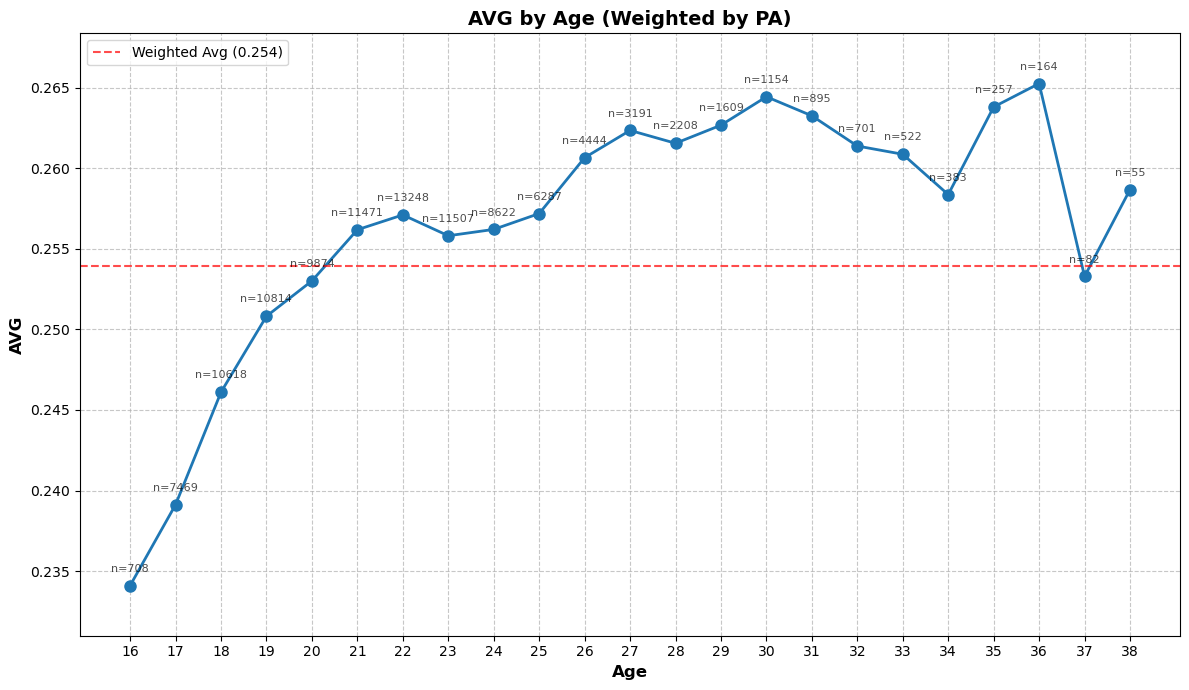

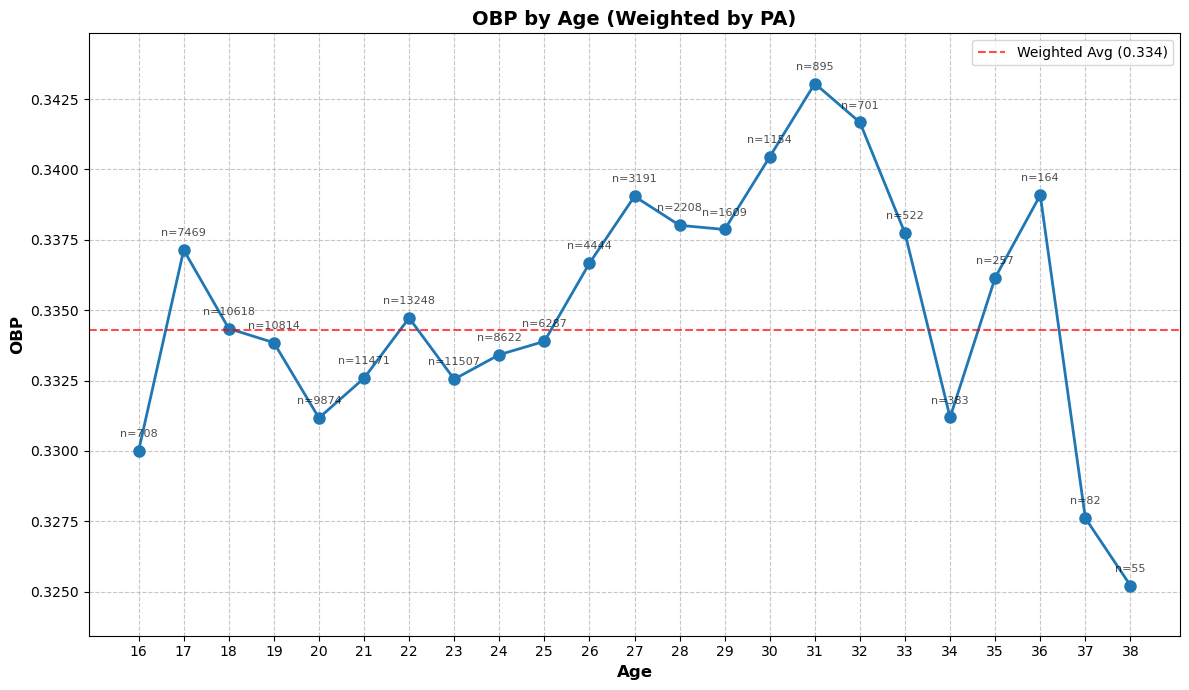

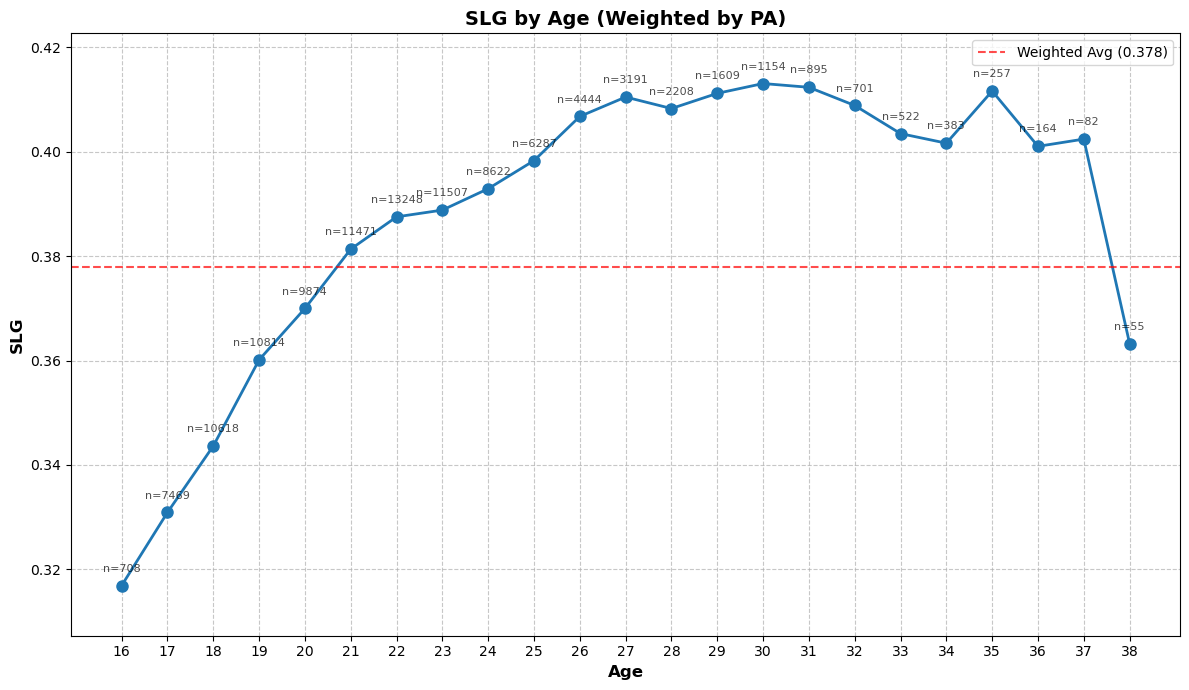

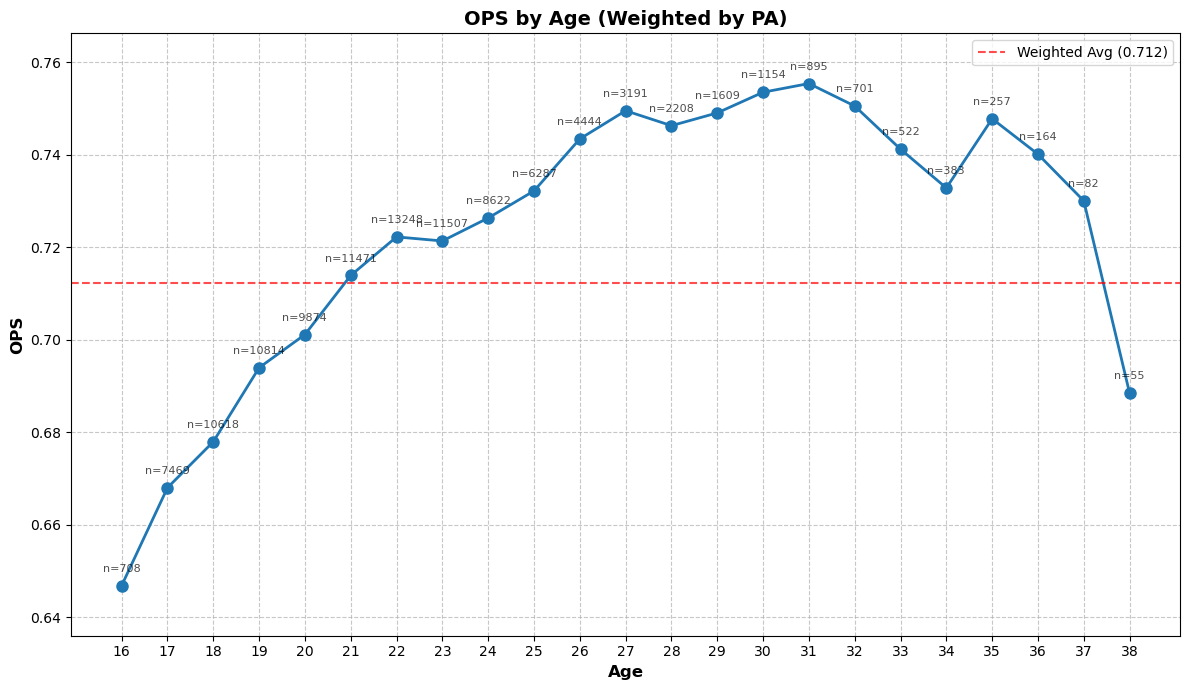

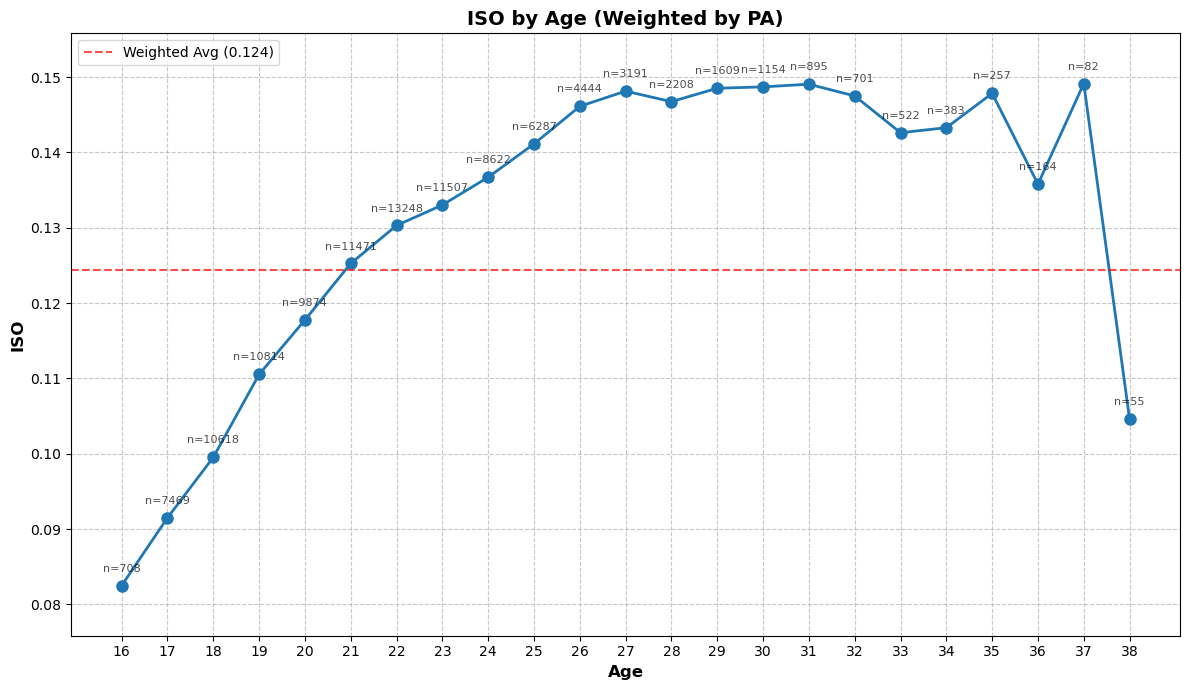

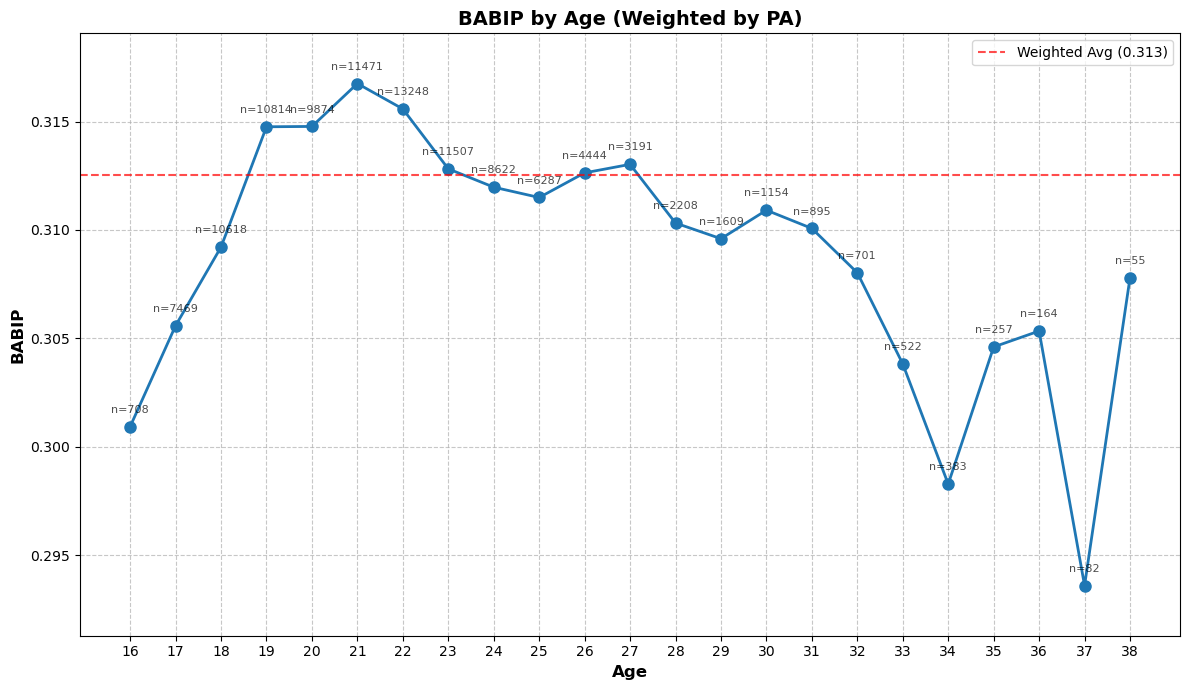

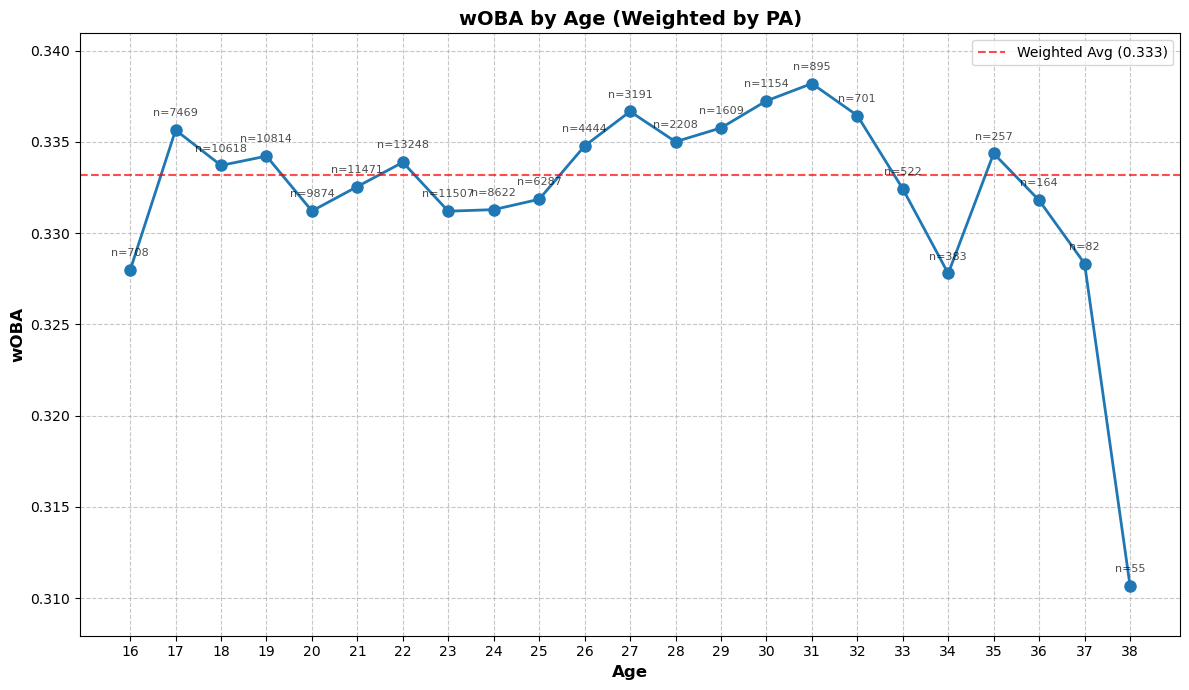

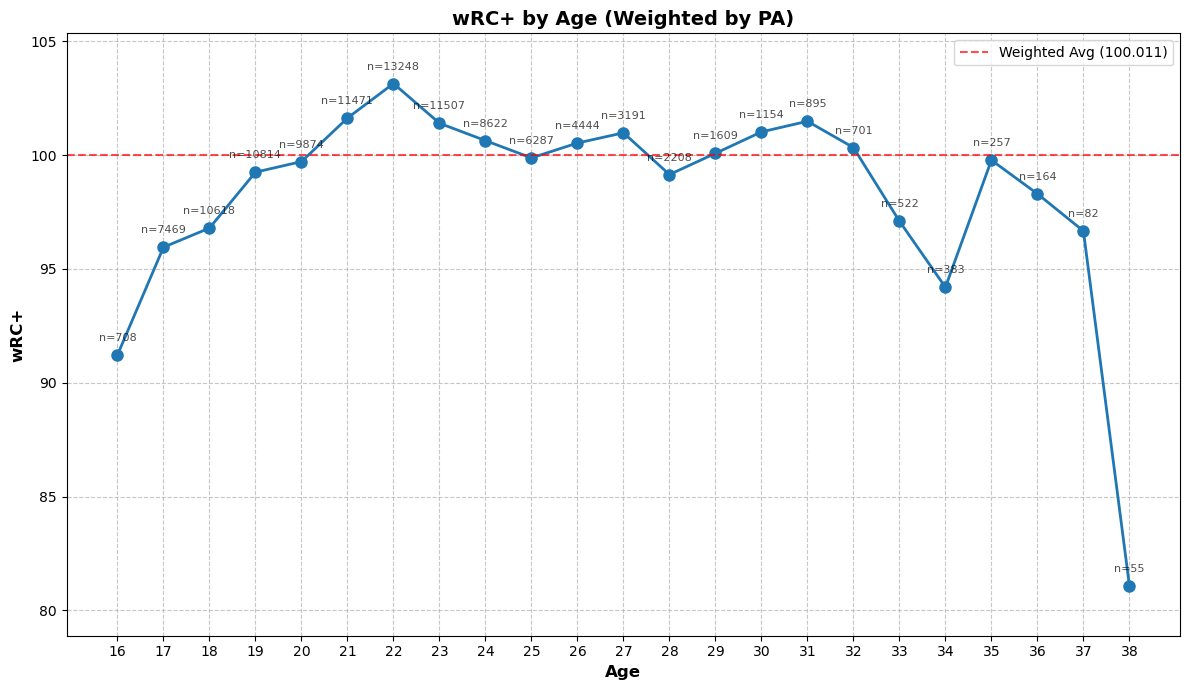

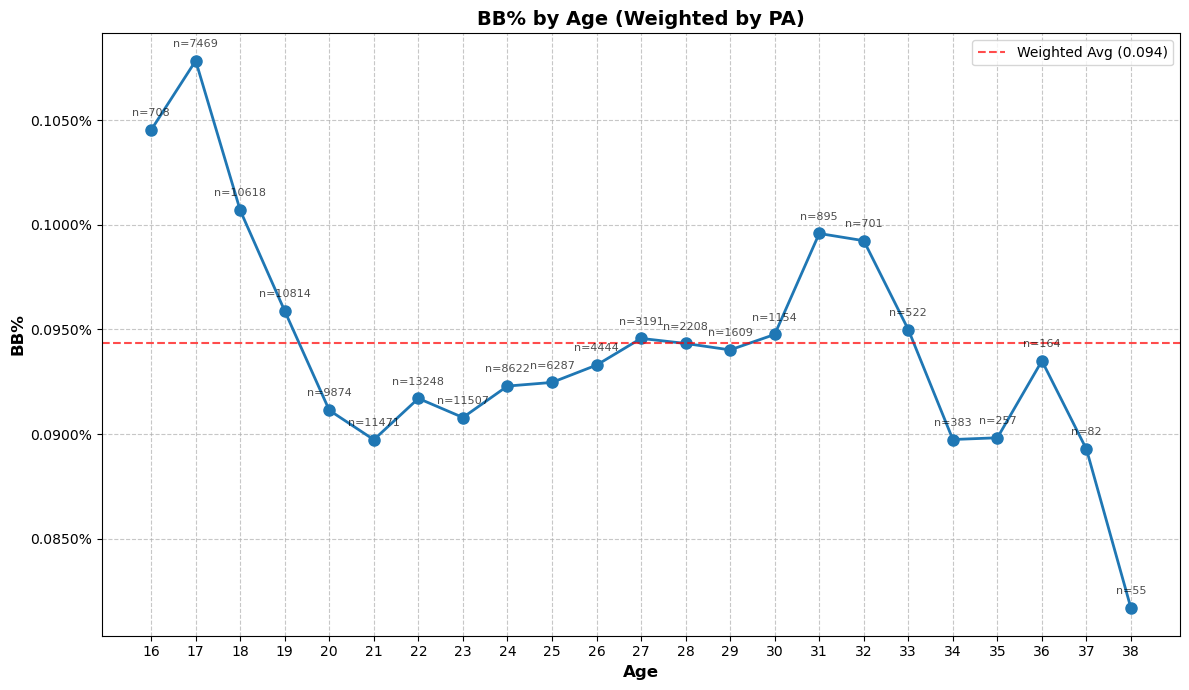

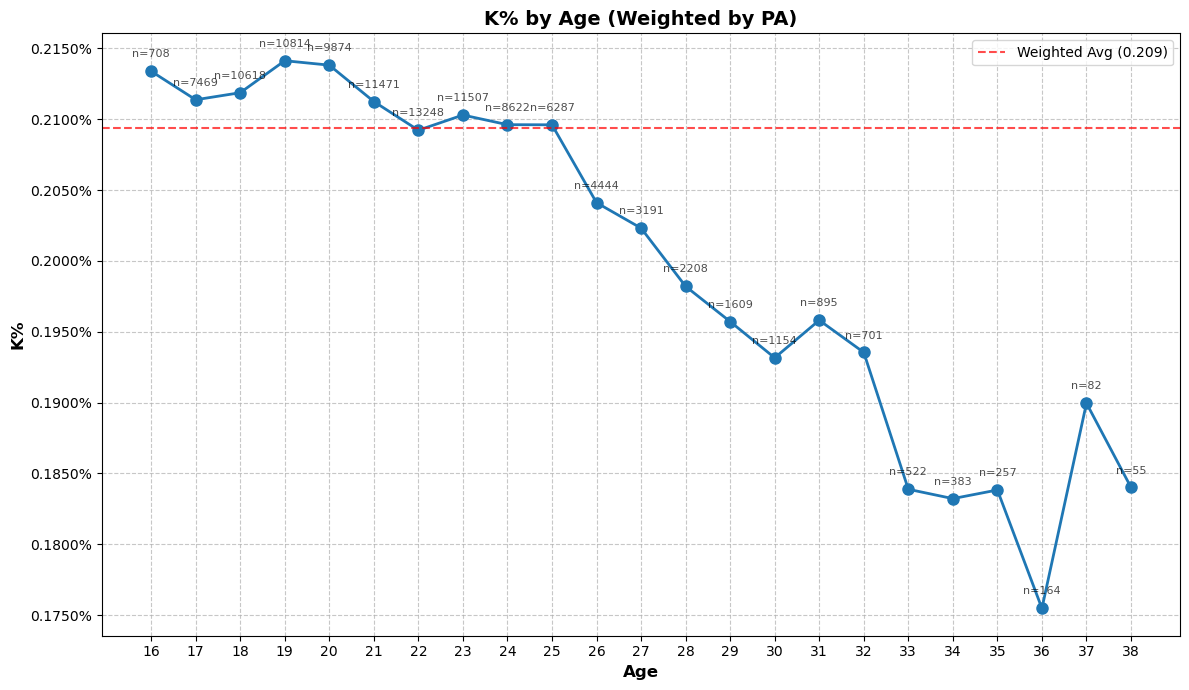

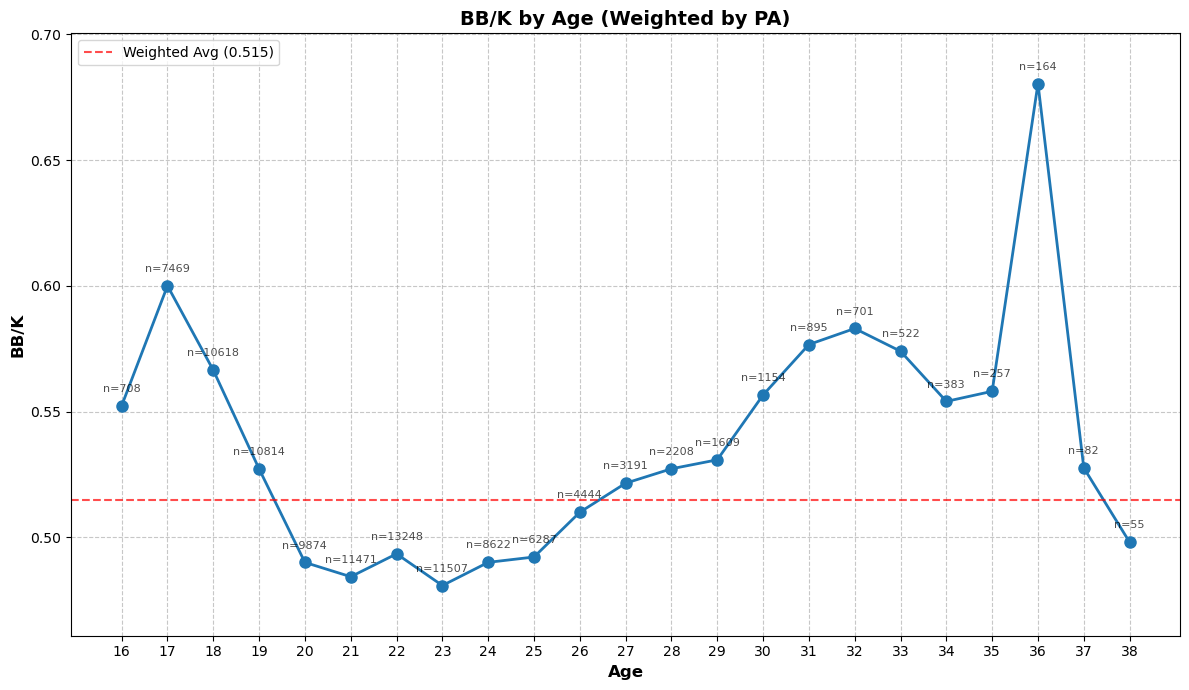

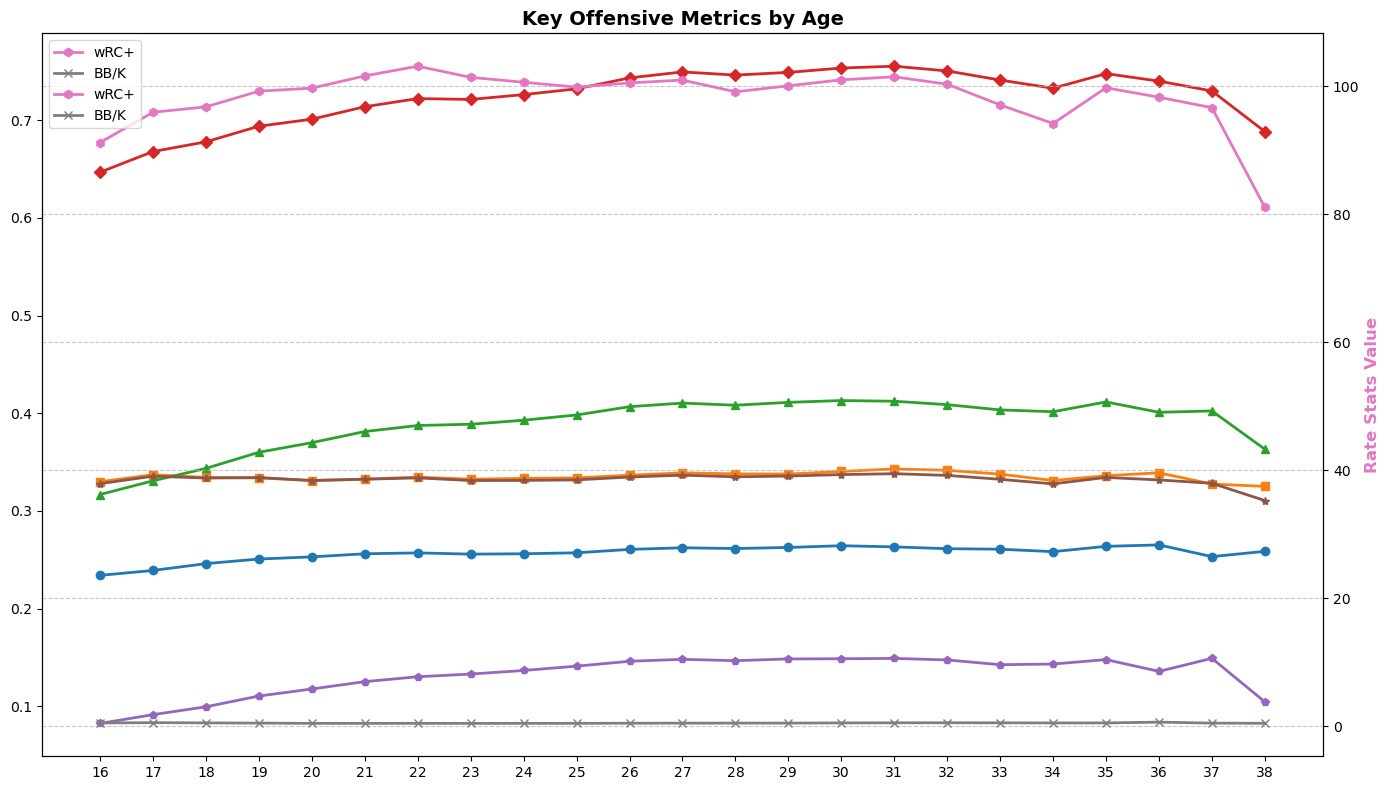

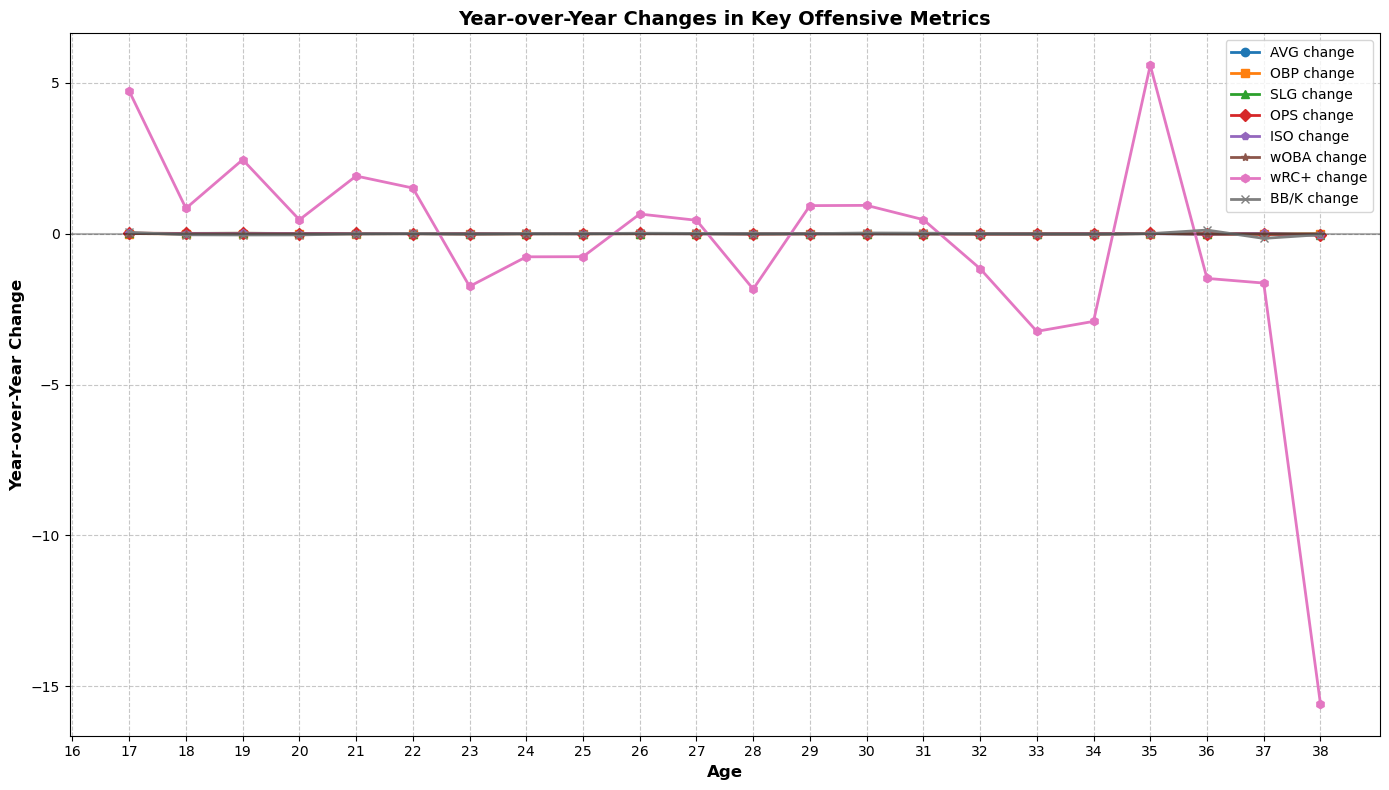

C:\Users\Frank\AppData\Local\Temp\ipykernel_22592\627779725.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=10)


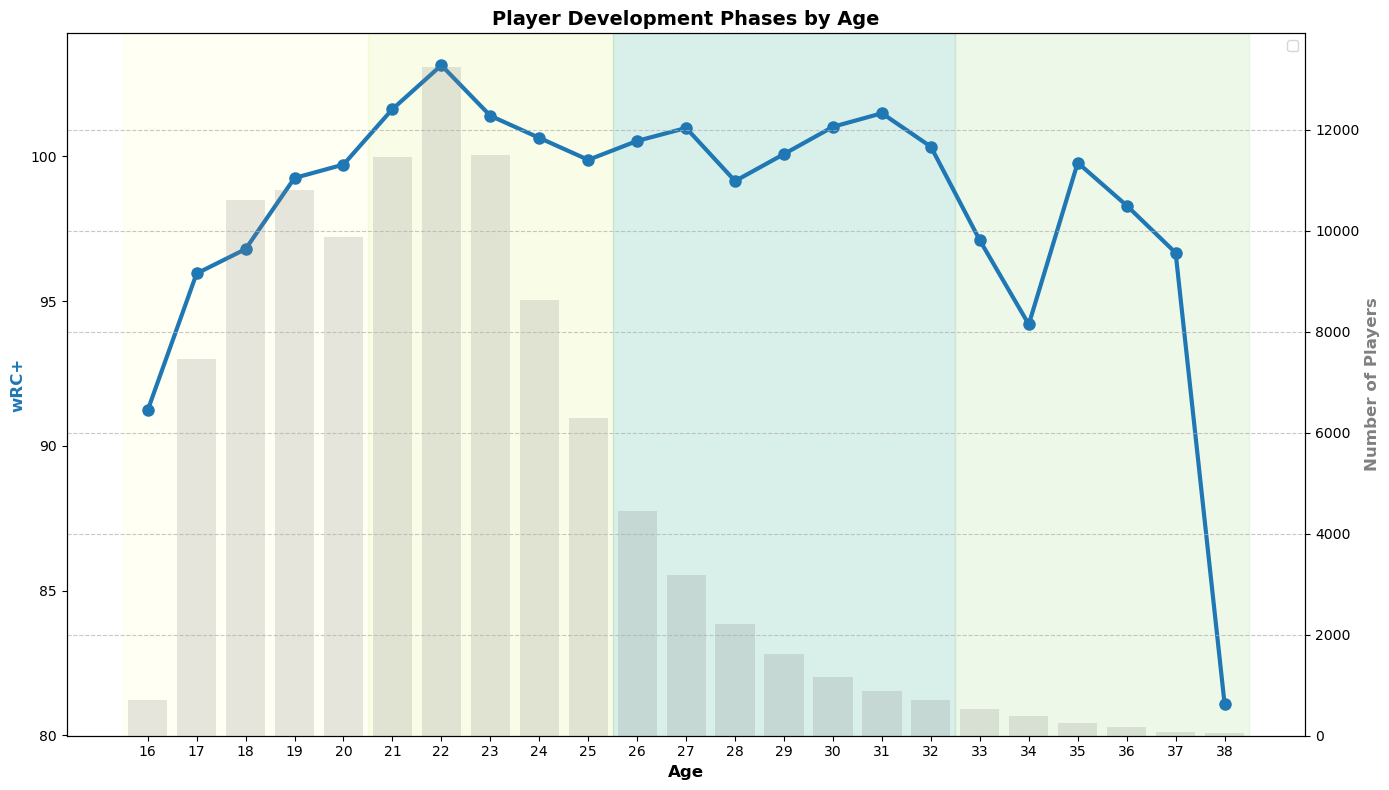

In [67]:
# plot the results from above

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# plotting function
def plot_rate_stat(df, stat, ylim=None):
    plt.figure(figsize=(12, 7))
    
    # plot discrete age points
    plt.plot(df.index, df[stat], 'o-', linewidth=2, color='#1f77b4', markersize=8)
    
    # x-axis individual age
    plt.xticks(df.index)
    
    # y-axis
    if ylim:
        plt.ylim(ylim)
    elif '%' in stat:
        # percentage formatting
        plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
    else:
        # y limits
        stat_min = df[stat].min()
        stat_max = df[stat].max()
        # Add 10% padding to the range
        padding = (stat_max - stat_min) * 0.1
        plt.ylim(max(0, stat_min - padding), stat_max + padding)
    
    # avg across all MiLB
    weighted_sum = (df[stat] * df['player_count']).sum()
    total_players = df['player_count'].sum()
    league_avg = weighted_sum / total_players
    
    # reference line for weighted average
    plt.axhline(y=league_avg, color='r', linestyle='--', alpha=0.7, 
                label=f'Weighted Avg ({league_avg:.3f})')
    
    # labels and title
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel(stat, fontsize=12, fontweight='bold')
    plt.title(f'{stat} by Age (Weighted by PA)', fontsize=14, fontweight='bold')
    
    # add sample size annotations
    for age in df.index:
        plt.annotate(f"n={df.loc[age, 'player_count']}", 
                    xy=(age, df.loc[age, stat]),
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    fontsize=8,
                    alpha=0.7)
    
    # grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # legend
    plt.legend()
    
    # layout
    plt.tight_layout()
    
    # save figure
    plt.savefig(f'Age_vs_{stat.replace("%", "Pct").replace("/", "_")}.png', dpi=300)
    plt.show()

# lot each rate stat
for stat in rate_stats:
    plot_rate_stat(weighted_stats_df, stat)

# create plot for key metrics
key_stats = ['AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'wOBA', 'wRC+', 'BB/K']
plt.figure(figsize=(14, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
markers = ['o', 's', '^', 'D', 'p', '*', 'h', 'x']

for i, stat in enumerate(key_stats):
    if stat == 'wRC+':
        # secondary y-axis for wRC+ since it's on a different scale
        ax2 = plt.gca().twinx()
        ax2.plot(weighted_stats_df.index, weighted_stats_df[stat], 
                marker=markers[i], linestyle='-', linewidth=2, 
                color=colors[i], label=stat)
        ax2.set_ylabel('wRC+', fontsize=12, fontweight='bold', color=colors[i])
    else:
        plt.plot(weighted_stats_df.index, weighted_stats_df[stat], 
                marker=markers[i], linestyle='-', linewidth=2, 
                color=colors[i], label=stat)

# x-axis to show each age
plt.xticks(weighted_stats_df.index)

# labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Rate Stats Value', fontsize=12, fontweight='bold')
plt.title('Key Offensive Metrics by Age', fontsize=14, fontweight='bold')

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# combine legends
lines, labels = plt.gca().get_legend_handles_labels()
if 'wRC+' in key_stats:
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)
else:
    plt.legend(loc='upper left', fontsize=10)

# tight layout
plt.tight_layout()

# save figure
plt.savefig('Key_Offensive_Metrics_by_Age.png', dpi=300)
plt.show()

# year-over-year changes visualization
yoy_changes = pd.DataFrame()
for stat in key_stats:
    # calculate the absolute change from previous age
    yoy_changes[f'{stat}_change'] = weighted_stats_df[stat].diff()

plt.figure(figsize=(14, 8))

for i, stat in enumerate(key_stats):
    plt.plot(yoy_changes.index, yoy_changes[f'{stat}_change'], 
            marker=markers[i], linestyle='-', linewidth=2, 
            color=colors[i], label=f'{stat} change')

# add zero line for reference
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# set x-axis to show each individual age
plt.xticks(yoy_changes.index)

# set labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Year-over-Year Change', fontsize=12, fontweight='bold')
plt.title('Year-over-Year Changes in Key Offensive Metrics', fontsize=14, fontweight='bold')

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# legend
plt.legend(loc='upper right', fontsize=10)

# tight layout
plt.tight_layout()

# save figure
plt.savefig('YoY_Changes_by_Age.png', dpi=300)
plt.show()

# create plot for development phases
plt.figure(figsize=(14, 8))

# define development phases 
development_ranges = {
    'Early Development': (16, 20),
    'Prime Development': (21, 25),
    'Peak Performance': (26, 32),
    'Decline Phase': (33, 38)
}

# plot wRC+ as the main metric with development phases highlighted
plt.plot(weighted_stats_df.index, weighted_stats_df['wRC+'], 'o-', 
         linewidth=3, color='#1f77b4', markersize=8, label='wRC+')

# highlight development phases with background colors
colors = ['#ffffd9', '#edf8b1', '#7fcdbb', '#c7e9b4']
for i, (phase, (start, end)) in enumerate(development_ranges.items()):
    # Find actual available ages in our data that fit this range
    phase_ages = [age for age in weighted_stats_df.index if start <= age <= end]
    if phase_ages:
        # Get x-coordinates for the highlighting
        idx_min = weighted_stats_df.index.get_loc(min(phase_ages))
        idx_max = weighted_stats_df.index.get_loc(max(phase_ages))
        
        # Highlight the range
        plt.axvspan(min(phase_ages)-0.5, max(phase_ages)+0.5, 
                   alpha=0.3, color=colors[i % len(colors)], label=phase)

# x-axis to show individual age
plt.xticks(weighted_stats_df.index)

# labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('wRC+', fontsize=12, fontweight='bold', color='#1f77b4')
plt.title('Player Development Phases by Age', fontsize=14, fontweight='bold')

# player count as bar chart
ax2 = plt.gca().twinx()
ax2.bar(weighted_stats_df.index, weighted_stats_df['player_count'], 
        alpha=0.2, color='gray')
ax2.set_ylabel('Number of Players', fontsize=12, fontweight='bold', color='gray')

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# legend
plt.legend(loc='upper right', fontsize=10)

# tight layout
plt.tight_layout()

# save figure
plt.savefig('Player_Development_Phases.png', dpi=300)
plt.show()

In [69]:
"""
For counting stats we will calculate the total of each stat per age group and divide it by the total number of plate apperances for that age group in order
to try to get a per plate apperance rate for each stat by age group
"""
counting_stats = ['1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SO', 'SB', 'wRC', 'wRAA', 'wSB']

# store results
counting_stats_by_age = {}

# calculate rates
for stat in counting_stats:
    # group by age
    grouped = batting_stats_combined.groupby('Age')
    stat_sums = grouped[stat].sum()
    pa_sums = grouped['PA'].sum()
    
    # calculate rate per plate appearance
    counting_stats_by_age[stat + '_per_PA'] = stat_sums / pa_sums

# convert to dataframe
counting_stats_df = pd.DataFrame(counting_stats_by_age)

# player count
counting_stats_df['player_count'] = age_counts

# results
print("Counting statistics per plate appearance by age:")
print(counting_stats_df)

# function to verify calculation
def verify_all_counting_stats(original_df, result_df, verification_age=26):
    print(f"\nVerification summary for age: {verification_age}:")
    print("-" * 70)
    print(f"{'Stat':<8} {'Sum':<8} {'Total PA':<10} {'Manual':<10} {'Calculated':<10} {'Difference':<12}")
    print("-" * 70)
    
    # age group data
    age_group_data = original_df[original_df['Age'] == verification_age]
    total_pa = age_group_data['PA'].sum()
    
    all_correct = True
    
    for stat in counting_stats:
        total_stat = age_group_data[stat].sum()
        manual_per_pa = total_stat / total_pa
        
        # get value
        calculated_per_pa = result_df.loc[verification_age, f'{stat}_per_PA']
        
        # calculate difference
        difference = abs(manual_per_pa - calculated_per_pa)
        
        # display
        print(f"{stat:<8} {total_stat:<8.1f} {total_pa:<10.1f} {manual_per_pa:<10.6f} {calculated_per_pa:<10.6f} {difference:<12.10f}")
        
        # check
        if difference > 1e-10:
            all_correct = False
    
    print("-" * 70)
    if all_correct:
        print("All calculations match within floating-point precision!")
    else:
        print("Some calculations show discrepancies.")

verify_all_counting_stats(batting_stats_combined, counting_stats_df, verification_age=26)

# elect key counting stats
key_counting_stats = ['HR_per_PA', 'BB_per_PA', 'SO_per_PA', 'SB_per_PA', 'wRC_per_PA', '2B_per_PA', 'RBI_per_PA']
key_counting_table = counting_stats_df[key_counting_stats].round(6)
print("\nKey Counting Stats per PA by Age:")
print(key_counting_table)

# calculate year-over-year changes for each stat
yoy_counting_changes = pd.DataFrame()

for stat in key_counting_stats:
    # calculate the absolute change from previous age
    yoy_counting_changes[f'{stat}_change'] = counting_stats_df[stat].diff()
    
    # calculate percentage change 
    # use .replace to avoid division by zero
    yoy_counting_changes[f'{stat}_pct_change'] = (
        counting_stats_df[stat].pct_change() * 100
    ).replace([np.inf, -np.inf], np.nan)

# format and display YoY changes
print("\nYear-over-Year Changes in Key Counting Stats:")
yoy_counting_display = pd.DataFrame()
for stat in key_counting_stats:
    yoy_counting_display[f'{stat}_change'] = yoy_counting_changes[f'{stat}_change'].round(6)
    yoy_counting_display[f'{stat}_pct%'] = yoy_counting_changes[f'{stat}_pct_change'].round(1)
print(yoy_counting_display)

# top 3 age groups for each stat
print("\nTop 3 Age Groups for Each Key Counting Metric:")
for stat in key_counting_stats:
    top_3_ages = counting_stats_df[stat].nlargest(3)
    print(f"\n{stat}:")
    for age, value in top_3_ages.items():
        player_count = counting_stats_df.loc[age, 'player_count']
        print(f"  Age {age}: {value:.6f} (n={player_count})")

# calculate peak performance ages
peak_counting_ages = {stat: counting_stats_df[stat].idxmax() for stat in key_counting_stats}
print("\nPeak Performance Age by Counting Metric:")
for stat, age in peak_counting_ages.items():
    peak_value = counting_stats_df.loc[age, stat]
    player_count = counting_stats_df.loc[age, 'player_count']
    print(f"{stat}: Age {age} ({peak_value:.6f}, n={player_count})")

# identify age ranges with positive growth
print("\nAge Ranges with Positive Growth in Counting Stats:")
for stat in key_counting_stats:
    growth_ages = yoy_counting_changes[yoy_counting_changes[f'{stat}_change'] > 0].index
    growth_ranges = []
    start = None
    
    for i in range(len(growth_ages)-1):
        if start is None:
            start = growth_ages[i]
        
        if growth_ages[i+1] != growth_ages[i] + 1:
            growth_ranges.append((start, growth_ages[i]))
            start = None
    
    if start is not None:
        growth_ranges.append((start, growth_ages[-1]))
    
    # display the continuous growth ranges
    print(f"{stat}: ", end="")
    if growth_ranges:
        range_strings = [f"{start}-{end}" for start, end in growth_ranges]
        print(", ".join(range_strings))
    else:
        print("No continuous growth ranges found")

# calculate developmental velocity
print("\nDevelopmental Velocity (Annual Rate of Change) for Counting Stats:")
# key development years
dev_ages = range(16, 33)
dev_counting_velocity = {}

for stat in key_counting_stats:
    # get values for the development age range
    values = []
    ages = []
    
    for age in dev_ages:
        if age in counting_stats_df.index:
            # safely get the value, use np.nan if not available
            if pd.notna(counting_stats_df.loc[age, stat]):
                values.append(counting_stats_df.loc[age, stat])
                ages.append(age)
    
    if len(values) >= 2:
        # calculate average annual change during this period
        total_change = values[-1] - values[0]
        years = ages[-1] - ages[0]
        annual_rate = total_change / years
        dev_counting_velocity[stat] = annual_rate

for stat, rate in dev_counting_velocity.items():
    start_age = min(ages) if ages else dev_ages[0]
    end_age = max(ages) if ages else dev_ages[-1]
    print(f"{stat}: {rate:.6f} per year from age {start_age} to {end_age}")

Counting statistics per plate appearance by age:
      1B_per_PA  2B_per_PA  3B_per_PA  HR_per_PA  R_per_PA  RBI_per_PA  \
Age                                                                      
16.0   0.151078   0.036243   0.007966   0.006681  0.123510    0.095514   
17.0   0.150972   0.036896   0.008639   0.008288  0.128622    0.100308   
18.0   0.155433   0.038318   0.008895   0.010155  0.129414    0.104572   
19.0   0.155887   0.041251   0.008473   0.013061  0.128336    0.107325   
20.0   0.156633   0.042643   0.007935   0.015135  0.126432    0.108772   
21.0   0.156460   0.044452   0.007709   0.016909  0.126207    0.110345   
22.0   0.155336   0.045196   0.007016   0.018438  0.125188    0.111601   
23.0   0.153959   0.045210   0.006500   0.019561  0.122617    0.111469   
24.0   0.153121   0.045559   0.006033   0.020848  0.121975    0.112330   
25.0   0.152798   0.045713   0.005515   0.022437  0.122066    0.113057   
26.0   0.153784   0.046655   0.005748   0.023466  0.124559    0

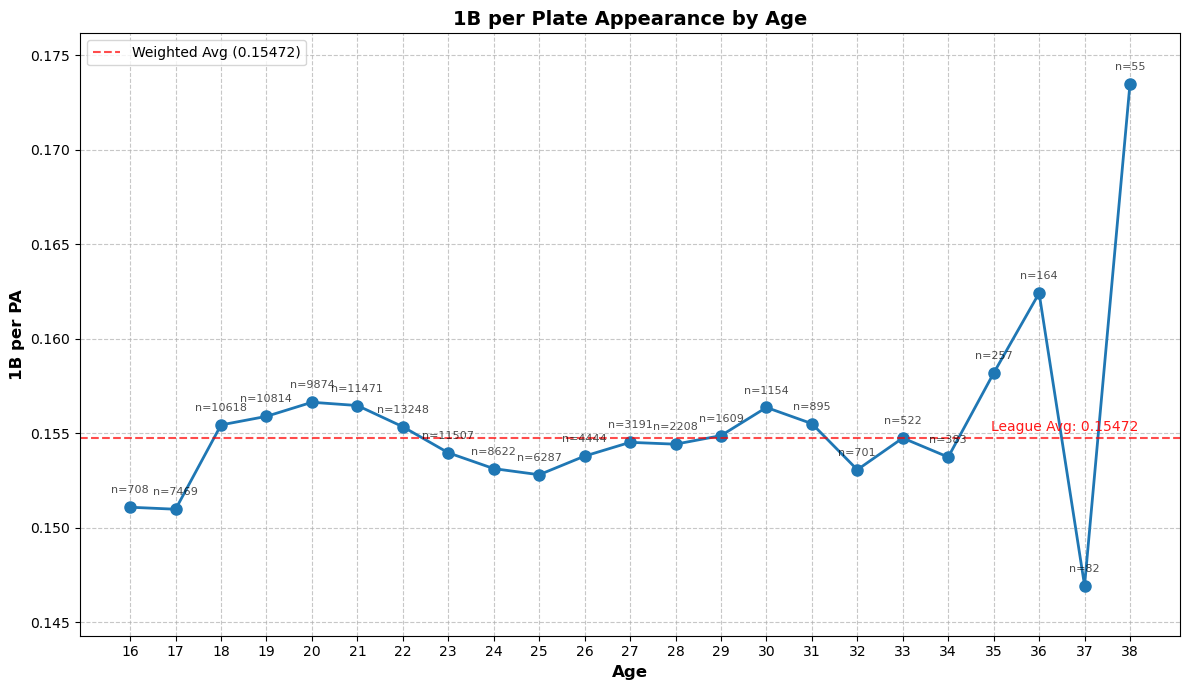

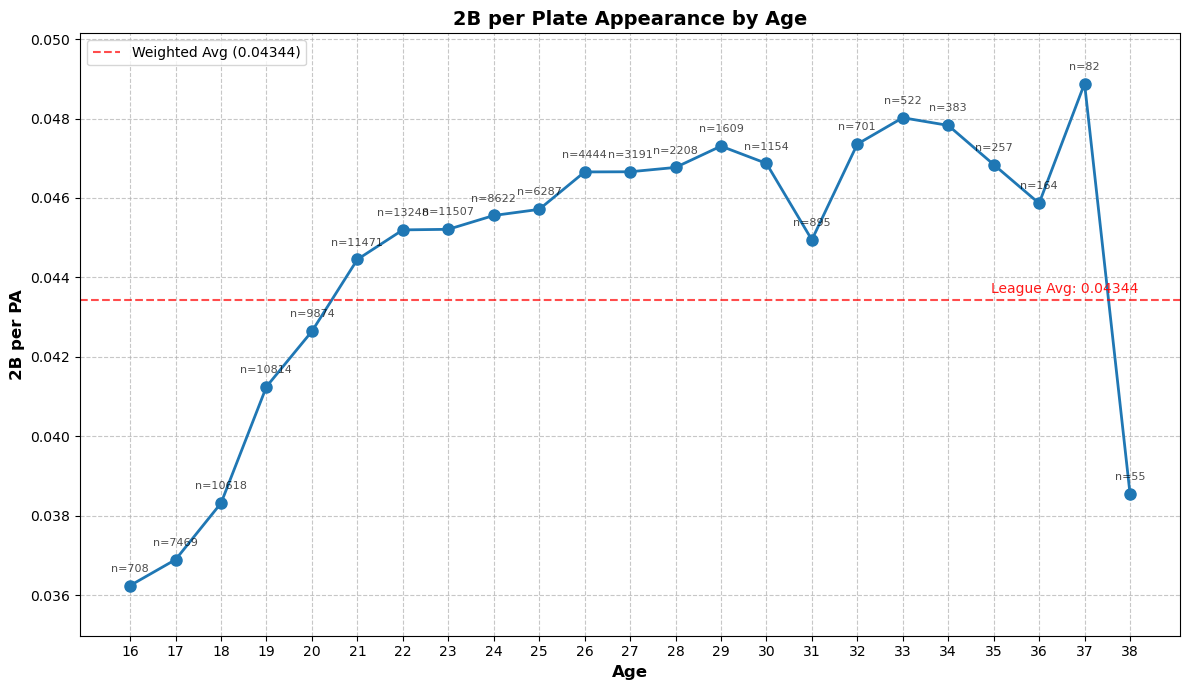

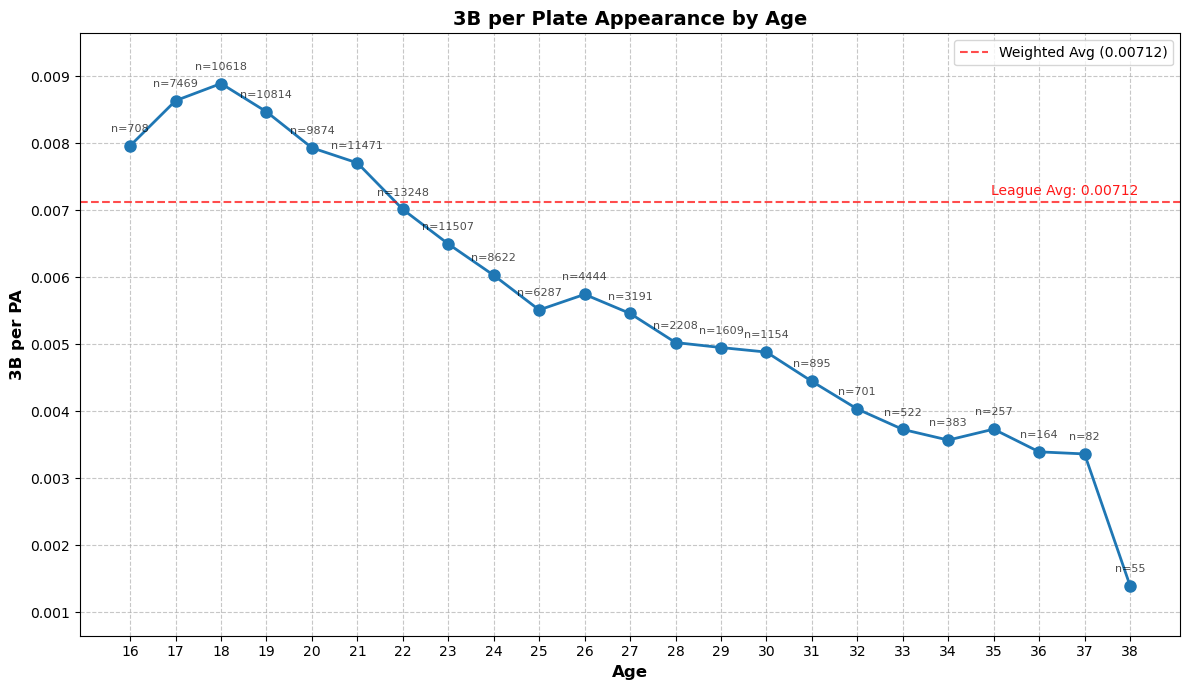

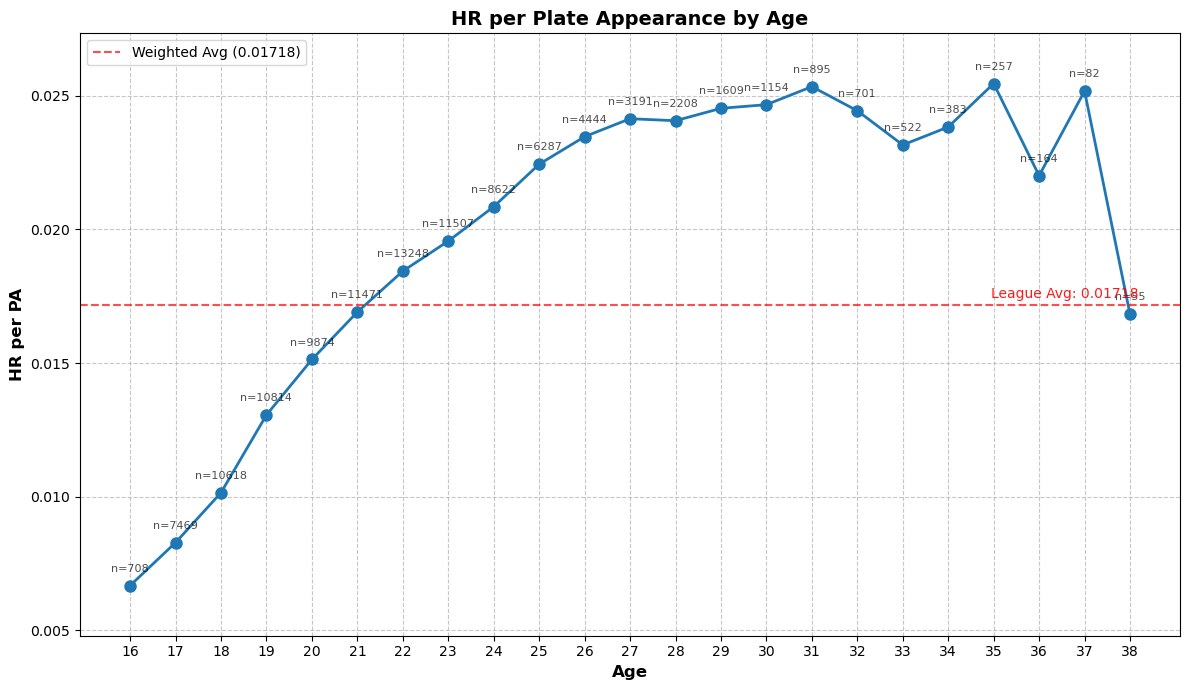

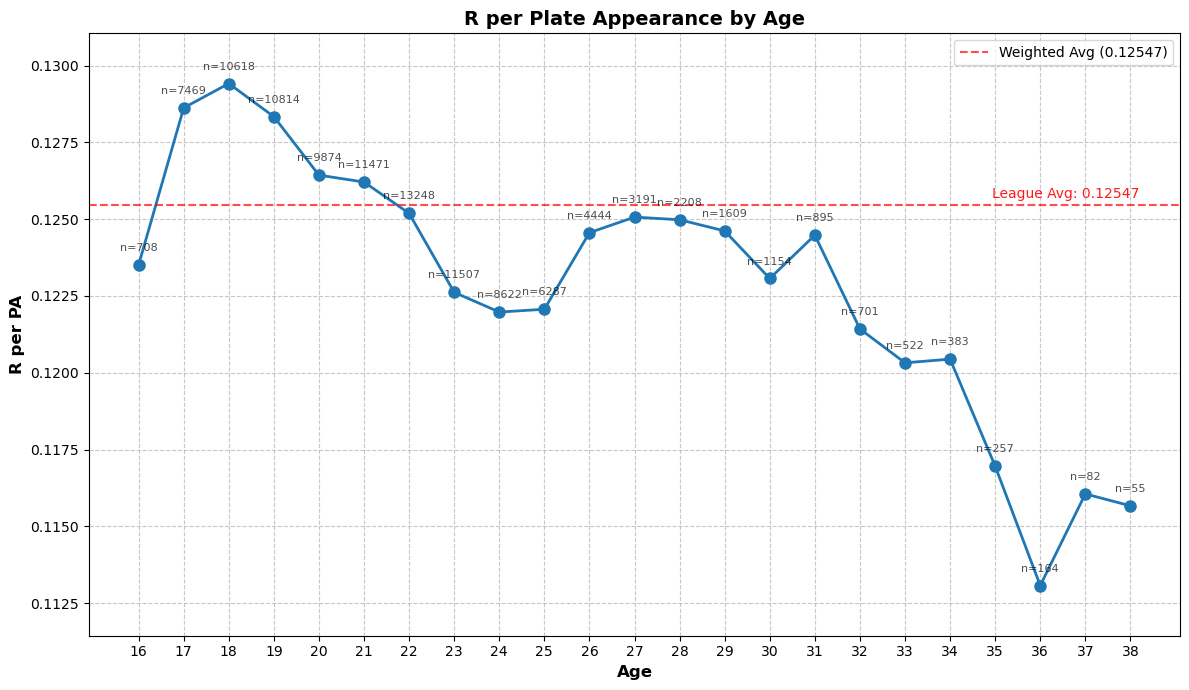

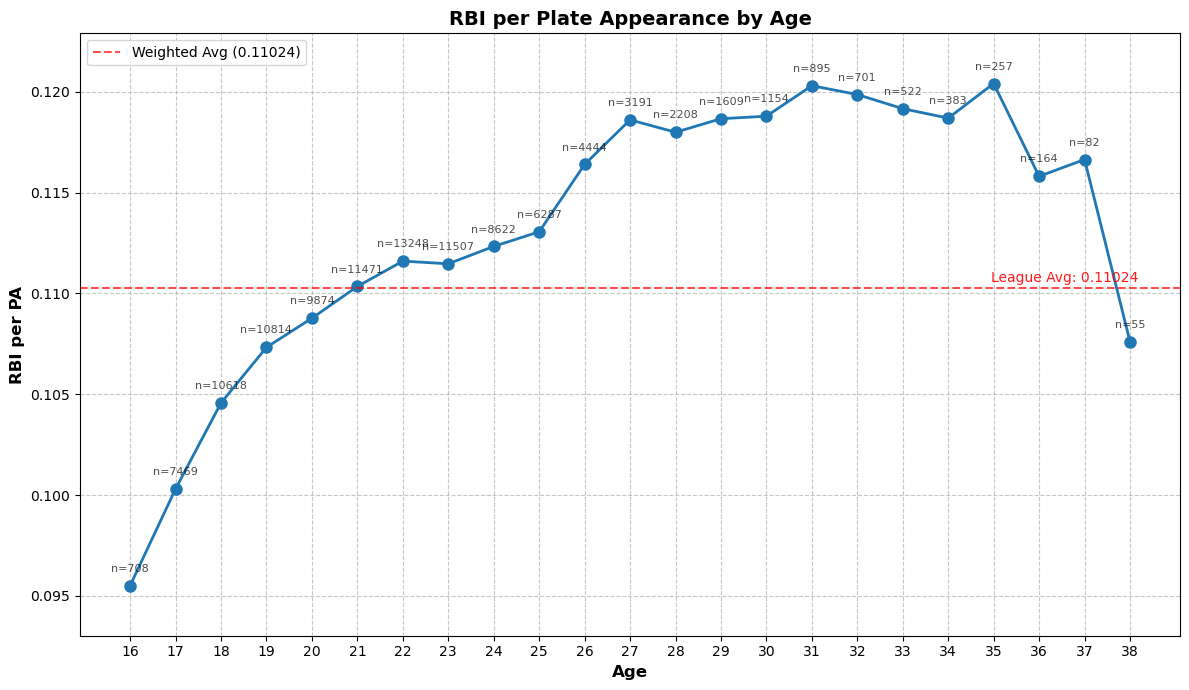

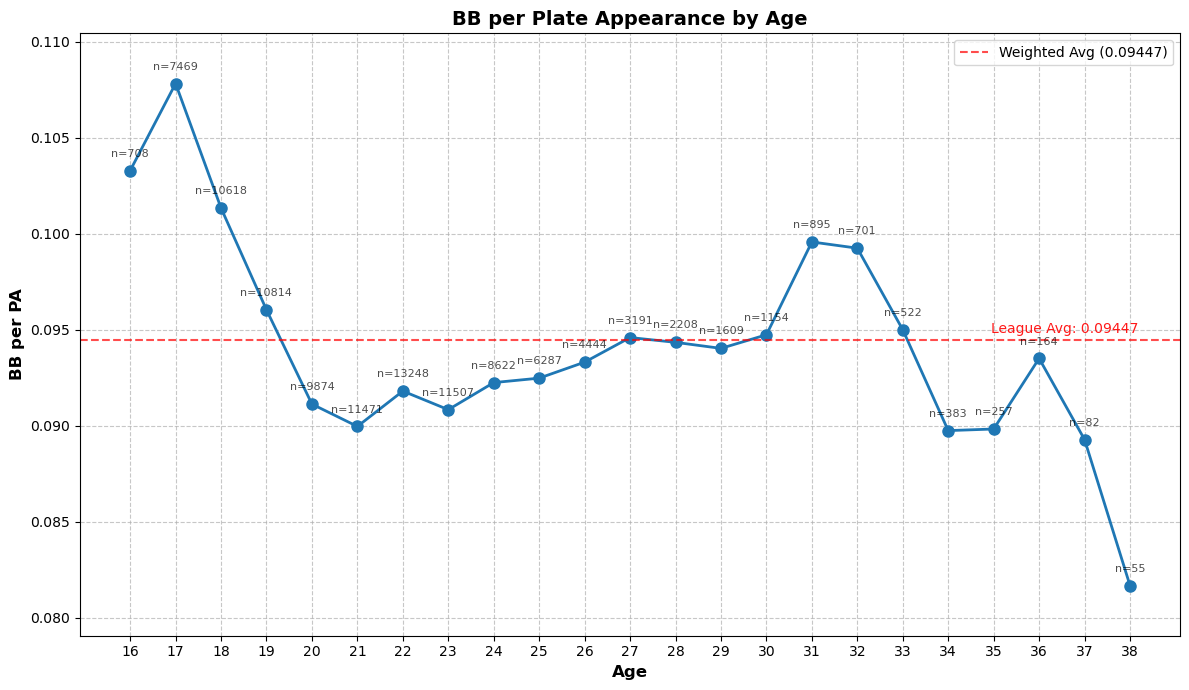

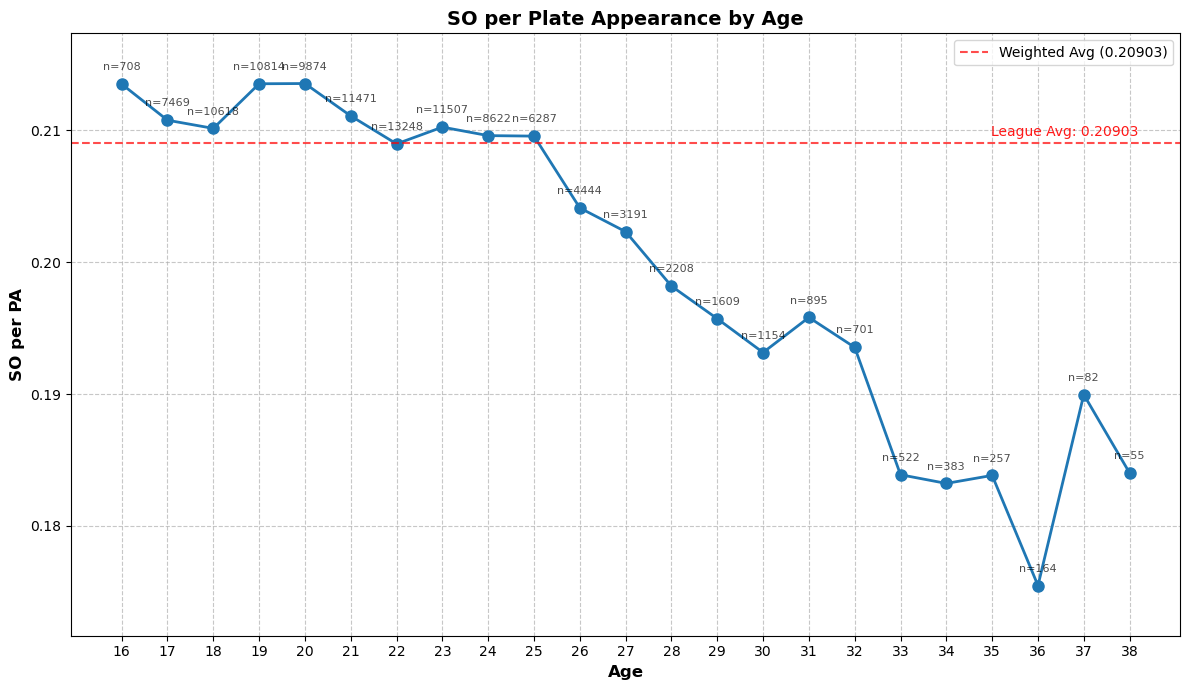

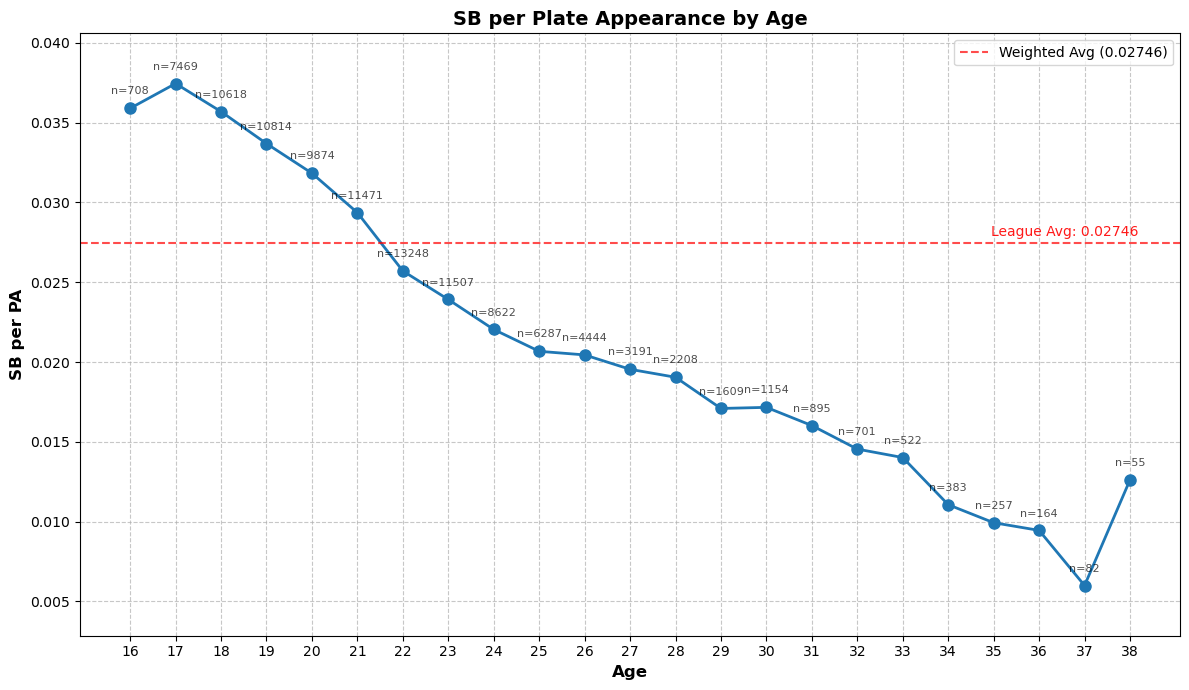

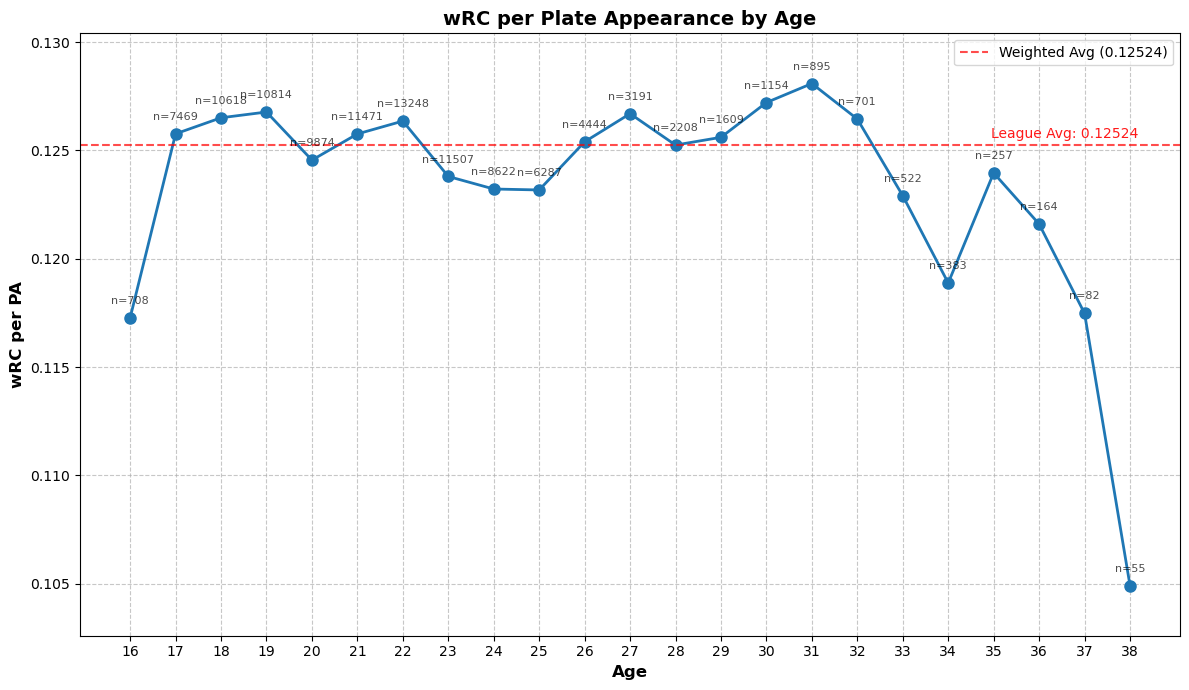

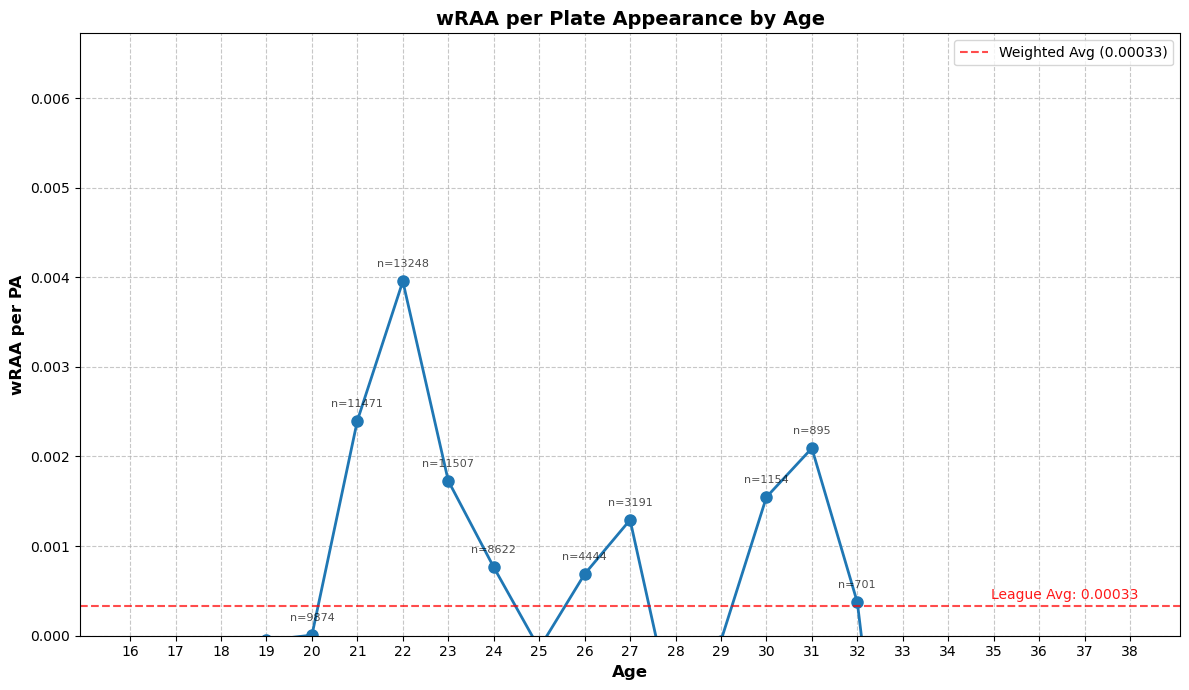

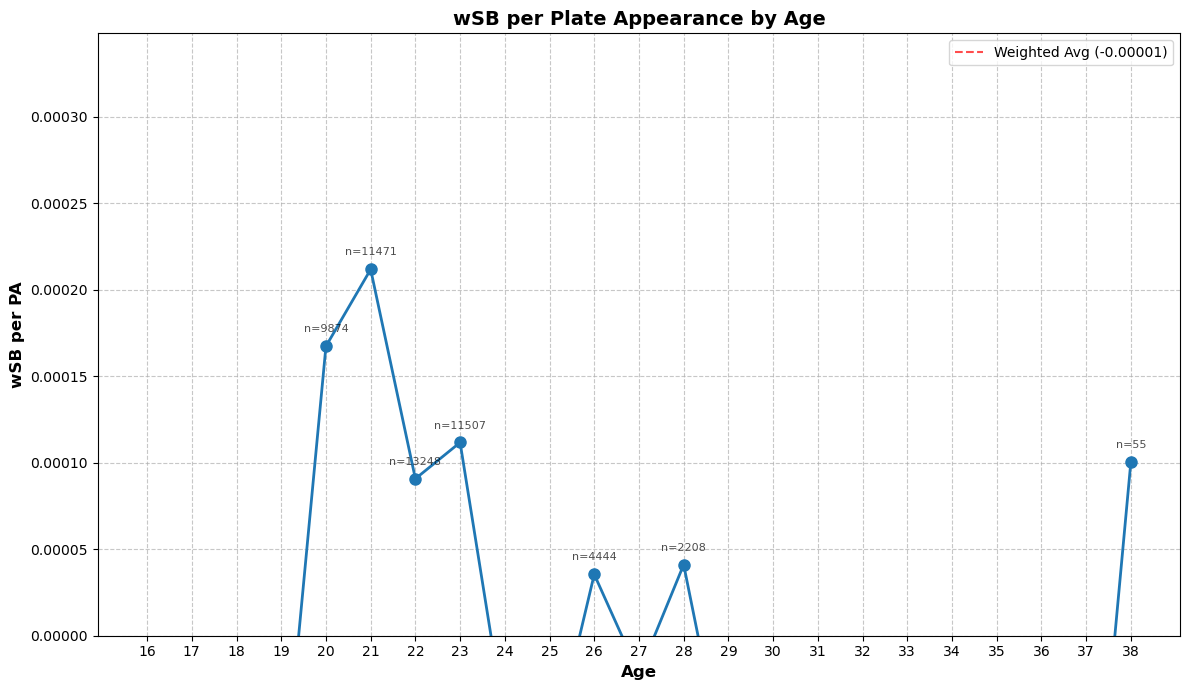

C:\Users\Frank\AppData\Local\Temp\ipykernel_22592\2723734597.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(stat_group))


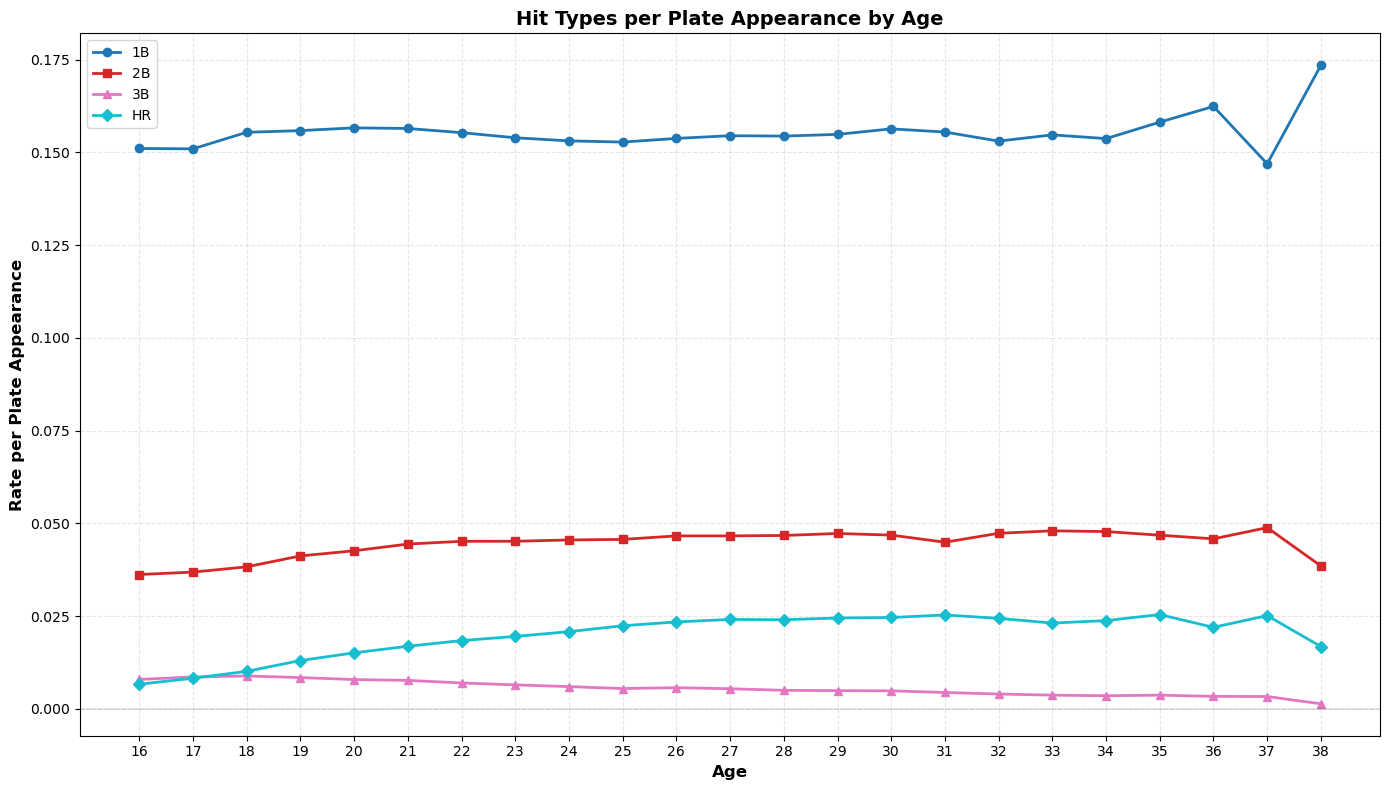

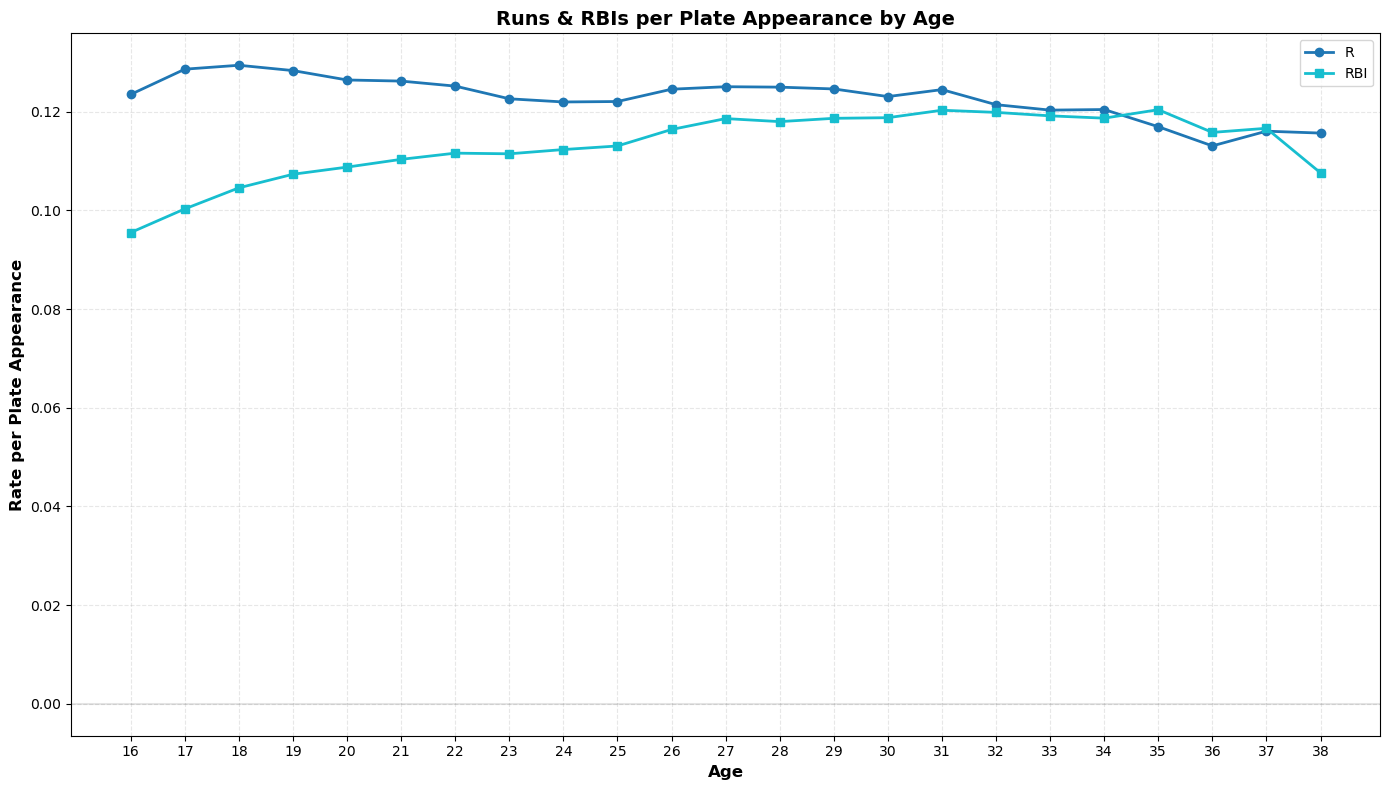

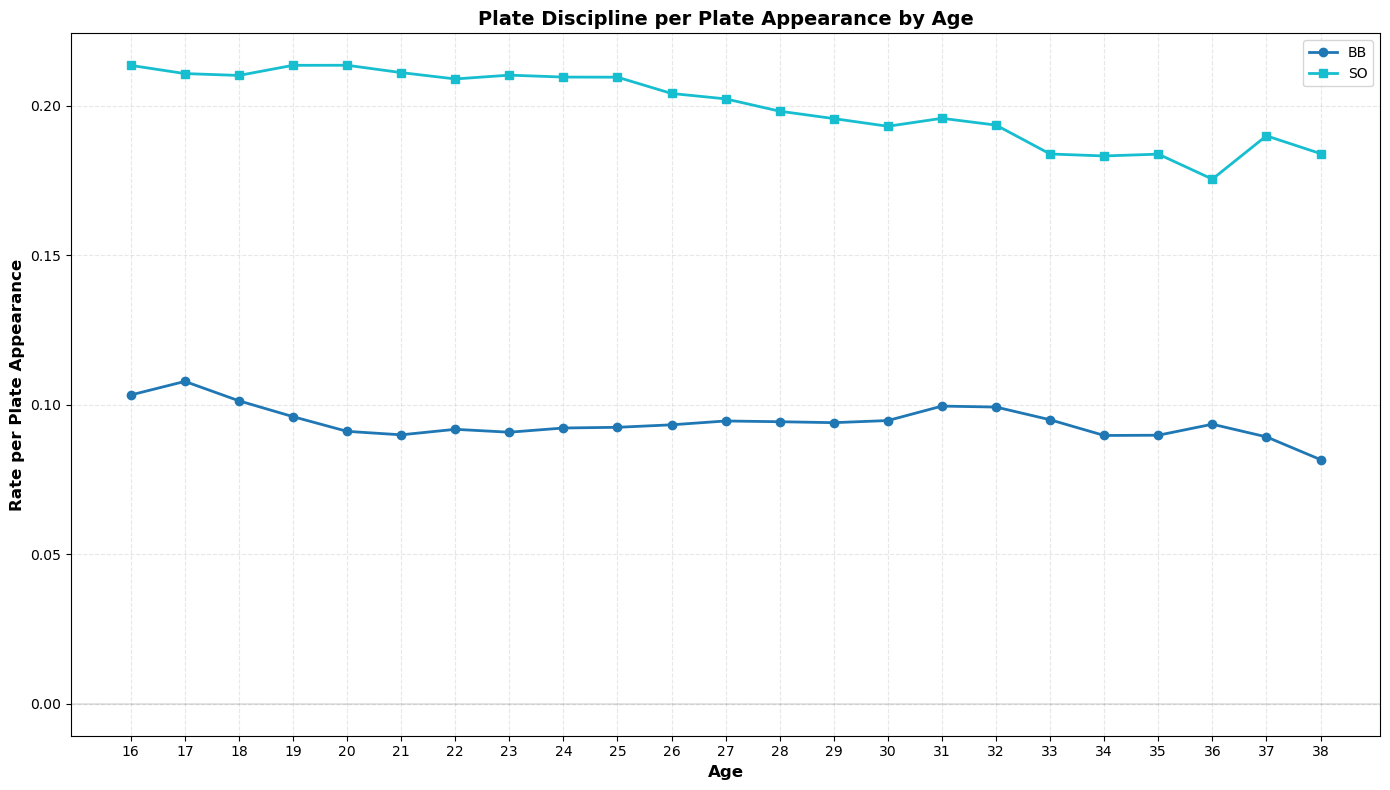

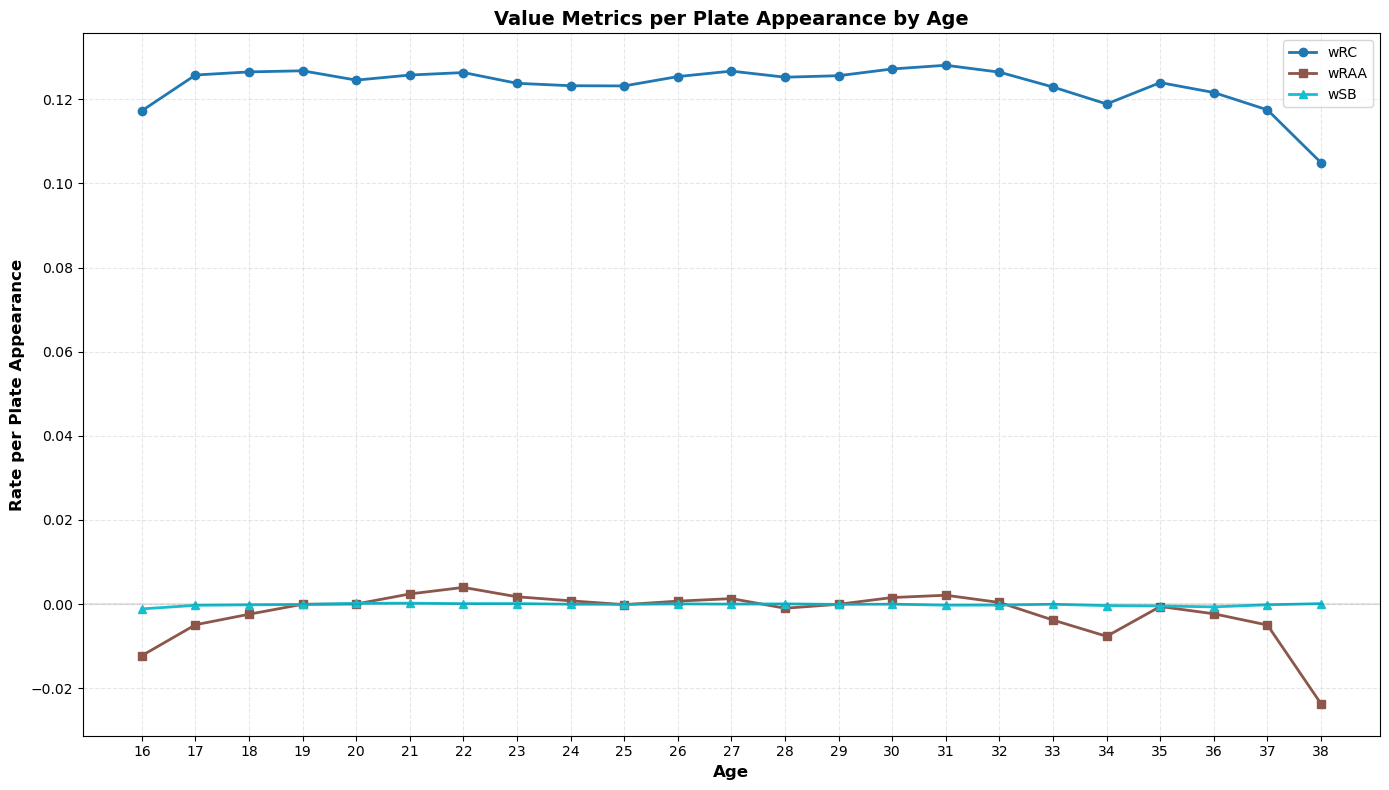

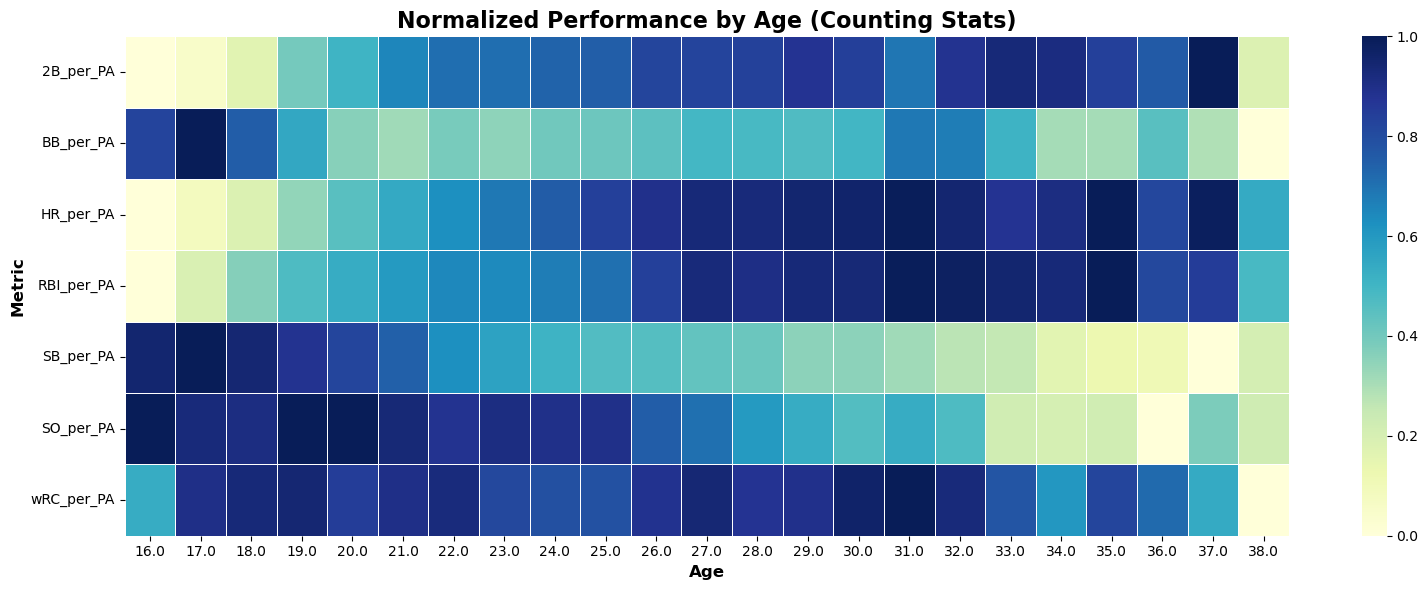

C:\Users\Frank\AppData\Local\Temp\ipykernel_22592\2723734597.py:165: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(selected_stats))


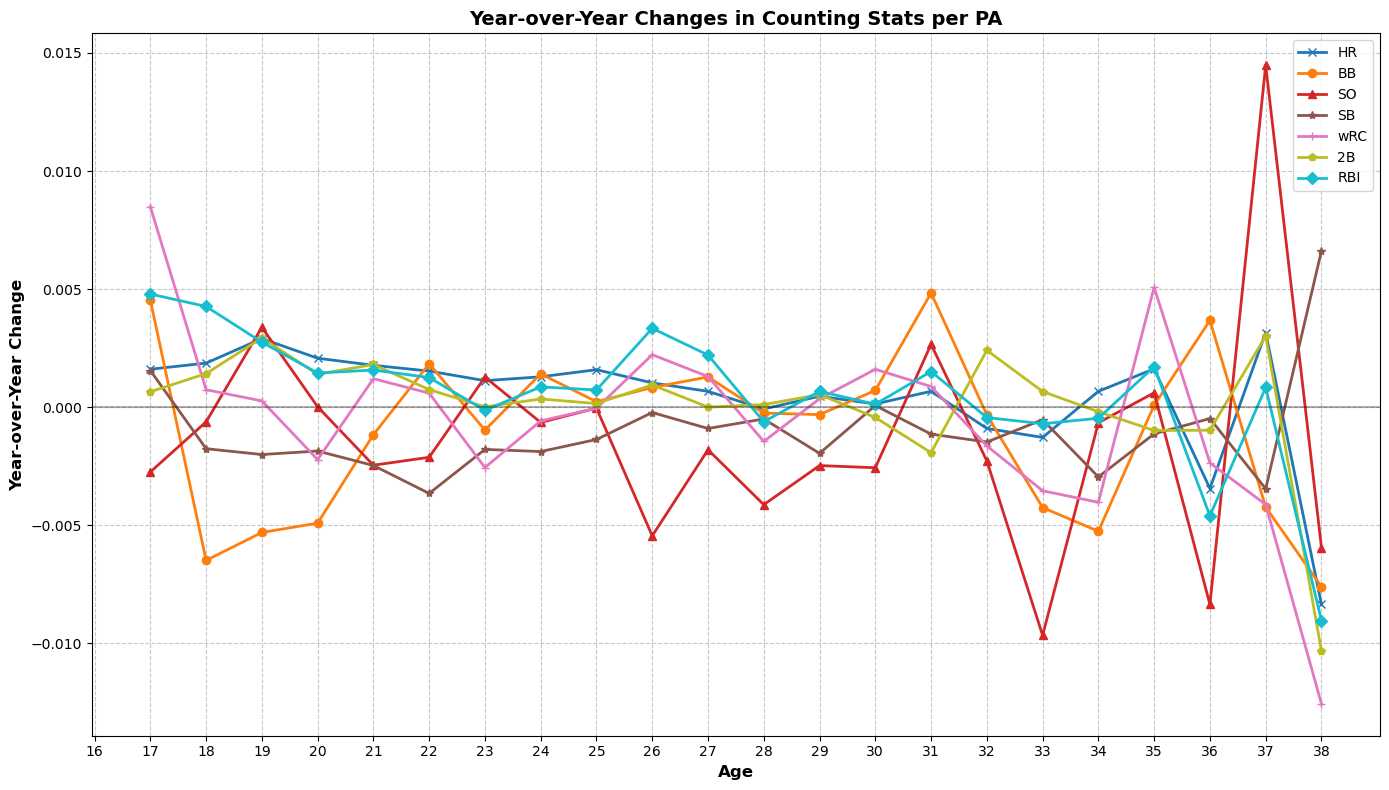

In [71]:
#visualization for counting stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

# function to plot counting stat per PA
def plot_counting_stat(df, stat, ylim=None):
    plt.figure(figsize=(12, 7))
    
    # get the stat name without the _per_PA
    base_stat = stat.replace('_per_PA', '')
    
    # plot age points
    plt.plot(df.index, df[stat], 'o-', linewidth=2, color='#1f77b4', markersize=8)
    
    # x-axis to show age
    plt.xticks(df.index)
    
    # set y limits
    stat_min = df[stat].min()
    stat_max = df[stat].max()
    # add 10% padding
    padding = (stat_max - stat_min) * 0.1
    plt.ylim(max(0, stat_min - padding), stat_max + padding)
    
    # calculate league average weighted by player count
    weighted_sum = (df[stat] * df['player_count']).sum()
    total_players = df['player_count'].sum()
    league_avg = weighted_sum / total_players
    
    # add reference line
    plt.axhline(y=league_avg, color='r', linestyle='--', alpha=0.7, 
                label=f'Weighted Avg ({league_avg:.5f})')
    
    # labels and title
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel(f'{base_stat} per PA', fontsize=12, fontweight='bold')
    plt.title(f'{base_stat} per Plate Appearance by Age', fontsize=14, fontweight='bold')
    
    # add sample size as annotation
    for age in df.index:
        plt.annotate(f"n={df.loc[age, 'player_count']}", 
                    xy=(age, df.loc[age, stat]),
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    fontsize=8,
                    alpha=0.7)
    
    # grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # league average annotation
    plt.annotate(f"League Avg: {league_avg:.5f}", 
                xy=(df.index.max(), league_avg),
                xytext=(-100, 5), 
                textcoords='offset points',
                fontsize=10,
                color='red',
                alpha=0.9)
    
    # legend
    plt.legend()
    
    # layout
    plt.tight_layout()
    
    # save figure
    plt.savefig(f'Age_vs_{base_stat}_per_PA.png', dpi=300)
    plt.show()

# plot counting stat individually
for stat in counting_stats_by_age.keys():
    plot_counting_stat(counting_stats_df, stat)

# create multi-stat plots for related categories
# group counting stats by category
hit_stats = ['1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA']
run_stats = ['R_per_PA', 'RBI_per_PA']
plate_discipline = ['BB_per_PA', 'SO_per_PA']
value_stats = ['wRC_per_PA', 'wRAA_per_PA', 'wSB_per_PA']

# function to plot grouped stats
def plot_grouped_stats(df, stat_group, title, filename):
    plt.figure(figsize=(14, 8))
    
    # create a colormap
    cmap = cm.get_cmap('tab10', len(stat_group))
    colors = [cmap(i) for i in range(len(stat_group))]
    markers = ['o', 's', '^', 'D', 'p', '*', 'h', 'x'][:len(stat_group)]
    
    for i, stat in enumerate(stat_group):
        base_stat = stat.replace('_per_PA', '')
        plt.plot(df.index, df[stat], 
                marker=markers[i], linestyle='-', linewidth=2, 
                color=colors[i], label=base_stat)
    
    # x-axis to show individual age
    plt.xticks(df.index)
    
    # add zero line for reference
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.1)
    
    # labels and title
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel('Rate per Plate Appearance', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    # grid
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # legend
    plt.legend(loc='best', fontsize=10)
    
    # tight layout
    plt.tight_layout()
    
    # save figure
    plt.savefig(filename, dpi=300)
    plt.show()

# plot each group
plot_grouped_stats(counting_stats_df, hit_stats, 'Hit Types per Plate Appearance by Age', 'Hit_Types_by_Age.png')
plot_grouped_stats(counting_stats_df, run_stats, 'Runs & RBIs per Plate Appearance by Age', 'Runs_RBIs_by_Age.png')
plot_grouped_stats(counting_stats_df, plate_discipline, 'Plate Discipline per Plate Appearance by Age', 'Plate_Discipline_by_Age.png')
plot_grouped_stats(counting_stats_df, value_stats, 'Value Metrics per Plate Appearance by Age', 'Value_Metrics_by_Age.png')

# create a heatmap
selected_stats = ['HR_per_PA', 'BB_per_PA', 'SO_per_PA', 'SB_per_PA', 'wRC_per_PA', '2B_per_PA', 'RBI_per_PA']
heatmap_df = counting_stats_df[selected_stats].copy()

# normalize the data
for stat in selected_stats:
    stat_min = heatmap_df[stat].min()
    stat_max = heatmap_df[stat].max()
    heatmap_df[stat] = (heatmap_df[stat] - stat_min) / (stat_max - stat_min)

# convert to format suitable for seaborn
heatmap_pivot = heatmap_df.reset_index()
heatmap_pivot = pd.melt(heatmap_pivot, id_vars=['Age'], value_vars=selected_stats, 
                        var_name='Metric', value_name='Value')
heatmap_pivot = heatmap_pivot.pivot(index='Metric', columns='Age', values='Value')

# heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_pivot, annot=False, cmap='YlGnBu', linewidths=.5)
plt.title('Normalized Performance by Age (Counting Stats)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Metric', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('Counting_Stats_Heatmap.png', dpi=300)
plt.show()

# year-over-year changes visualization
yoy_counting_changes = pd.DataFrame()
for stat in selected_stats:
    # calculate the absolute change from previous age
    yoy_counting_changes[stat] = counting_stats_df[stat].diff()

plt.figure(figsize=(14, 8))

# create colormap
cmap = cm.get_cmap('tab10', len(selected_stats))
colors = [cmap(i) for i in range(len(selected_stats))]
markers = ['x', 'o', '^', '*', '+', 'p', 'D'][:len(selected_stats)]

for i, stat in enumerate(selected_stats):
    base_stat = stat.replace('_per_PA', '')
    plt.plot(yoy_counting_changes.index, yoy_counting_changes[stat], 
            marker=markers[i], linestyle='-', linewidth=2, 
            color=colors[i], label=f'{base_stat}')

# add zero line for reference
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# x-axis to show individual age
plt.xticks(yoy_counting_changes.index)

# labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Year-over-Year Change', fontsize=12, fontweight='bold')
plt.title('Year-over-Year Changes in Counting Stats per PA', fontsize=14, fontweight='bold')

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# legend
plt.legend(loc='upper right', fontsize=10)

# tight layout
plt.tight_layout()

# save figure
plt.savefig('YoY_Counting_Changes_by_Age.png', dpi=300)
plt.show()

In [73]:
# batted ball statistics
batted_ball_stats = ['GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%']

# calculate weighted average
def weighted_avg(group, value_col, weight_col):
    data = group[value_col]
    weights = group[weight_col]
    
    # mask
    valid = (
        data.notnull() &
        weights.notnull() &
        (weights > 0)
    )
    
    # apply mask
    if valid.any():
        return np.average(data[valid], weights=weights[valid])
    else:
        return np.nan

# verification function
def verify_weighted_avg(group, value_col, weight_col):
    data = group[value_col]
    weights = group[weight_col]
    
    # mask
    valid = (
        data.notnull() &
        weights.notnull() &
        (weights > 0)
    )
    
    if valid.any():
        numerator = (data[valid] * weights[valid]).sum()
        denominator = weights[valid].sum()
        return numerator / denominator
    else:
        return np.nan

# dictionary to store results
batted_ball_stats_by_age = {}

# calculate weighted averages
for stat in batted_ball_stats:
    result = {}
    # group by age
    grouped = batting_stats_combined.groupby('Age')
    
    for age, group in grouped:
        result[age] = weighted_avg(group, stat, 'PA')
    
    batted_ball_stats_by_age[stat] = pd.Series(result)

# convert to DataFrame
batted_ball_stats_df = pd.DataFrame(batted_ball_stats_by_age)

# add the count of players at each age
batted_ball_stats_df['player_count'] = age_counts

# display results
print("Weighted batted ball statistics by age:")
print(batted_ball_stats_df)

# verification function
def verify_batted_ball_stats(original_df, result_df, verification_age=25):
    print(f"\nVerification summary for batted ball stats at age {verification_age}:")
    print("-" * 75)
    print(f"{'Stat':<10} {'np.average':<12} {'Manual calc':<12} {'Difference':<12} {'Status':<10}")
    print("-" * 75)
    
    # age group data
    age_group_data = original_df[original_df['Age'] == verification_age]
    
    all_correct = True
    
    for stat in batted_ball_stats:
        numpy_result = result_df.loc[verification_age, stat]
        
        # manual calculation
        manual_result = verify_weighted_avg(age_group_data, stat, 'PA')
        
        # calculate difference
        difference = abs(numpy_result - manual_result)
        
        # status
        status = "Match" if difference < 1e-10 else "Check"
        
        print(f"{stat:<10} {numpy_result:<12.6f} {manual_result:<12.6f} {difference:<12.10f} {status:<10}")
        
        # check difference
        if difference > 1e-10:
            all_correct = False
    
    print("-" * 75)
    if all_correct:
        print("All calculations match")
    else:
        print("Some calculations dont match.")

# verify a common age group
verify_batted_ball_stats(batting_stats_combined, batted_ball_stats_df, verification_age=25)

# key batted ball stats
key_batted_ball_stats = ['LD%', 'GB%', 'FB%', 'Pull%', 'HR/FB']
key_batted_ball_table = batted_ball_stats_df[key_batted_ball_stats].round(3)
print("\nKey Batted Ball Metrics by Age:")
print(key_batted_ball_table)

# year-over-year changes
yoy_batted_ball_changes = pd.DataFrame()

for stat in key_batted_ball_stats:
    # absolute change from previous age
    yoy_batted_ball_changes[f'{stat}_change'] = batted_ball_stats_df[stat].diff()
    
    # percentage change
    yoy_batted_ball_changes[f'{stat}_pct_change'] = batted_ball_stats_df[stat].pct_change() * 100

# display YoY changes
print("\nYear-over-Year Changes in Key Batted Ball Metrics:")
yoy_display = pd.DataFrame()
for stat in key_batted_ball_stats:
    yoy_display[f'{stat}_change'] = yoy_batted_ball_changes[f'{stat}_change'].round(3)
    yoy_display[f'{stat}_pct%'] = yoy_batted_ball_changes[f'{stat}_pct_change'].round(1)
print(yoy_display)

# top 3 age groups for each stat
print("\nTop 3 Age Groups for Each Key Batted Ball Metric:")
for stat in key_batted_ball_stats:
    top_3_ages = batted_ball_stats_df[stat].nlargest(3)
    print(f"\n{stat}:")
    for age, value in top_3_ages.items():
        player_count = batted_ball_stats_df.loc[age, 'player_count']
        print(f"  Age {age}: {value:.3f} (n={player_count})")

# peak performance ages
peak_ages = {stat: batted_ball_stats_df[stat].idxmax() for stat in key_batted_ball_stats}
print("\nPeak Performance Age by Batted Ball Metric:")
for stat, age in peak_ages.items():
    peak_value = batted_ball_stats_df.loc[age, stat]
    player_count = batted_ball_stats_df.loc[age, 'player_count']
    print(f"{stat}: Age {age} ({peak_value:.3f}, n={player_count})")

# age ranges with positive growth
print("\nAge Ranges with Positive Growth in Batted Ball Metrics:")
for stat in key_batted_ball_stats:
    growth_ages = yoy_batted_ball_changes[yoy_batted_ball_changes[f'{stat}_change'] > 0].index
    growth_ranges = []
    start = None
    
    for i in range(len(growth_ages)-1):
        if start is None:
            start = growth_ages[i]
        
        if growth_ages[i+1] != growth_ages[i] + 1:
            growth_ranges.append((start, growth_ages[i]))
            start = None
    
    if start is not None:
        growth_ranges.append((start, growth_ages[-1]))
    
    # display growth ranges
    print(f"{stat}: ", end="")
    if growth_ranges:
        range_strings = [f"{start}-{end}" for start, end in growth_ranges]
        print(", ".join(range_strings))
    else:
        print("No continuous growth ranges found")

# developmental velocity
print("\nDevelopmental Velocity (Annual Rate of Change) for Batted Ball Metrics:")
# key development years
dev_ages = range(16, 33)
dev_velocity = {}

for stat in key_batted_ball_stats:
    # get values for development age range
    values = []
    ages = []
    
    for age in dev_ages:
        if age in batted_ball_stats_df.index:
            if pd.notna(batted_ball_stats_df.loc[age, stat]):
                values.append(batted_ball_stats_df.loc[age, stat])
                ages.append(age)
    
    if len(values) >= 2:
        # average annual change during period
        total_change = values[-1] - values[0]
        years = ages[-1] - ages[0]
        annual_rate = total_change / years
        dev_velocity[stat] = annual_rate

for stat, rate in dev_velocity.items():
    start_age = min(ages) if ages else dev_ages[0]
    end_age = max(ages) if ages else dev_ages[-1]
    print(f"{stat}: {rate:.4f} per year from age {start_age} to {end_age}")

Weighted batted ball statistics by age:
         GB/FB       LD%       GB%       FB%     IFFB%     HR/FB     Pull%  \
16.0  1.442091  0.164399  0.463752  0.371849  0.268502  0.028221  0.471619   
17.0  1.457038  0.167172  0.465610  0.367219  0.257377  0.034937  0.464948   
18.0  1.476081  0.162783  0.471703  0.365241  0.240645  0.044906  0.455207   
19.0  1.430608  0.169054  0.464300  0.366646  0.226047  0.055339  0.450822   
20.0  1.448897  0.170961  0.467676  0.361363  0.214577  0.064254  0.448391   
21.0  1.426767  0.176931  0.462554  0.360483  0.207240  0.070480  0.444858   
22.0  1.366388  0.179029  0.454031  0.366940  0.203010  0.075418  0.443806   
23.0  1.328989  0.181977  0.448001  0.370022  0.202897  0.079747  0.444268   
24.0  1.308355  0.185163  0.443374  0.371464  0.201955  0.084802  0.444974   
25.0  1.295865  0.191263  0.438336  0.370392  0.202595  0.091437  0.445918   
26.0  1.311142  0.196212  0.437696  0.366092  0.200844  0.095910  0.445465   
27.0  1.296525  0.199538

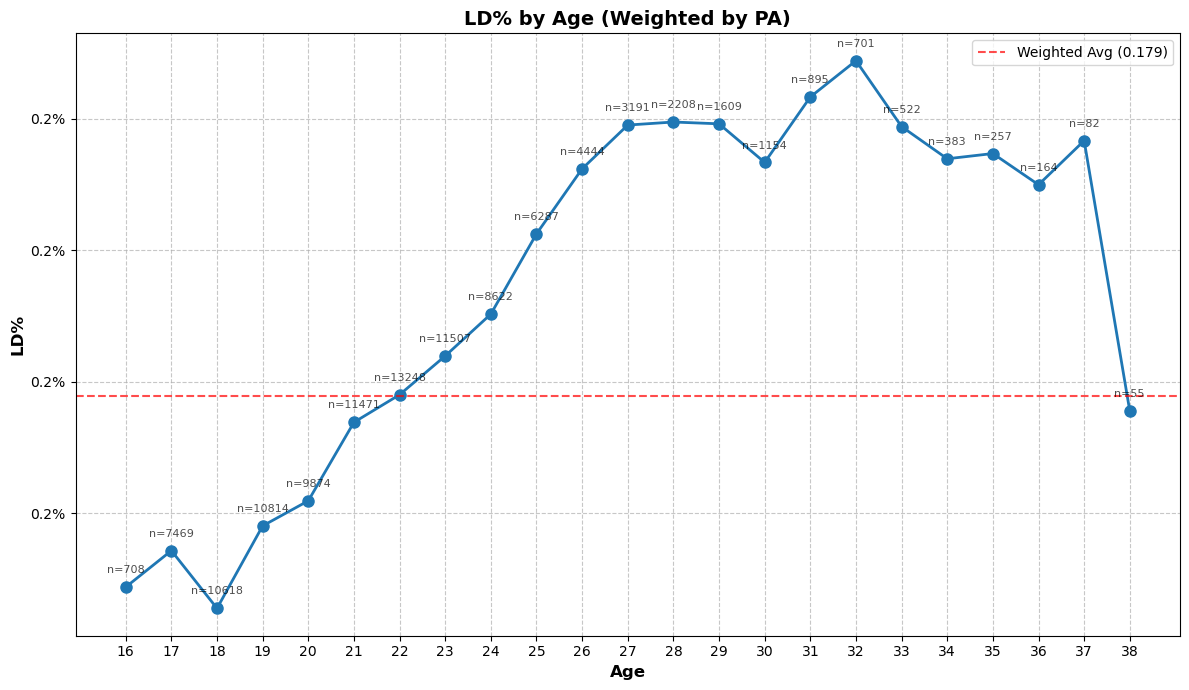

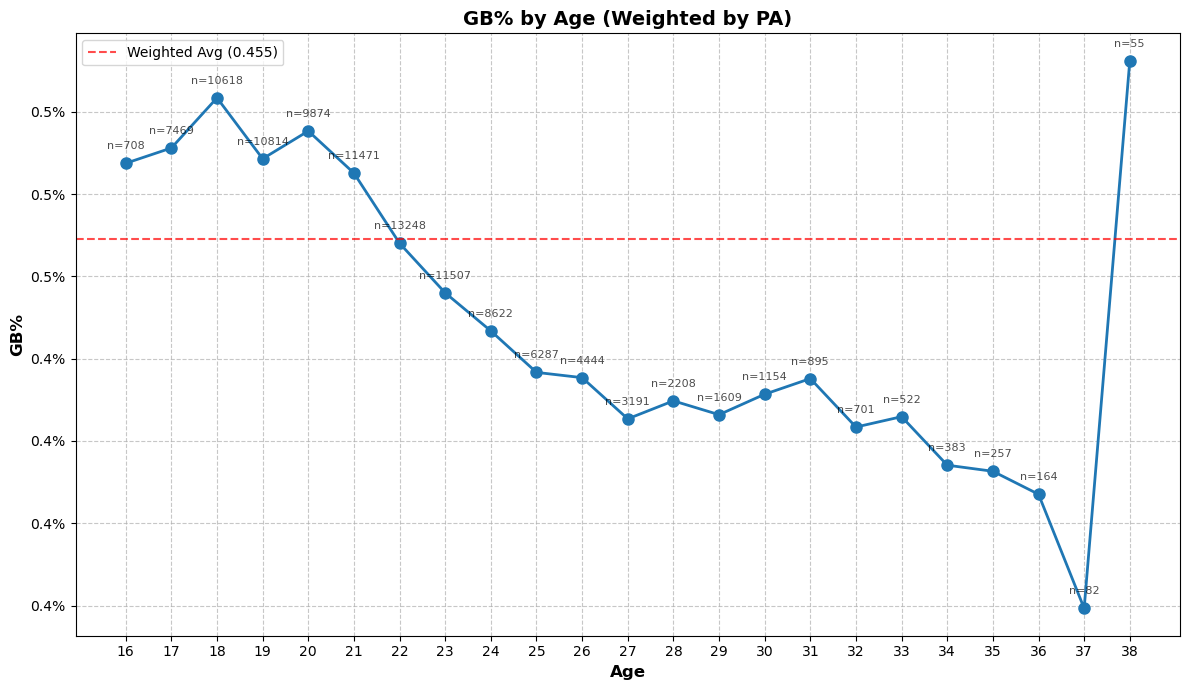

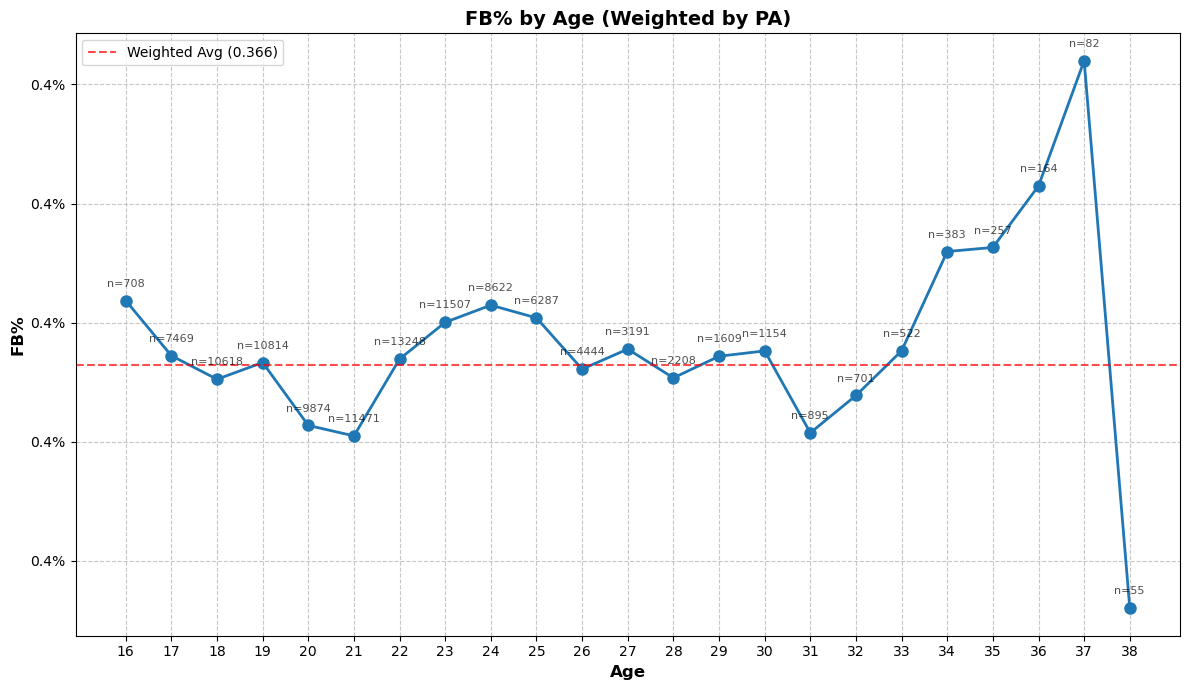

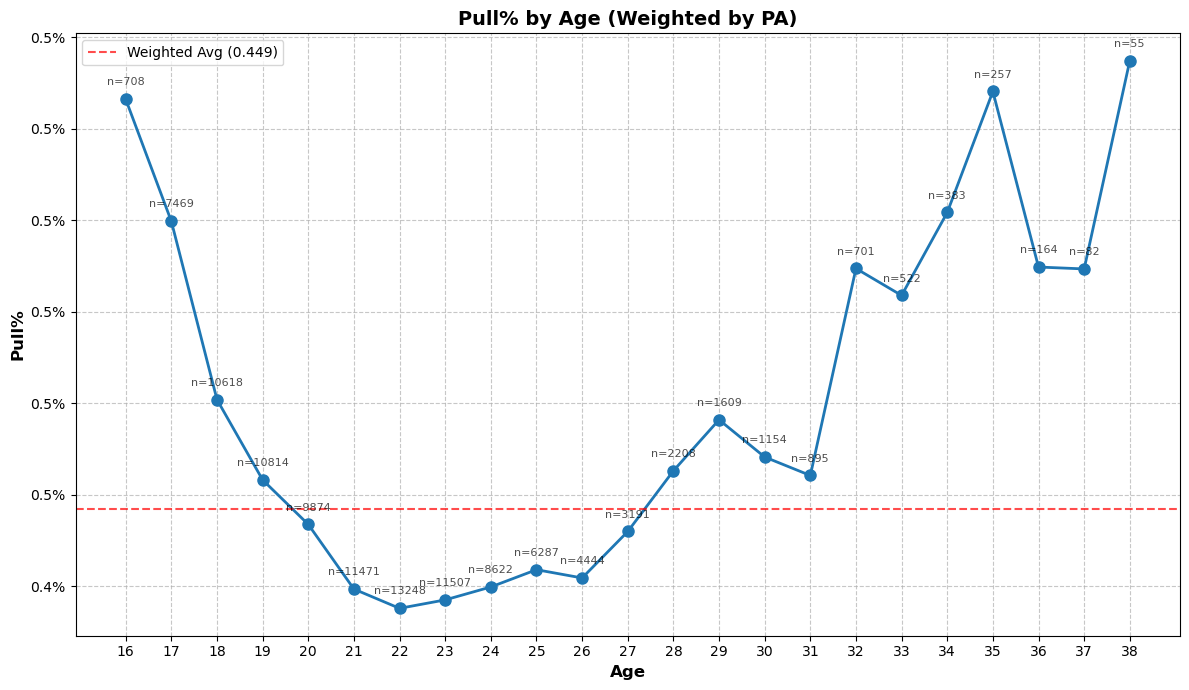

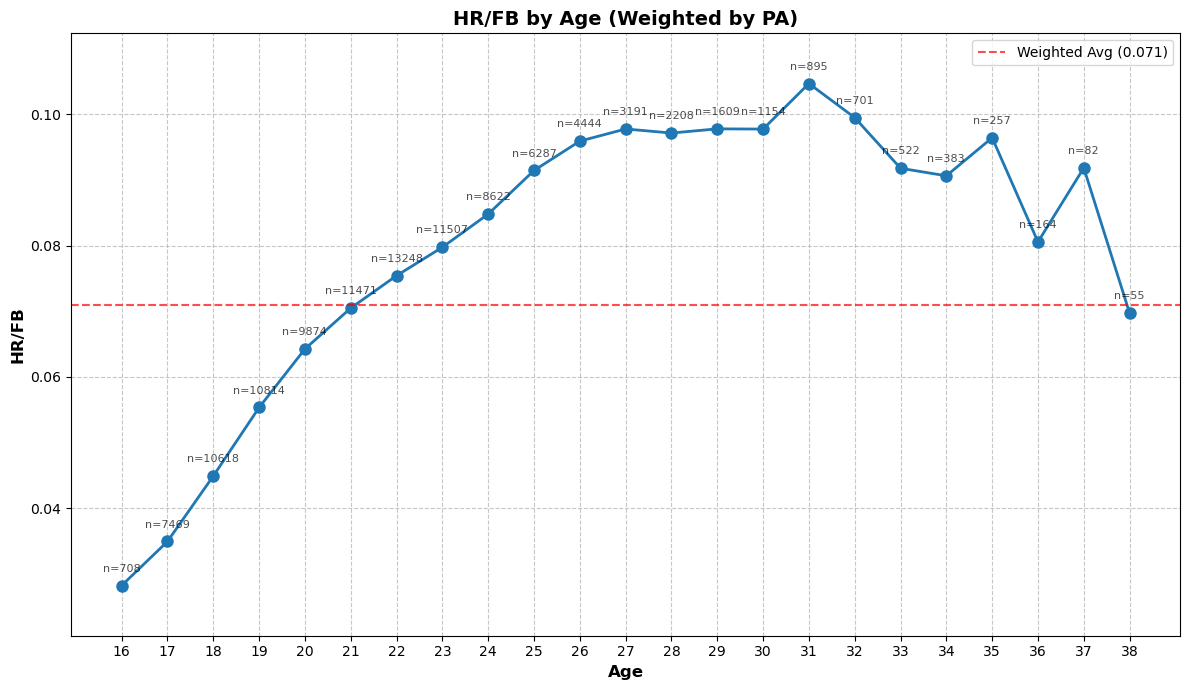

C:\Users\Frank\AppData\Local\Temp\ipykernel_22592\2580130245.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(stat_group))


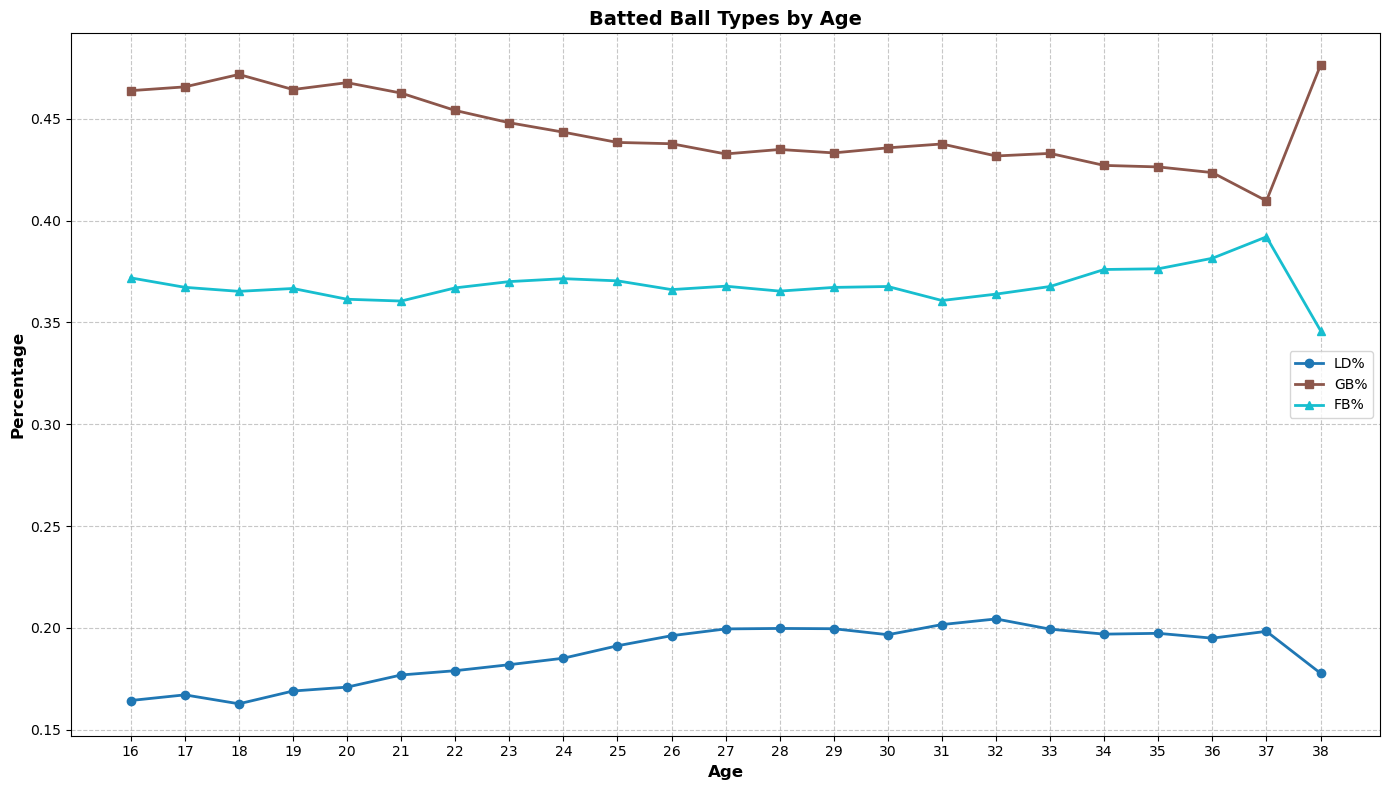

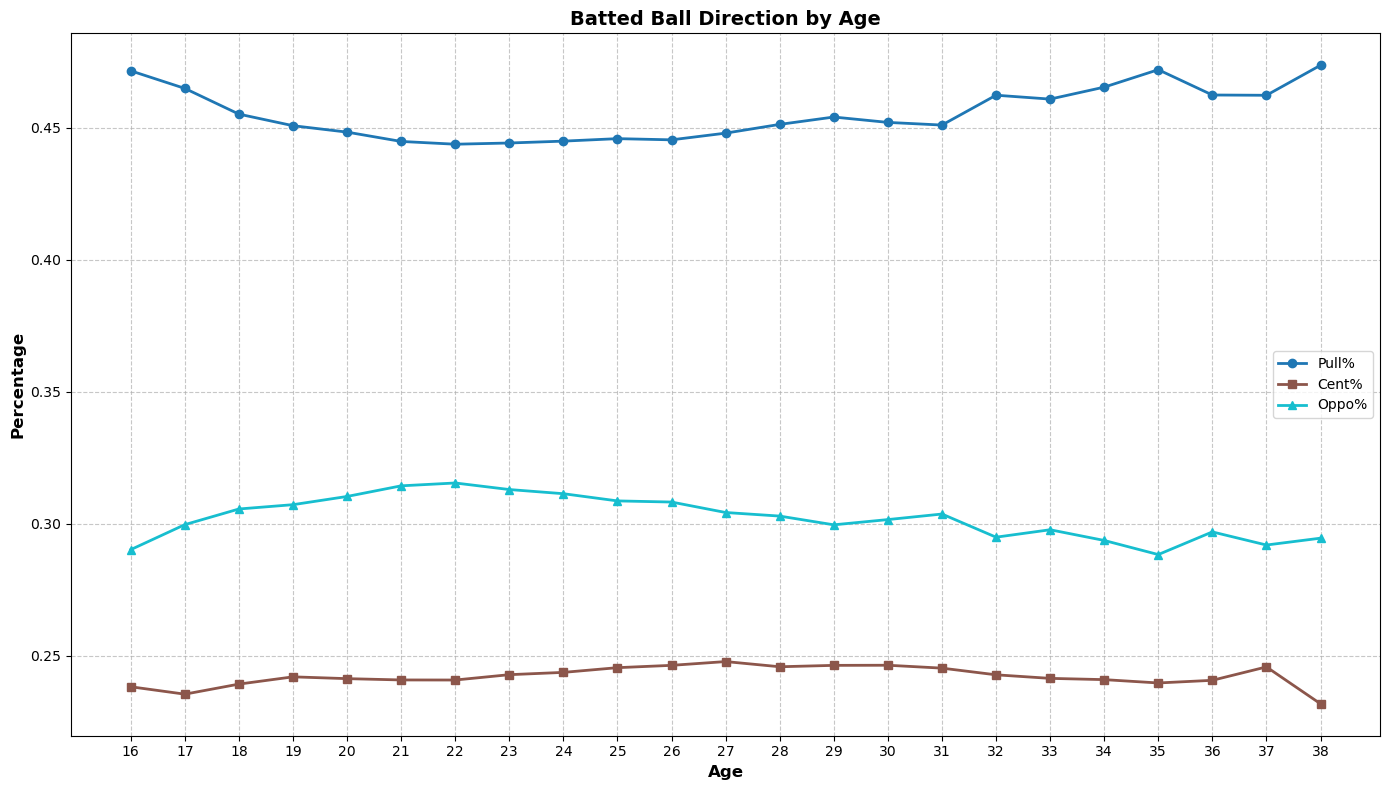

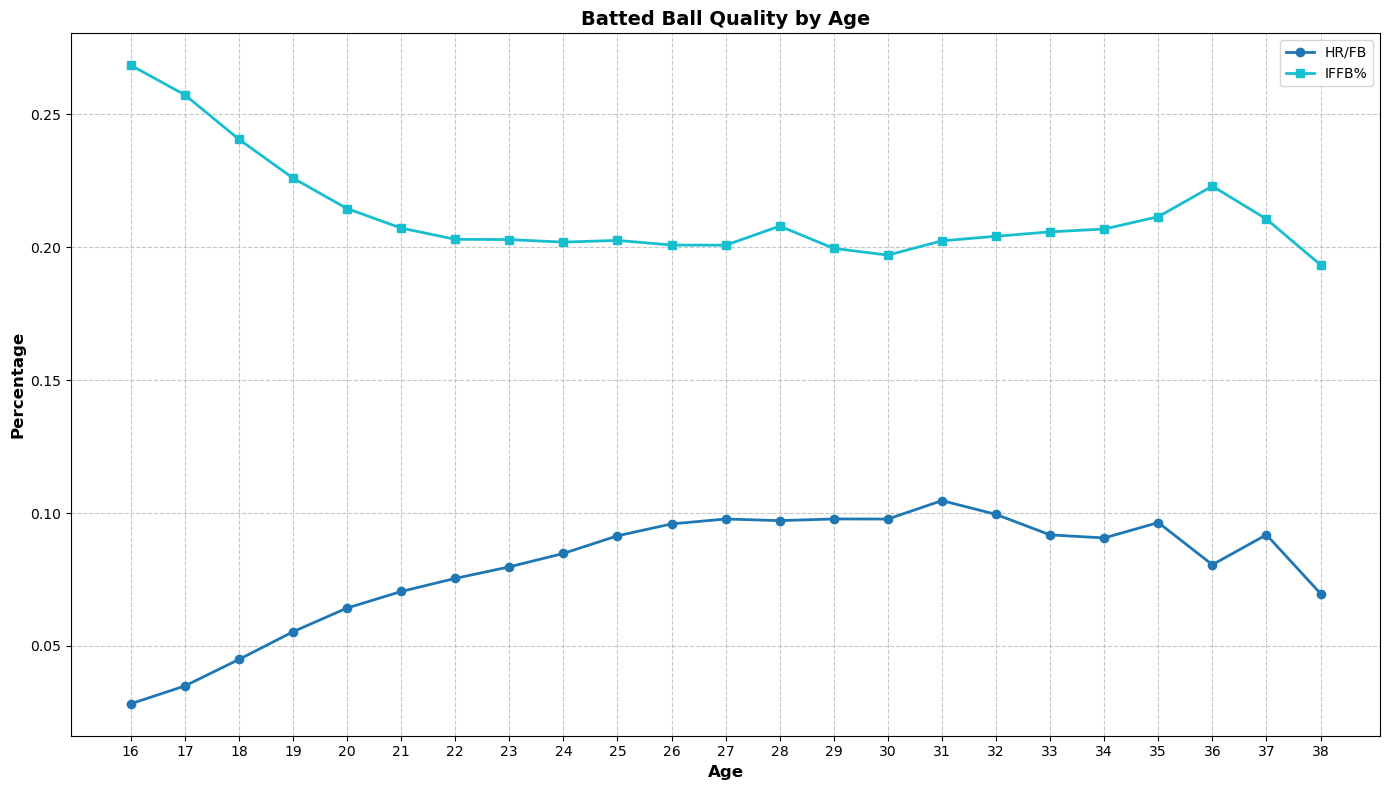

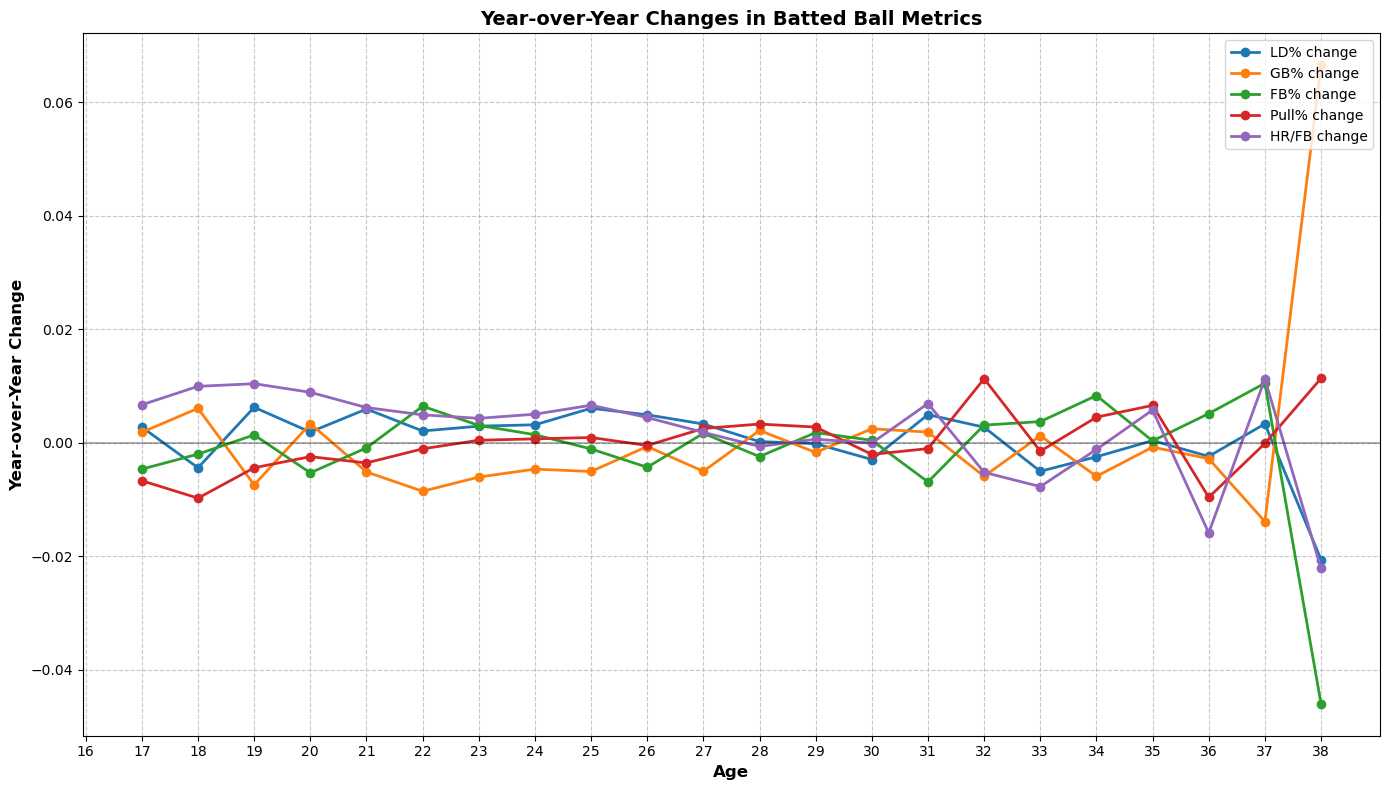

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.cm as cm

# plot batted ball stats
def plot_batted_ball_stat(df, stat, ylim=None):
    plt.figure(figsize=(12, 7))
    
    # discrete age points
    plt.plot(df.index, df[stat], 'o-', linewidth=2, color='#1f77b4', markersize=8)
    
    # x-axis to show each age
    plt.xticks(df.index)
    
    # y-axis
    if ylim:
        plt.ylim(ylim)
    elif '%' in stat:
        plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=1))
    else:
        # Adjust y limits
        stat_min = df[stat].min()
        stat_max = df[stat].max()
        # padding to the range
        padding = (stat_max - stat_min) * 0.1
        plt.ylim(max(0, stat_min - padding), stat_max + padding)
    
    # calculate league average weighted by player count
    weighted_sum = (df[stat] * df['player_count']).sum()
    total_players = df['player_count'].sum()
    league_avg = weighted_sum / total_players
    
    # reference line for weighted average
    plt.axhline(y=league_avg, color='r', linestyle='--', alpha=0.7, 
                label=f'Weighted Avg ({league_avg:.3f})')
    
    # labels and title with improved formatting
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel(stat, fontsize=12, fontweight='bold')
    plt.title(f'{stat} by Age (Weighted by PA)', fontsize=14, fontweight='bold')
    
    # sample size as text annotations
    for age in df.index:
        plt.annotate(f"n={df.loc[age, 'player_count']}", 
                    xy=(age, df.loc[age, stat]),
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    fontsize=8,
                    alpha=0.7)
    
    # grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # legend
    plt.legend()
    
    # layout
    plt.tight_layout()
    
    # save figure 
    plt.savefig(f'Age_vs_{stat.replace("%", "Pct").replace("/", "_")}.png', dpi=300)
    plt.show()

# plot each batted ball statistic
for stat in key_batted_ball_stats:
    plot_batted_ball_stat(batted_ball_stats_df, stat)

# group visualizations by category
batted_ball_types = ['LD%', 'GB%', 'FB%']
batted_ball_direction = ['Pull%', 'Cent%', 'Oppo%']
batted_ball_quality = ['HR/FB', 'IFFB%']

# plot grouped stats
def plot_grouped_batted_ball_stats(df, stat_group, title, filename):
    plt.figure(figsize=(14, 8))
    
    # colormap 
    cmap = cm.get_cmap('tab10', len(stat_group))
    colors = [cmap(i) for i in range(len(stat_group))]
    markers = ['o', 's', '^', 'D', 'p'][:len(stat_group)]
    
    for i, stat in enumerate(stat_group):
        plt.plot(df.index, df[stat], 
                marker=markers[i], linestyle='-', linewidth=2, 
                color=colors[i], label=stat)
    
    # x-axis to show each individual age
    plt.xticks(df.index)
    
    # labels and title
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    # grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # legend
    plt.legend(loc='best', fontsize=10)
    
    # tight layout
    plt.tight_layout()
    
    # save figure
    plt.savefig(filename, dpi=300)
    plt.show()

# plot grouped categories
plot_grouped_batted_ball_stats(
    batted_ball_stats_df, 
    batted_ball_types, 
    'Batted Ball Types by Age', 
    'Batted_Ball_Types_by_Age.png'
)

plot_grouped_batted_ball_stats(
    batted_ball_stats_df, 
    batted_ball_direction, 
    'Batted Ball Direction by Age', 
    'Batted_Ball_Direction_by_Age.png'
)

plot_grouped_batted_ball_stats(
    batted_ball_stats_df, 
    batted_ball_quality, 
    'Batted Ball Quality by Age', 
    'Batted_Ball_Quality_by_Age.png'
)

# year-over-year changes
plt.figure(figsize=(14, 8))

for i, stat in enumerate(key_batted_ball_stats):
    plt.plot(yoy_batted_ball_changes.index, yoy_batted_ball_changes[f'{stat}_change'], 
            marker='o', linestyle='-', linewidth=2, 
            label=f'{stat} change')

# zero line for reference
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# x-axis to show each individual age
plt.xticks(yoy_batted_ball_changes.index)

# labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Year-over-Year Change', fontsize=12, fontweight='bold')
plt.title('Year-over-Year Changes in Batted Ball Metrics', fontsize=14, fontweight='bold')

# add grid
plt.grid(True, linestyle='--', alpha=0.7)

# add legend
plt.legend(loc='upper right', fontsize=10)

# tight layout
plt.tight_layout()

# save figure
plt.savefig('YoY_Batted_Ball_Changes_by_Age.png', dpi=300)
plt.show()

In [77]:
# combine rate stats and counting stats
combined_stats_df = pd.merge(
    weighted_stats_df,
    counting_stats_df,
    left_index=True,
    right_index=True,
    suffixes=('', '_from_counting')
)

# drop duplicate column
if 'player_count_from_counting' in combined_stats_df.columns:
    combined_stats_df = combined_stats_df.drop(columns=['player_count_from_counting'])

# save combined results
combined_stats_df.to_csv('MiLB_Stats_By_Age.csv')
print("Statistics by age saved to 'MiLB_Stats_By_Age.csv'")

Statistics by age saved to 'MiLB_Stats_By_Age.csv'


In [79]:
# combine all stats
all_stats_df = pd.merge(
    combined_stats_df,
    batted_ball_stats_df,
    left_index=True,
    right_index=True,
    suffixes=('', '_batted_ball')
)

# drop duplicate column
if 'player_count_batted_ball' in all_stats_df.columns:
    all_stats_df = all_stats_df.drop(columns=['player_count_batted_ball'])

# save combined results
all_stats_df.to_csv('MiLB_All_Stats_By_Age.csv')
print("All statistics by age saved to 'MiLB_All_Stats_By_Age.csv'")

All statistics by age saved to 'MiLB_All_Stats_By_Age.csv'


In [81]:
# confirm copy worked
print(all_stats_df.columns)

Index(['AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA', 'wRC+', 'BB%', 'K%',
       'BB/K', 'player_count', '1B_per_PA', '2B_per_PA', '3B_per_PA',
       'HR_per_PA', 'R_per_PA', 'RBI_per_PA', 'BB_per_PA', 'SO_per_PA',
       'SB_per_PA', 'wRC_per_PA', 'wRAA_per_PA', 'wSB_per_PA', 'GB/FB', 'LD%',
       'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%'],
      dtype='object')


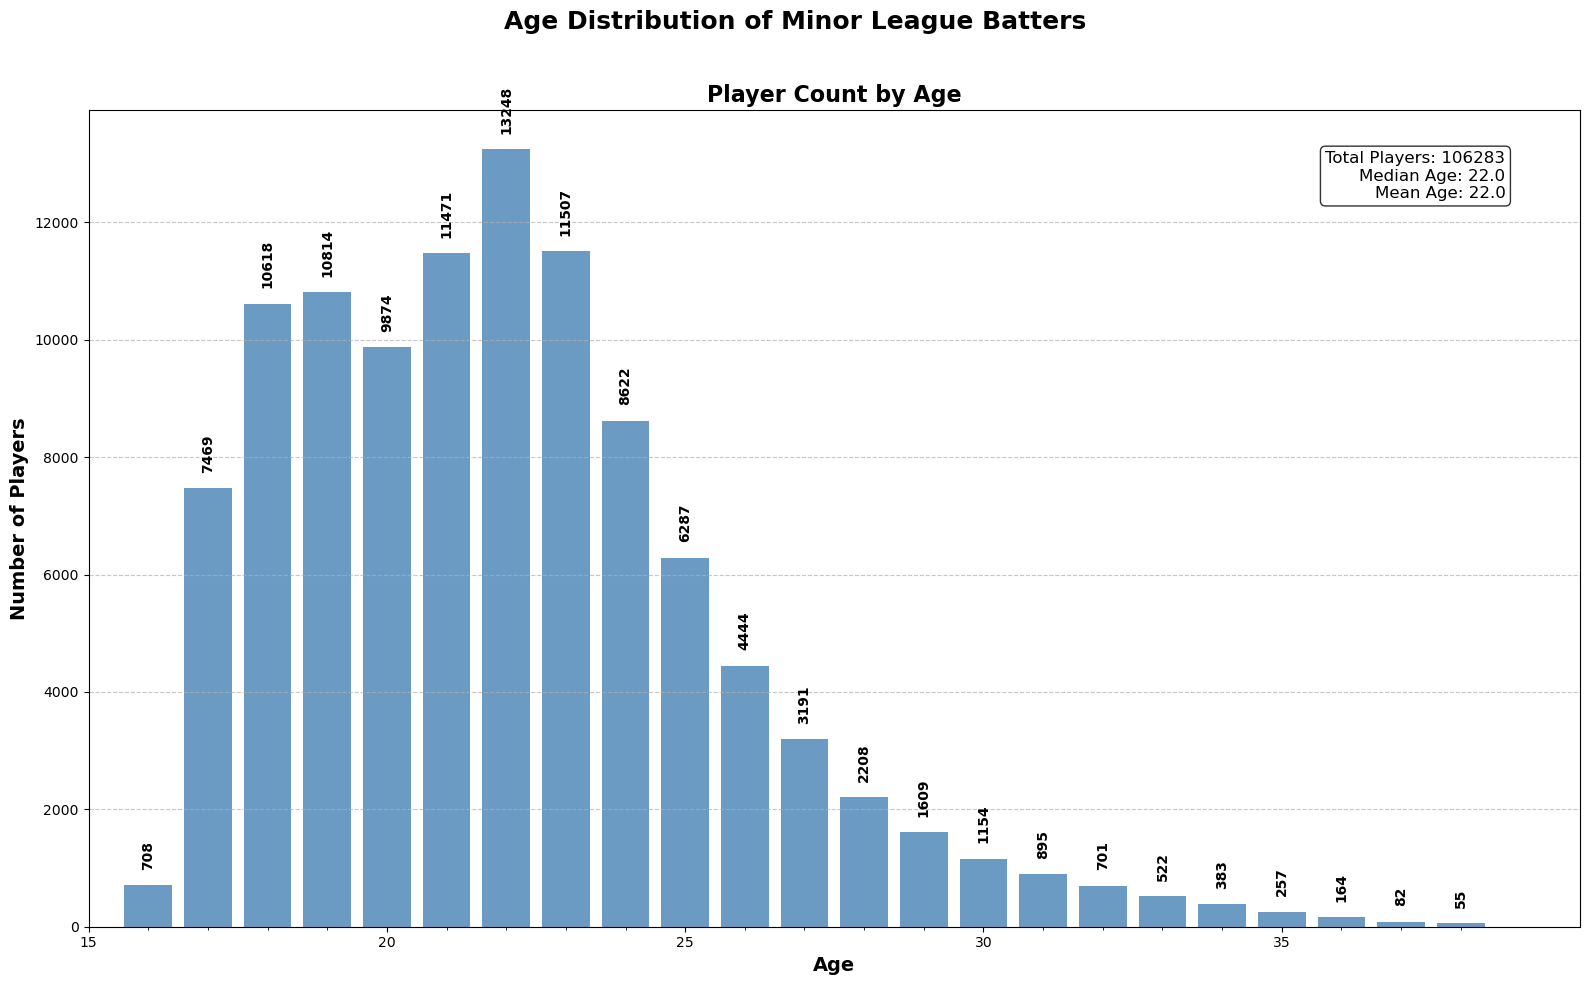

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a clean, standalone bar chart for player count by age
plt.figure(figsize=(16, 10))

# Bar chart of player count by age
ax = plt.gca()
bars = ax.bar(all_stats_df.index, all_stats_df['player_count'], color='steelblue', alpha=0.8)

# Add value labels on top of bars
for age, count in zip(all_stats_df.index, all_stats_df['player_count']):
    ax.text(age, count + (all_stats_df['player_count'].max() * 0.02), 
            f"{count}", ha='center', va='bottom', 
            fontsize=10, fontweight='bold', rotation=90)

# Add annotations for key statistics
total_players = all_stats_df['player_count'].sum()
median_age = np.median(np.repeat(all_stats_df.index, all_stats_df['player_count']))
mean_age = np.average(all_stats_df.index, weights=all_stats_df['player_count'])

stats_text = (f"Total Players: {total_players}\n"
              f"Median Age: {median_age:.1f}\n"
              f"Mean Age: {mean_age:.1f}")

ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
        fontsize=12, va='top', ha='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Customize the plot
ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Players', fontsize=14, fontweight='bold')
ax.set_title('Player Count by Age', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis range to start at 15 to match the example image
ax.set_xlim(15, 40)
ax.set_xticks(range(15, 40, 5))
ax.set_xticks(all_stats_df.index, minor=True)

# Add a title for the overall figure
plt.suptitle('Age Distribution of Minor League Batters', fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Age_Distribution_Bar_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

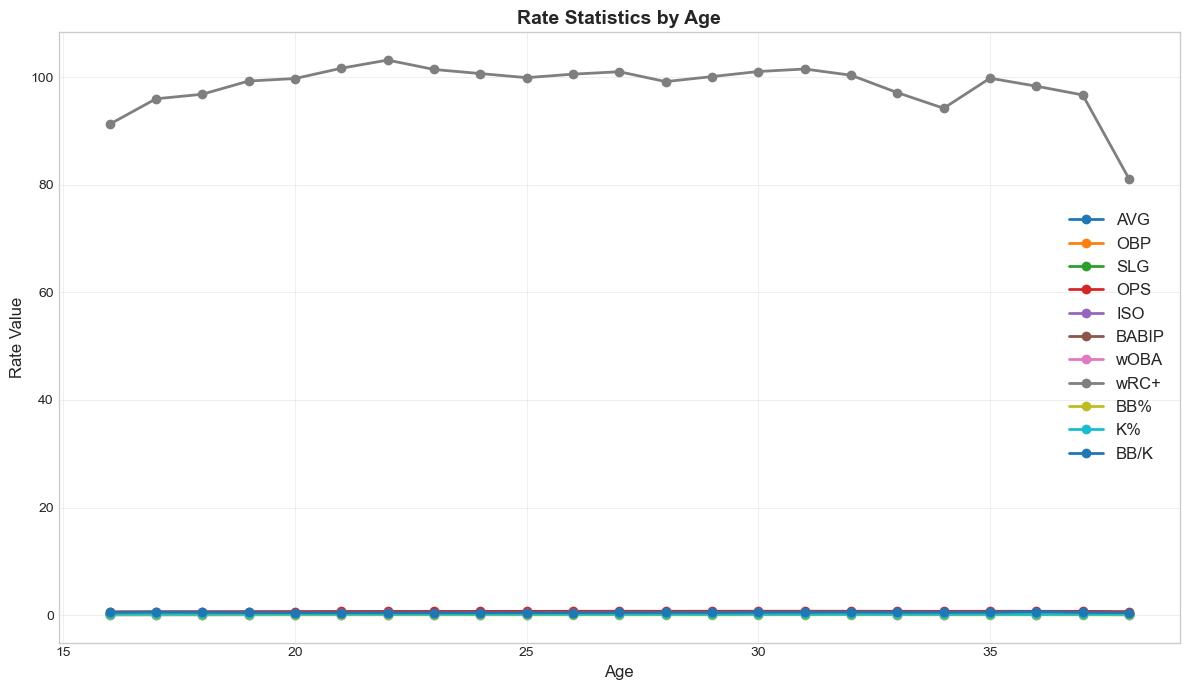

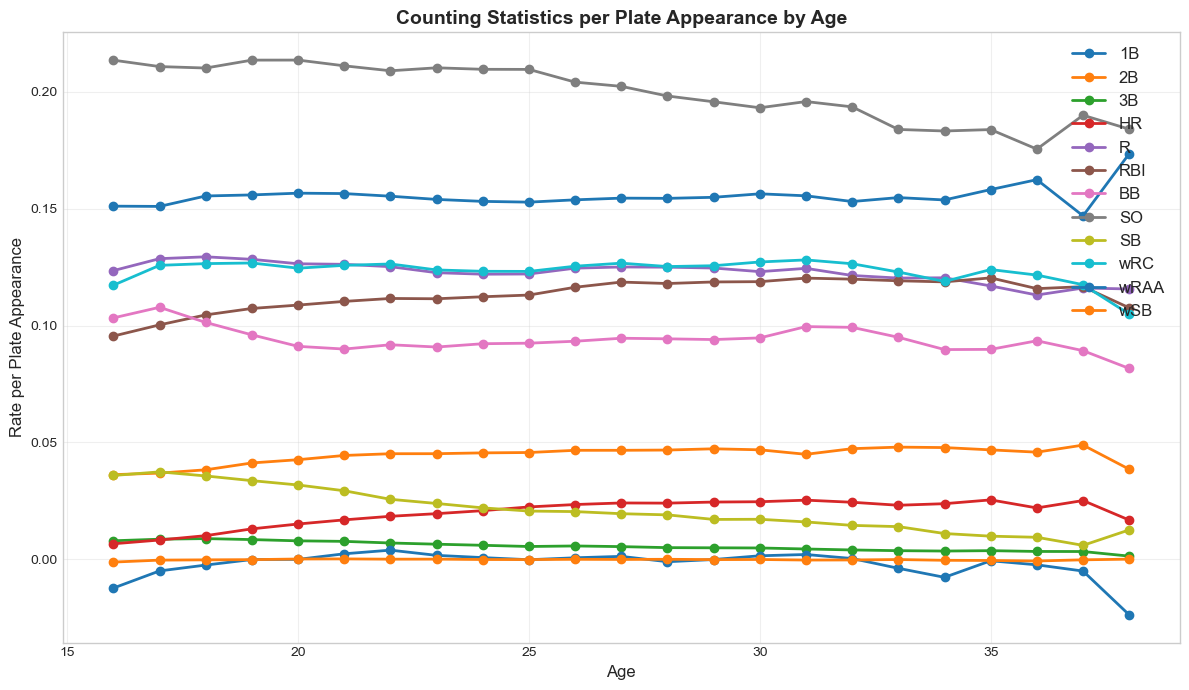

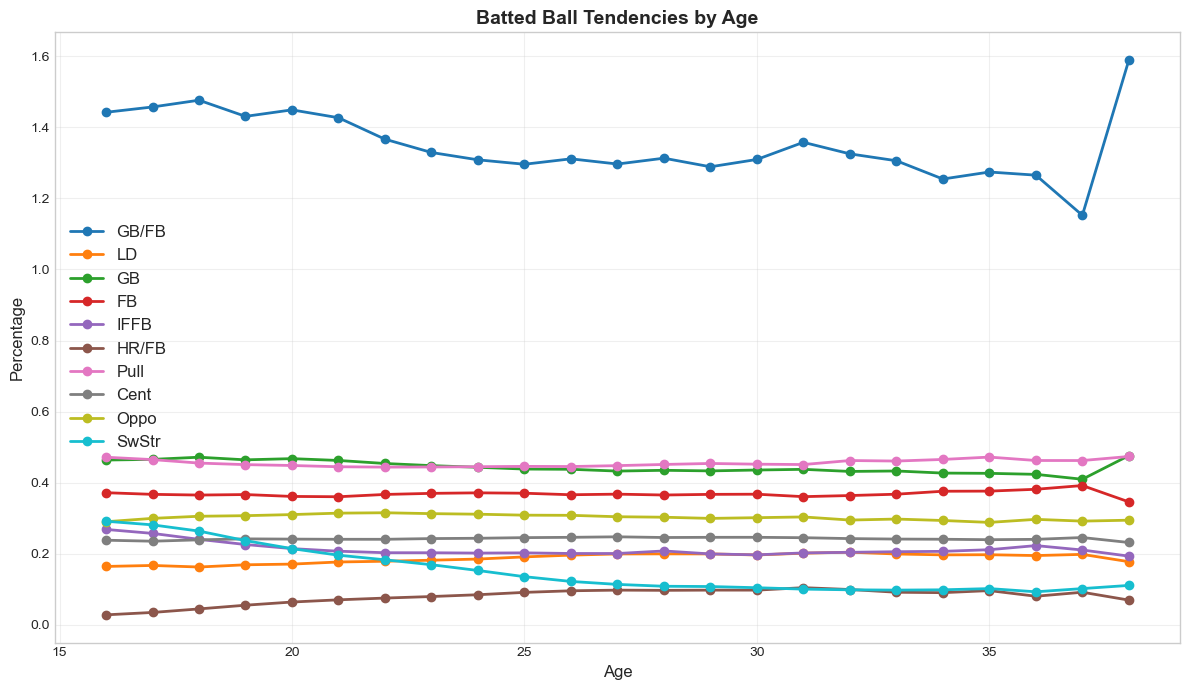

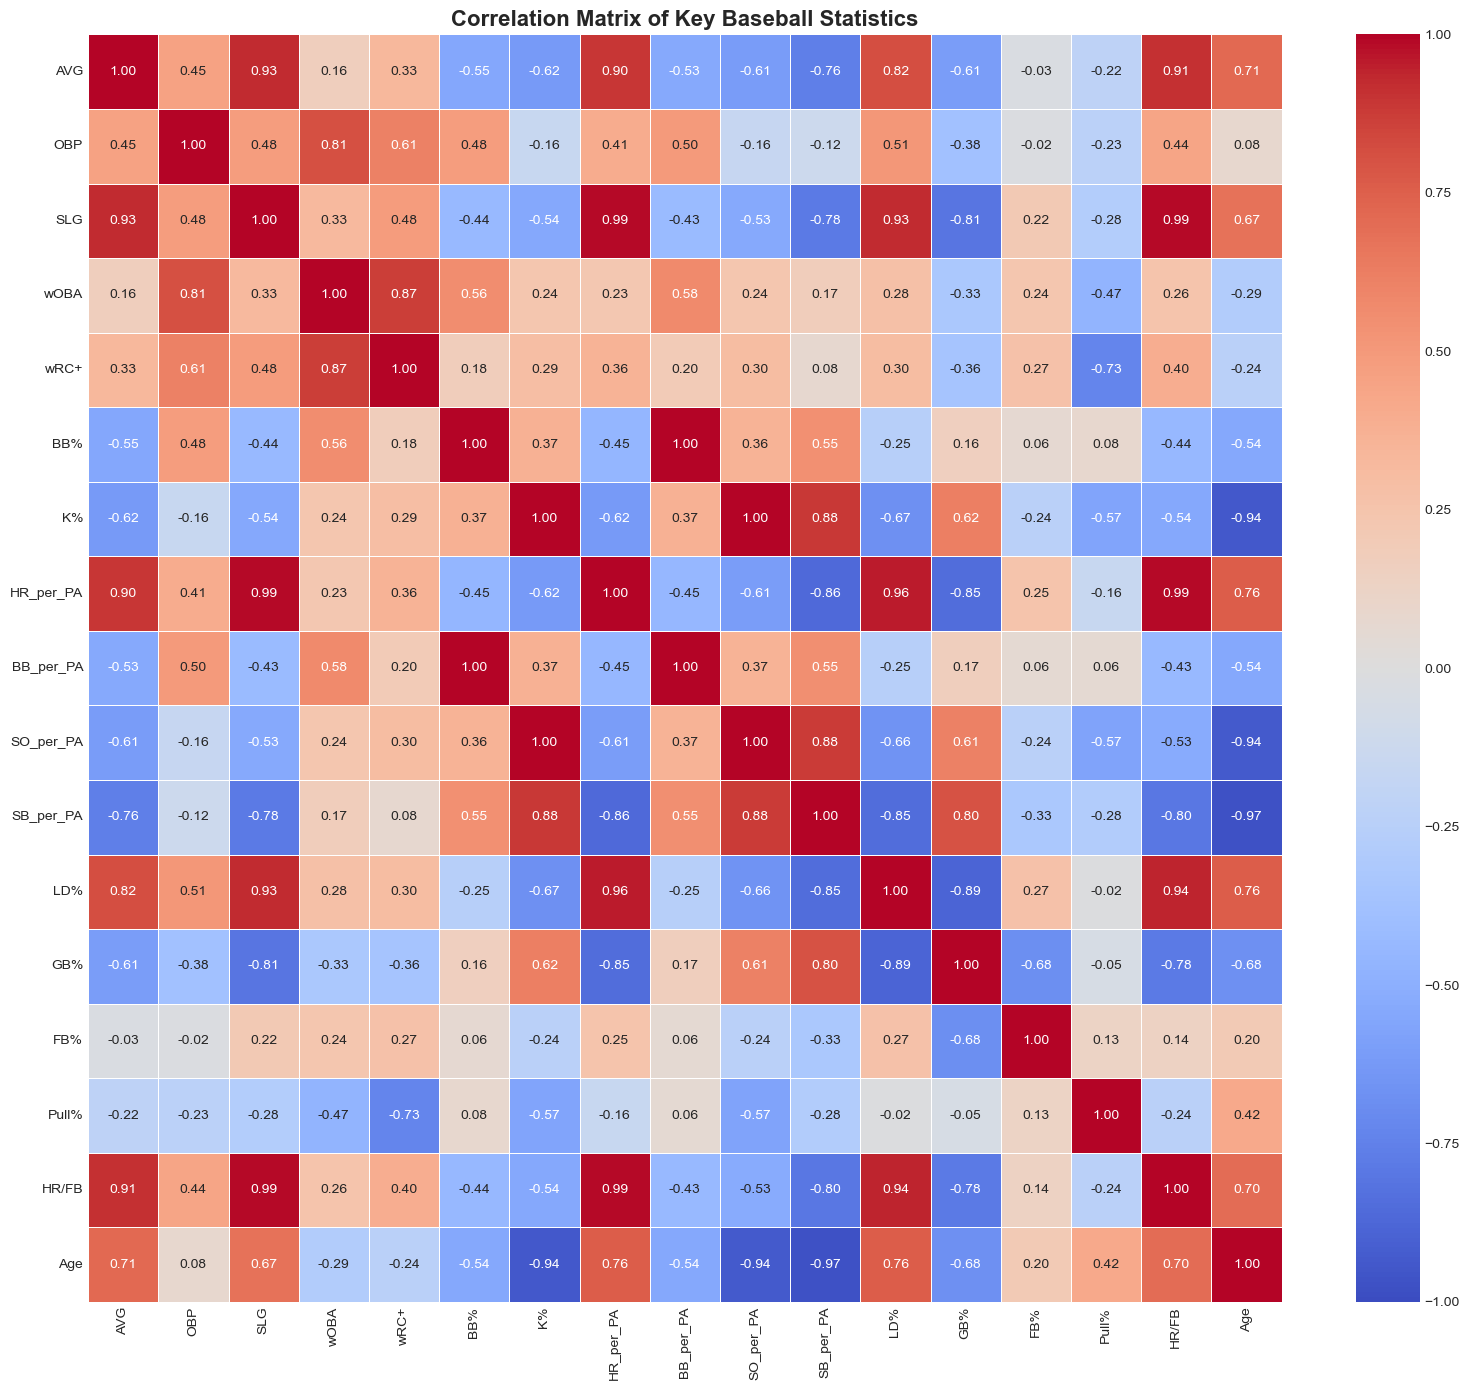

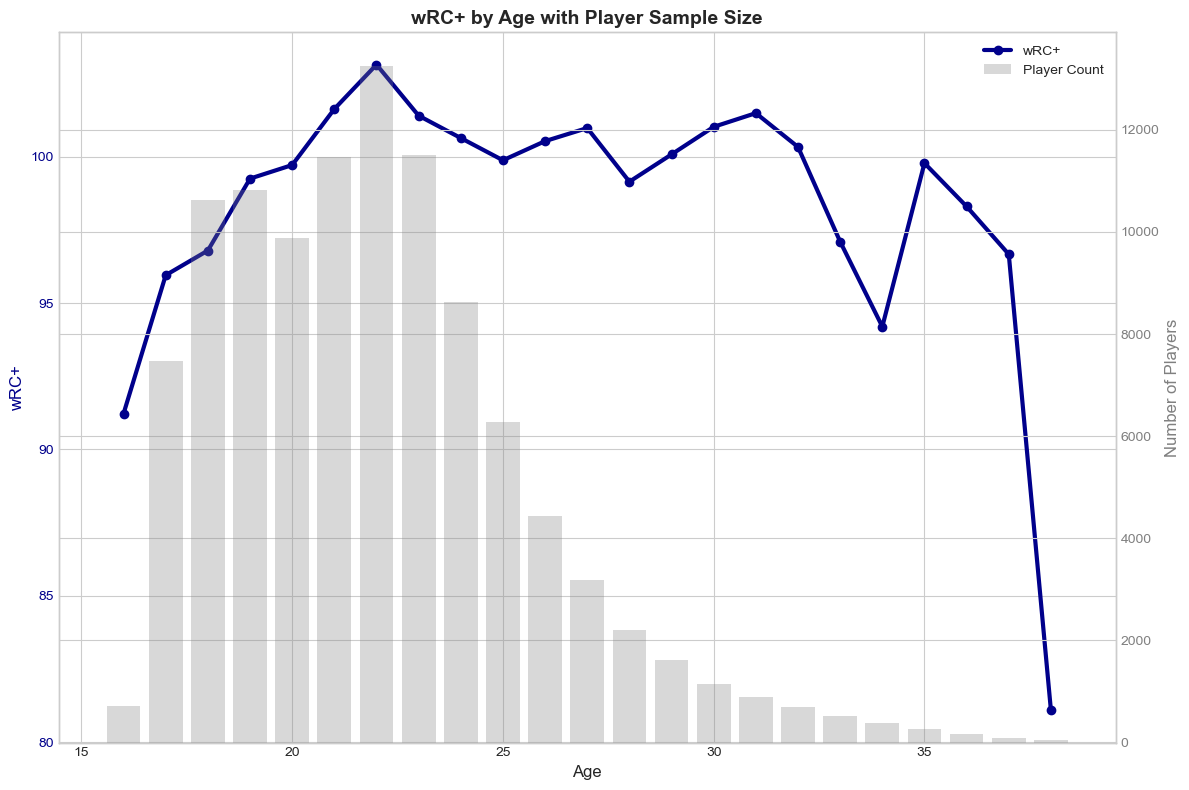

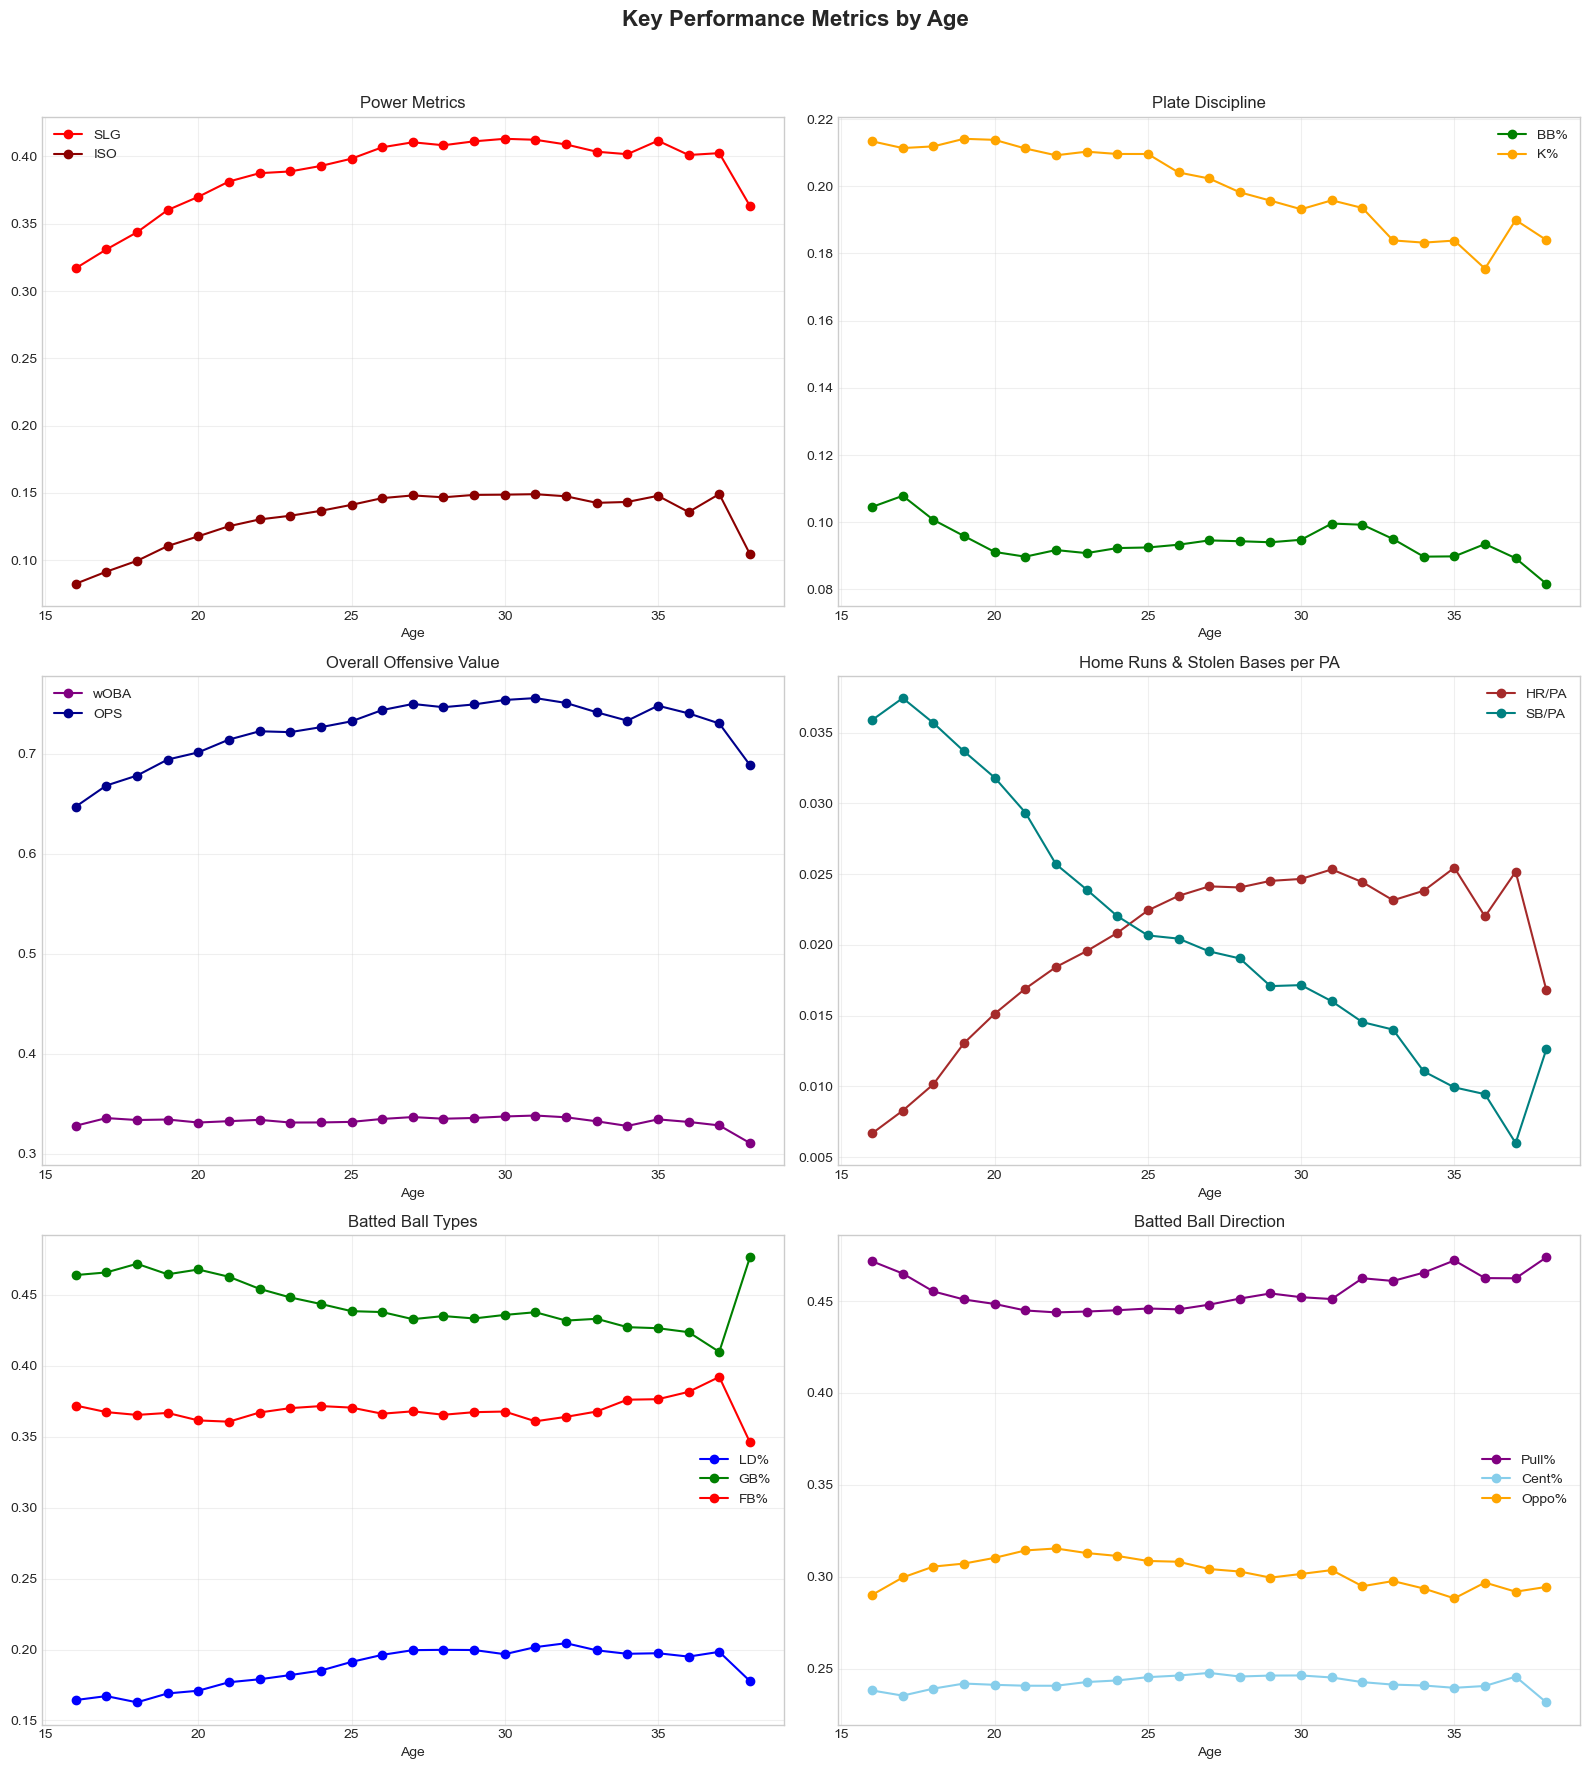

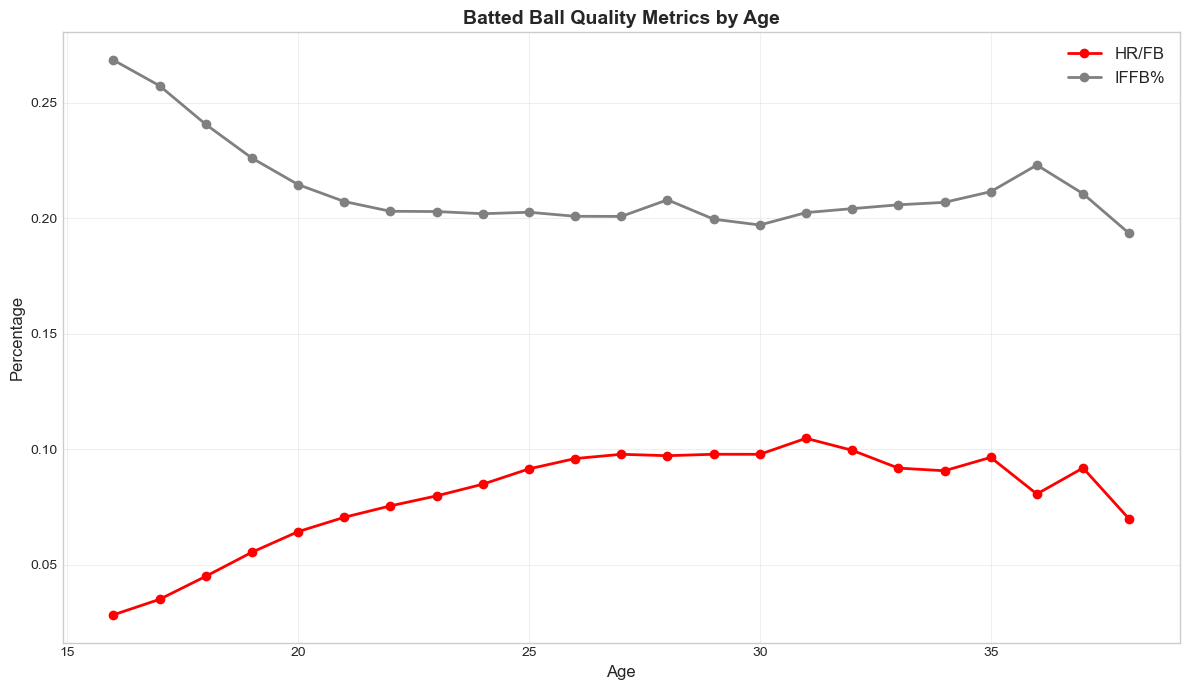

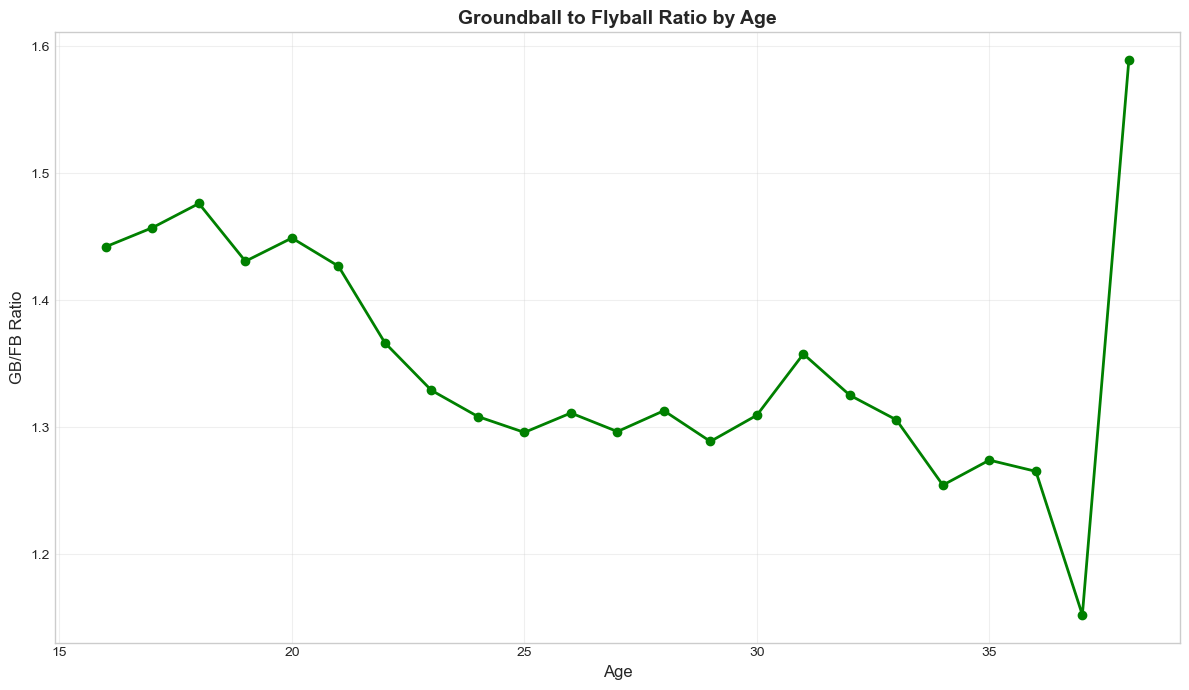

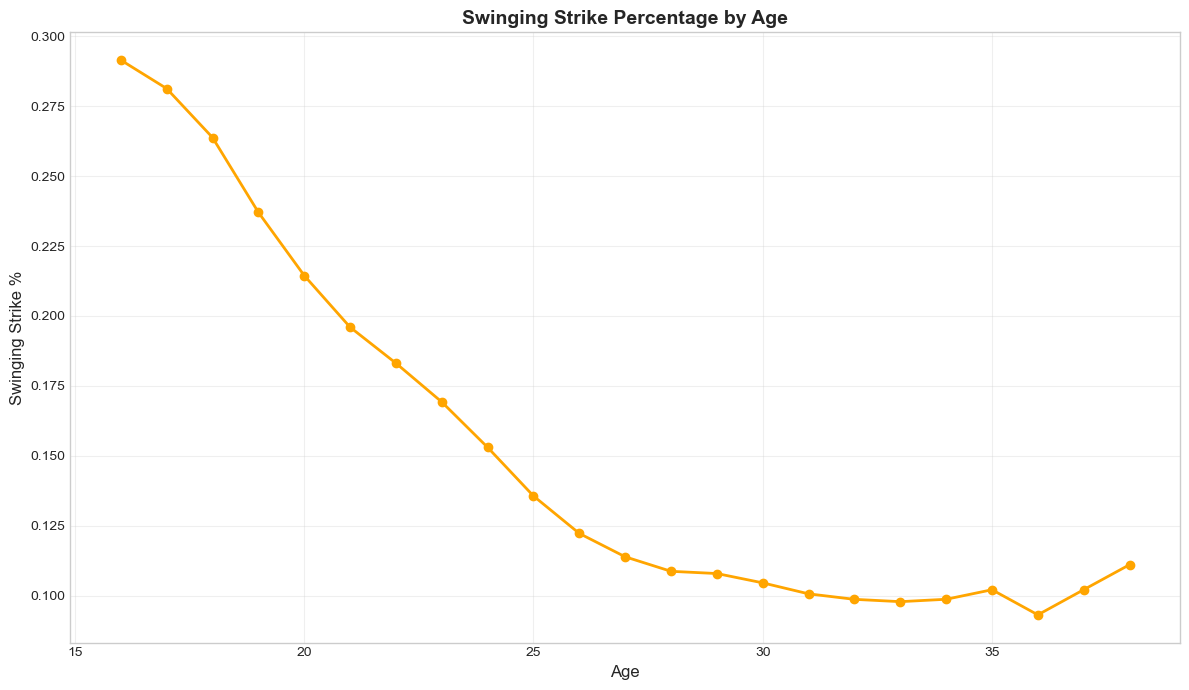

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style
plt.style.use('seaborn-v0_8-whitegrid')

# create multi-line plot rate stats
selected_rate_stats = ['AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA', 'wRC+', 'BB%', 'K%', 'BB/K']
plt.figure(figsize=(12, 7))

for stat in selected_rate_stats:
    plt.plot(all_stats_df.index, all_stats_df[stat], marker='o', linewidth=2, label=stat)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Rate Value', fontsize=12)
plt.title('Rate Statistics by Age', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Rate_Stats_by_Age.png')
plt.show()

# create multi-line plot counting stats (per PA)
selected_counting_stats = ['1B_per_PA', '2B_per_PA', '3B_per_PA',
       'HR_per_PA', 'R_per_PA', 'RBI_per_PA', 'BB_per_PA', 'SO_per_PA',
       'SB_per_PA', 'wRC_per_PA', 'wRAA_per_PA', 'wSB_per_PA']
plt.figure(figsize=(12, 7))

for stat in selected_counting_stats:
    plt.plot(all_stats_df.index, all_stats_df[stat], marker='o', linewidth=2, label=stat.split('_')[0])

plt.xlabel('Age', fontsize=12)
plt.ylabel('Rate per Plate Appearance', fontsize=12)
plt.title('Counting Statistics per Plate Appearance by Age', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Counting_Stats_per_PA_by_Age.png')
plt.show()

# 3. Create a multi-line plot for selected batted ball stats
selected_batted_ball_stats = ['GB/FB', 'LD%',
       'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%']
plt.figure(figsize=(12, 7))

for stat in selected_batted_ball_stats:
    plt.plot(all_stats_df.index, all_stats_df[stat], marker='o', linewidth=2, label=stat.replace('%', ''))

plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Batted Ball Tendencies by Age', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Batted_Ball_Stats_by_Age.png')
plt.show()

# 4. Create a heatmap to visualize correlations between stats and age
# Select a subset of interesting stats including batted ball metrics
interesting_stats = ['AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BB%', 'K%', 
                    'HR_per_PA', 'BB_per_PA', 'SO_per_PA', 'SB_per_PA',
                    'LD%', 'GB%', 'FB%', 'Pull%', 'HR/FB']

# Create a new dataframe with age as a column instead of an index
heatmap_df = all_stats_df[interesting_stats].copy()
heatmap_df['Age'] = heatmap_df.index

# Calculate correlation matrix
corr_matrix = heatmap_df.corr()

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Key Baseball Statistics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Stat_Correlation_Heatmap.png')
plt.show()

# 5. Create a visualization showing stat trends with player count
plt.figure(figsize=(12, 8))

# Plot wRC+ as the primary metric (left y-axis)
ax1 = plt.gca()
ax1.plot(all_stats_df.index, all_stats_df['wRC+'], 'o-', linewidth=3, 
         color='darkblue', label='wRC+')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('wRC+', fontsize=12, color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Create a second y-axis for player count
ax2 = ax1.twinx()
ax2.bar(all_stats_df.index, all_stats_df['player_count'], alpha=0.3, 
        color='gray', label='Player Count')
ax2.set_ylabel('Number of Players', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Add title and legend
plt.title('wRC+ by Age with Player Sample Size', fontsize=14, fontweight='bold')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('wRC+_with_Sample_Size.png')
plt.show()

# 6. Create a dashboard-style visualization with multiple stats including batted ball metrics
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Key Performance Metrics by Age', fontsize=16, fontweight='bold')

# Power metrics
axes[0, 0].plot(all_stats_df.index, all_stats_df['SLG'], 'o-', color='red', label='SLG')
axes[0, 0].plot(all_stats_df.index, all_stats_df['ISO'], 'o-', color='darkred', label='ISO')
axes[0, 0].set_title('Power Metrics')
axes[0, 0].set_xlabel('Age')
axes[0, 0].legend()

# Plate discipline
axes[0, 1].plot(all_stats_df.index, all_stats_df['BB%'], 'o-', color='green', label='BB%')
axes[0, 1].plot(all_stats_df.index, all_stats_df['K%'], 'o-', color='orange', label='K%')
axes[0, 1].set_title('Plate Discipline')
axes[0, 1].set_xlabel('Age')
axes[0, 1].legend()

# Overall value metrics
axes[1, 0].plot(all_stats_df.index, all_stats_df['wOBA'], 'o-', color='purple', label='wOBA')
axes[1, 0].plot(all_stats_df.index, all_stats_df['OPS'], 'o-', color='darkblue', label='OPS')
axes[1, 0].set_title('Overall Offensive Value')
axes[1, 0].set_xlabel('Age')
axes[1, 0].legend()

# Counting stats
axes[1, 1].plot(all_stats_df.index, all_stats_df['HR_per_PA'], 'o-', color='brown', label='HR/PA')
axes[1, 1].plot(all_stats_df.index, all_stats_df['SB_per_PA'], 'o-', color='teal', label='SB/PA')
axes[1, 1].set_title('Home Runs & Stolen Bases per PA')
axes[1, 1].set_xlabel('Age')
axes[1, 1].legend()

# Batted ball types
axes[2, 0].plot(all_stats_df.index, all_stats_df['LD%'], 'o-', color='blue', label='LD%')
axes[2, 0].plot(all_stats_df.index, all_stats_df['GB%'], 'o-', color='green', label='GB%')
axes[2, 0].plot(all_stats_df.index, all_stats_df['FB%'], 'o-', color='red', label='FB%')
axes[2, 0].set_title('Batted Ball Types')
axes[2, 0].set_xlabel('Age')
axes[2, 0].legend()

# Batted ball direction
axes[2, 1].plot(all_stats_df.index, all_stats_df['Pull%'], 'o-', color='purple', label='Pull%')
axes[2, 1].plot(all_stats_df.index, all_stats_df['Cent%'], 'o-', color='skyblue', label='Cent%')
axes[2, 1].plot(all_stats_df.index, all_stats_df['Oppo%'], 'o-', color='orange', label='Oppo%')
axes[2, 1].set_title('Batted Ball Direction')
axes[2, 1].set_xlabel('Age')
axes[2, 1].legend()

for ax in axes.flat:
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.savefig('Stats_Dashboard_by_Age.png')
plt.show()

# 7. Create specific batted ball quality visualizations
plt.figure(figsize=(12, 7))

plt.plot(all_stats_df.index, all_stats_df['HR/FB'], 'o-', color='red', linewidth=2, label='HR/FB')
plt.plot(all_stats_df.index, all_stats_df['IFFB%'], 'o-', color='gray', linewidth=2, label='IFFB%')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Batted Ball Quality Metrics by Age', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Batted_Ball_Quality_by_Age.png')
plt.show()

# 8. Create GB/FB ratio visualization
plt.figure(figsize=(12, 7))

plt.plot(all_stats_df.index, all_stats_df['GB/FB'], 'o-', color='green', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('GB/FB Ratio', fontsize=12)
plt.title('Groundball to Flyball Ratio by Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('GB_FB_Ratio_by_Age.png')
plt.show()

# 9. Create swing mechanics visualization
plt.figure(figsize=(12, 7))

plt.plot(all_stats_df.index, all_stats_df['SwStr%'], 'o-', color='orange', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Swinging Strike %', fontsize=12)
plt.title('Swinging Strike Percentage by Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Swing_Mechanics_by_Age.png')
plt.show()